## Applied Project - Extra Code for Descriptive statistics regarding the target variable and the explanatory variables.


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import pandas as pd
import pandas as pd
import numpy as np
import networkx as nx
import community as community_louvain
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
all_emotions = ['irritation','nostalgia','pride','relief','sadness','satisfaction','surprise',
              'sympathy','triumph','arousal','valence','contempt','contentment','embarrassment',
              'empathic_pain','envy','gratitude','disgust','disappointment','despair','admiration',
              'amusement','aesthetic_appreciation','anger','anxiety','awe','calmness',
              'confusion','excitement','fear','guilt','interest',
              'joy','pleasure','romance','craving','entrancement','hope','boredom','adoration','jealousy'
              ,'horror','sexual_desire']


In [3]:
data = pd.read_csv("Y:\\Data Science Readings\\Applied Project Semester B\\final_data_merged.csv")
emotion_names = ['arousal', 'valence', 'interest', 'despair', 'joy']
X_names = ["X"+str(i) for i in range(1920)]
x_data = data[X_names]
y_data = data[emotion_names]
xy_data = data[X_names+emotion_names]

In [4]:
y_data_all = data[all_emotions]

In [5]:
def plot_distributions(df):
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()


### Summary Statistics

In [4]:
explanatory_vars = x_data
target_summary = y_data.describe()
print("Summary Statistics for Target Variables:")
print(target_summary)
explanatory_summary = x_data.describe()
print("\nSummary Statistics for Explanatory Variables:")
print(explanatory_summary)
print("\nSkewness and Kurtosis for Target Variables:")
print(y_data.skew())
print(y_data.kurt())
correlation_matrix = xy_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics for Target Variables:
           arousal      valence     interest      despair          joy
count  6423.000000  6423.000000  6423.000000  6423.000000  6423.000000
mean      4.742897     3.639543     3.005381     2.071817     1.019774
std       0.890737     1.194606     2.039946     2.028059     1.422798
min       1.508814     0.703703    -1.382576    -0.003618     0.000000
25%       4.228905     2.795604     1.006498     0.000000     0.000000
50%       4.592422     3.609254     3.393267     1.562561     0.772075
75%       5.485990     4.372337     4.424373     3.562561     1.157211
max       7.521660     7.372337     8.181153     7.562561     7.151877

Summary Statistics for Explanatory Variables:
                X0           X1           X2           X3           X4  \
count  6423.000000  6423.000000  6423.000000  6423.000000  6423.000000   
mean      0.061991     0.053487     0.067474    -0.025323     0.097792   
std       0.116120     0.112561     0.059367     0.

In [5]:
target_summary

arousal      valence     interest      despair          joy
count  6423.000000  6423.000000  6423.000000  6423.000000  6423.000000
mean      4.742897     3.639543     3.005381     2.071817     1.019774
std       0.890737     1.194606     2.039946     2.028059     1.422798
min       1.508814     0.703703    -1.382576    -0.003618     0.000000
25%       4.228905     2.795604     1.006498     0.000000     0.000000
50%       4.592422     3.609254     3.393267     1.562561     0.772075
75%       5.485990     4.372337     4.424373     3.562561     1.157211
max       7.521660     7.372337     8.181153     7.562561     7.151877

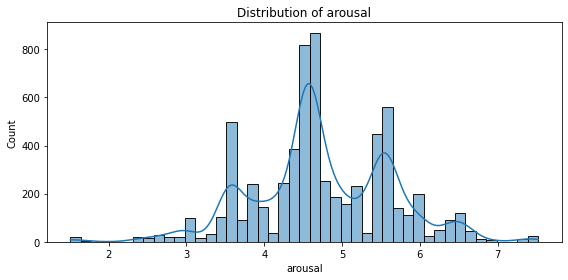

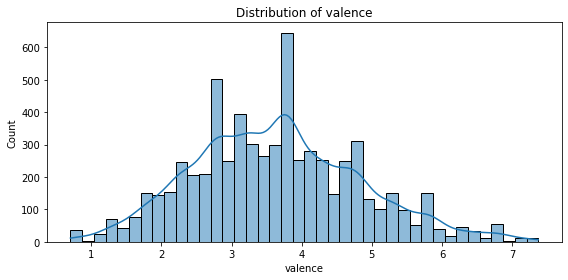

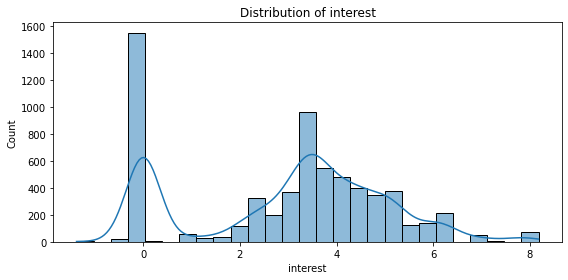

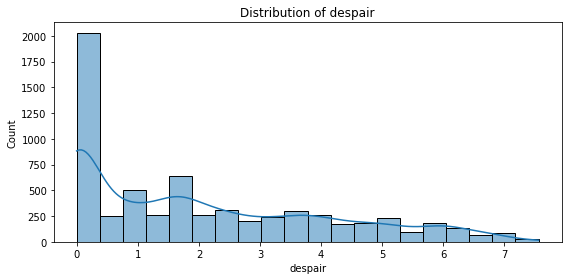

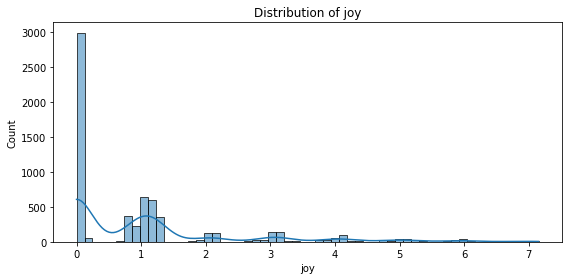

In [6]:
plot_distributions(y_data)

In [7]:
target_vars = y_data 
summary_stats = target_vars.describe().T 
summary_stats['skewness'] = target_vars.skew()
summary_stats['kurtosis'] = target_vars.kurt()
summary_stats = summary_stats[['mean', '50%', 'std', 'min', 'max', 'skewness', 'kurtosis']].round(2)
summary_stats.columns = ['Mean', 'Median', 'Std. Dev', 'Min', 'Max', 'Skewness', 'Kurtosis']
print(summary_stats)



          Mean  Median  Std. Dev   Min   Max  Skewness  Kurtosis
arousal   4.74    4.59      0.89  1.51  7.52     -0.05      0.42
valence   3.64    3.61      1.19  0.70  7.37      0.33     -0.07
interest  3.01    3.39      2.04 -1.38  8.18     -0.20     -0.82
despair   2.07    1.56      2.03 -0.00  7.56      0.73     -0.58
joy       1.02    0.77      1.42  0.00  7.15      1.87      3.32


In [8]:
summary_stats

Mean  Median  Std. Dev   Min   Max  Skewness  Kurtosis
arousal   4.74    4.59      0.89  1.51  7.52     -0.05      0.42
valence   3.64    3.61      1.19  0.70  7.37      0.33     -0.07
interest  3.01    3.39      2.04 -1.38  8.18     -0.20     -0.82
despair   2.07    1.56      2.03 -0.00  7.56      0.73     -0.58
joy       1.02    0.77      1.42  0.00  7.15      1.87      3.32

### Network Analysis

In [9]:
corr_matrix = x_data.corr(method='pearson').abs()

In [10]:
threshold = 0.90
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strong_corr = upper_tri.stack().reset_index()
strong_corr.columns = ['Feature1', 'Feature2', 'Correlation']
strong_corr = strong_corr[strong_corr['Correlation'].abs() > threshold]
#print(f"Number of edges with |correlation| > {threshold}: {strong_corr.shape[0]}")

Number of edges with |correlation| > 0.9: 10640

In [11]:
G = nx.Graph()
features = x_data.columns.tolist()
G.add_nodes_from(features)
edges = list(zip(strong_corr['Feature1'], strong_corr['Feature2'], strong_corr['Correlation']))
G.add_weighted_edges_from(edges)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1920
Number of edges: 10640


In [12]:
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_degree = sorted_degree[:10]
print("Top 10 Features by Degree Centrality:")
for feature, centrality in top_degree:
    print(f"{feature}: {centrality:.4f}")
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_betweenness = sorted_betweenness[:10]
print("\nTop 10 Features by Betweenness Centrality:")
for feature, centrality in top_betweenness:
    print(f"{feature}: {centrality:.4f}")

Top 10 Features by Degree Centrality:
X1526: 0.0964
X1348: 0.0948
X1512: 0.0948
X1896: 0.0943
X1501: 0.0938
X1649: 0.0922
X1457: 0.0912
X1349: 0.0907
X1885: 0.0907
X1509: 0.0896

Top 10 Features by Betweenness Centrality:
X1045: 0.0129
X661: 0.0121
X509: 0.0120
X1344: 0.0119
X1169: 0.0118
X1429: 0.0112
X1258: 0.0066
X202: 0.0043
X1414: 0.0041
X181: 0.0041


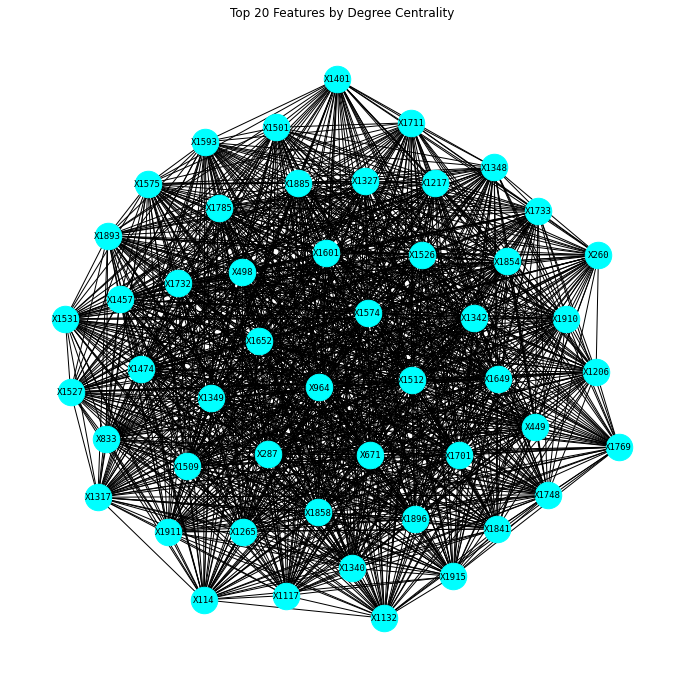

In [13]:
top_features = [feature for feature, centrality in sorted_degree[:50]]
subgraph = G.subgraph(top_features)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color='cyan')
nx.draw_networkx_edges(subgraph, pos, width=1)
nx.draw_networkx_labels(subgraph, pos, font_size=9, font_family='monospace')
plt.title('Top 20 Features by Degree Centrality')
plt.axis('off')
plt.show()

### Correlation matrix, takes a while to compute...

In [14]:
corr_matrix = x_data.corr()

## buildoing the network graph and then performing community detection using the louvain method

In [15]:
np.random.seed(80085)
G = nx.Graph()
features = sorted(corr_matrix.columns)
G.add_nodes_from(features)
threshold = 0.5
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            G.add_edge(features[i], features[j], weight=abs(corr_value))
initial_partition = {features[i]: i for i in range(len(features))}
partition = community_louvain.best_partition(G, weight='weight', partition=initial_partition)
communities = defaultdict(list)
for node, community_id in partition.items():
    communities[community_id].append(node)
for community_id, nodes in communities.items():
    print(f"\nCommunity {community_id} ({len(nodes)} features):")
    print(nodes)


Community 0 (703 features):
['X0', 'X100', 'X1001', 'X1006', 'X1007', 'X1011', 'X1015', 'X1016', 'X1019', 'X102', 'X1020', 'X1022', 'X1023', 'X1024', 'X1026', 'X1030', 'X1033', 'X1041', 'X1044', 'X1048', 'X1049', 'X1051', 'X1053', 'X1057', 'X1059', 'X106', 'X1060', 'X1063', 'X1064', 'X1066', 'X1068', 'X107', 'X1073', 'X1076', 'X1077', 'X1080', 'X1082', 'X1085', 'X1088', 'X1091', 'X1100', 'X1110', 'X1115', 'X1117', 'X1120', 'X1122', 'X1124', 'X1130', 'X1132', 'X1141', 'X1144', 'X1147', 'X1153', 'X1158', 'X1159', 'X116', 'X1163', 'X1165', 'X1166', 'X1170', 'X1172', 'X1178', 'X118', 'X1180', 'X1181', 'X1182', 'X1185', 'X1186', 'X119', 'X1193', 'X1195', 'X1196', 'X1197', 'X1201', 'X1206', 'X1210', 'X1212', 'X1213', 'X1214', 'X1215', 'X1220', 'X1222', 'X1225', 'X1231', 'X1233', 'X1236', 'X1238', 'X1239', 'X124', 'X1245', 'X1246', 'X1247', 'X125', 'X1250', 'X1251', 'X1252', 'X1256', 'X1257', 'X1258', 'X1262', 'X1265', 'X1272', 'X1273', 'X1275', 'X1284', 'X1286', 'X1287', 'X1291', 'X1296', '

In [16]:
def visualize_community(G, partition, community_id):
    nodes_in_community = [node for node, comm_id in partition.items() if comm_id == community_id]
    subgraph = G.subgraph(nodes_in_community)
    pos = nx.spring_layout(subgraph)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(subgraph, pos, node_size=100, node_color='skyblue')
    nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
    nx.draw_networkx_labels(subgraph, pos, font_size=8)
    plt.title(f'Community {community_id} Visualization')
    plt.axis('off')
    plt.show()
community_sizes = {comm_id: len(nodes) for comm_id, nodes in communities.items()}
largest_community_id = max(community_sizes, key=community_sizes.get)
#print(f"Visualizing the largest community: Community {largest_community_id}")
#visualize_community(G, partition, largest_community_id)

Visualizing Community 0 (Size: 703)


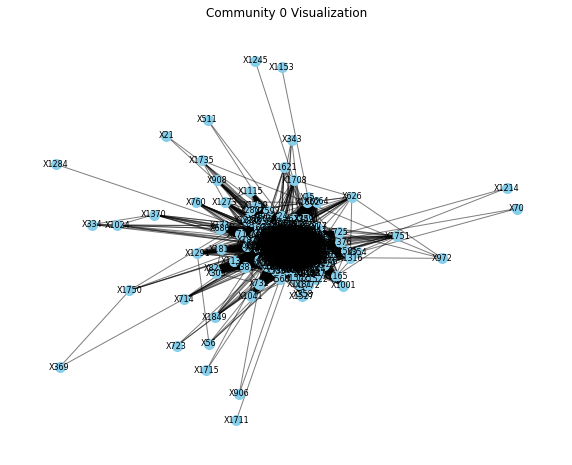

Visualizing Community 1 (Size: 660)


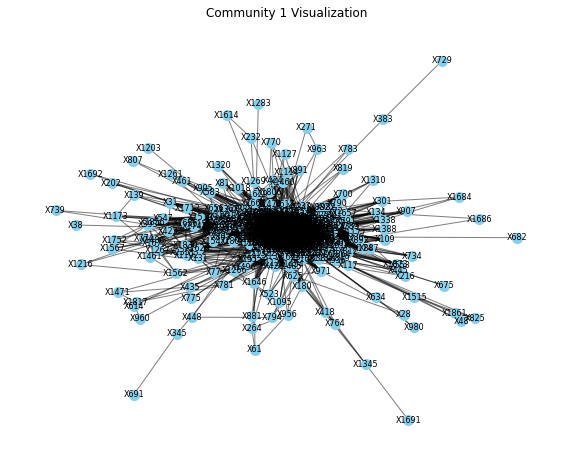

Visualizing Community 4 (Size: 542)


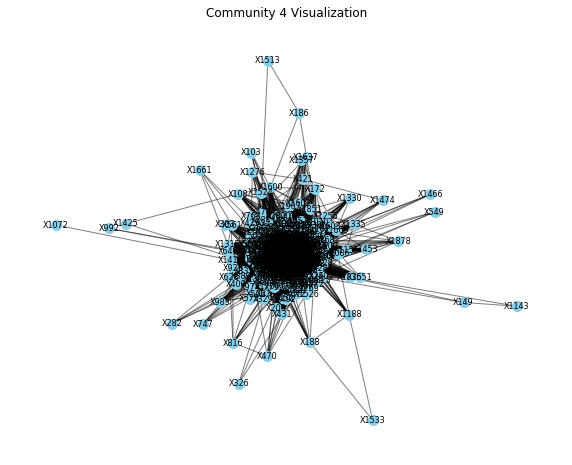

Visualizing Community 3 (Size: 5)


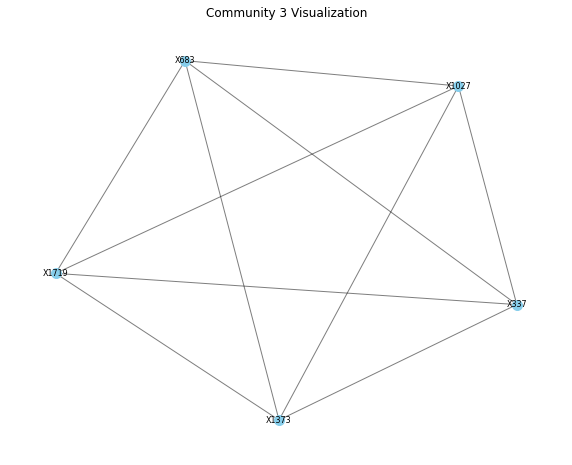

Visualizing Community 5 (Size: 5)


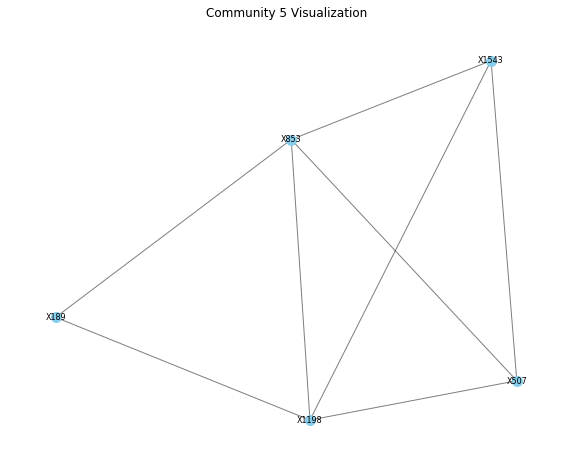

Visualizing Community 6 (Size: 2)


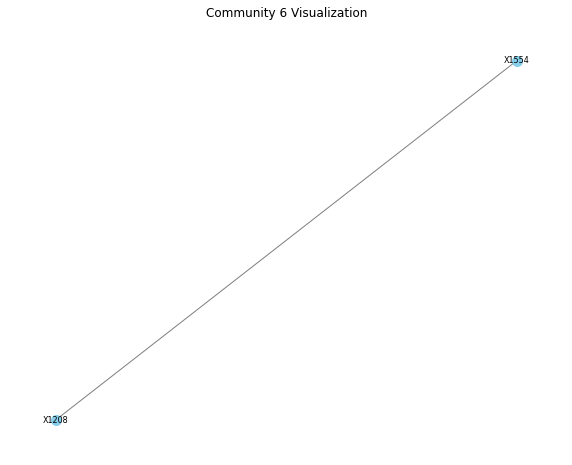

Visualizing Community 2 (Size: 3)


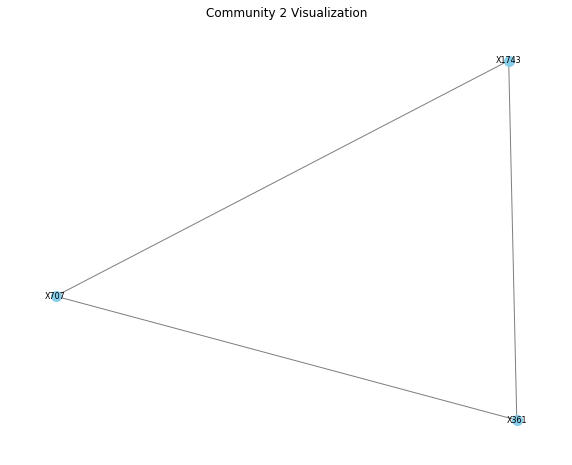

In [17]:
size_threshold = 1  # Adjust based on your data
large_communities = [comm_id for comm_id, size in community_sizes.items() if size >= size_threshold]
for comm_id in large_communities:
    print(f"Visualizing Community {comm_id} (Size: {community_sizes[comm_id]})")
    visualize_community(G, partition, comm_id)

In [18]:
def eigenvector_centrality(community_list):
    subgraph = G.subgraph(community_list)
    eigen_centrality = nx.eigenvector_centrality(subgraph) 
    return eigen_centrality


def get_top_50_percent_features(input_dict):
    sorted_items = sorted(input_dict.items(), key=lambda x: x[1], reverse=True)
    top_n = len(sorted_items) // 2
    trimmed_dict = dict(sorted_items[:top_n])
    return trimmed_dict


def get_dict_keys(input_dict):
    return list(input_dict.keys())


In [19]:
community_0_eigen = eigenvector_centrality(communities[0])
community_1_eigen = eigenvector_centrality(communities[1])
community_2_eigen = eigenvector_centrality(communities[2])
community_3_eigen = eigenvector_centrality(communities[3])
community_4_eigen = eigenvector_centrality(communities[4])
community_5_eigen = eigenvector_centrality(communities[5])
community_6_eigen = eigenvector_centrality(communities[6])

In [20]:
len(community_0_eigen),len(community_1_eigen),len(community_2_eigen),len(community_3_eigen),len(community_4_eigen),len(community_5_eigen),len(community_6_eigen)

(703, 660, 3, 5, 542, 5, 2)

## only trimming the big communities.

In [21]:
community_0_eigen_trim = get_top_50_percent_features(community_0_eigen)
community_1_eigen_trim = get_top_50_percent_features(community_1_eigen)
#community_2_eigen_trimmed = get_top_50_percent_features(community_2_eigen)
#community_3_eigen_trimmed = get_top_50_percent_features(community_3_eigen)
community_4_eigen_trim = get_top_50_percent_features(community_4_eigen)
#community_5_eigen_trimmed = get_top_50_percent_features(community_5_eigen)
#community_6_eigen_trimmed = get_top_50_percent_features(community_6_eigen)

In [22]:
len(community_0_eigen_trim),len(community_1_eigen_trim),len(community_2_eigen),len(community_3_eigen),len(community_4_eigen_trim),len(community_5_eigen),len(community_6_eigen)

(351, 330, 3, 5, 271, 5, 2)

In [23]:
(351+330+ 3+ 5+ 271 + 5 +  2)

967

### Now Exploring the Communities.

In [24]:
com_0_names = get_dict_keys(community_0_eigen_trim)
com_1_names = get_dict_keys(community_1_eigen_trim)
com_2_names = get_dict_keys(community_2_eigen)
com_3_names = get_dict_keys(community_3_eigen)
com_4_names = get_dict_keys(community_4_eigen_trim)
com_5_names = get_dict_keys(community_5_eigen)
com_6_names = get_dict_keys(community_6_eigen)

### Exploring the smaller communities first

In [25]:
x_data[com_2_names].corr()

X707      X361     X1743
X707   1.000000 -0.343764 -0.678803
X361  -0.343764  1.000000  0.428637
X1743 -0.678803  0.428637  1.000000

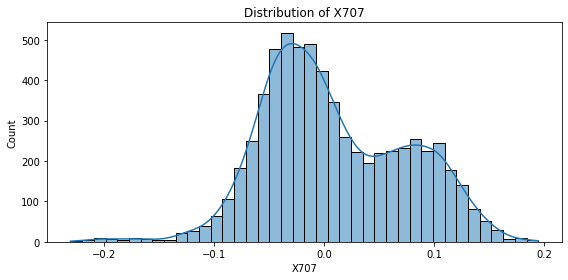

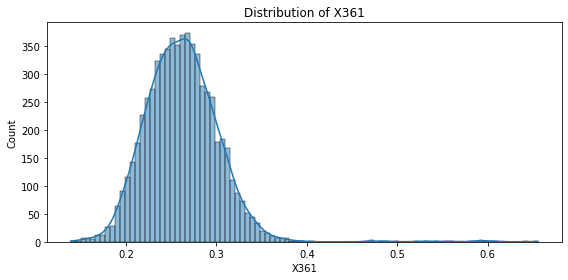

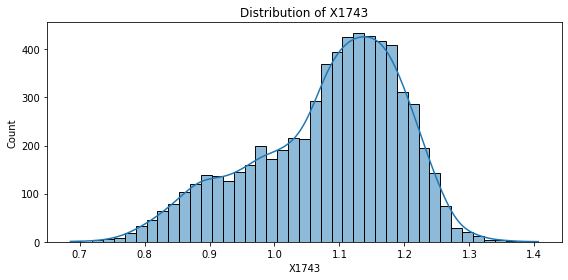

In [26]:
plot_distributions(x_data[com_2_names])

In [27]:
x_data[com_3_names].corr()

X683     X1027     X1373     X1719      X337
X683   1.000000  0.310556  0.386570  0.129695 -0.287812
X1027  0.310556  1.000000  0.348068 -0.404664 -0.247087
X1373  0.386570  0.348068  1.000000  0.378428 -0.718973
X1719  0.129695 -0.404664  0.378428  1.000000 -0.541195
X337  -0.287812 -0.247087 -0.718973 -0.541195  1.000000

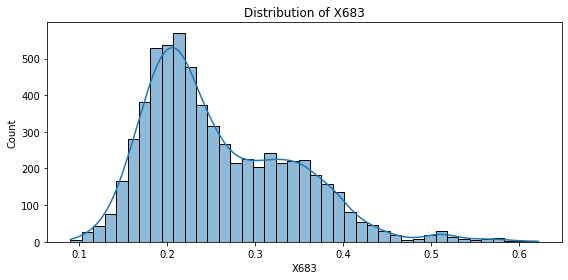

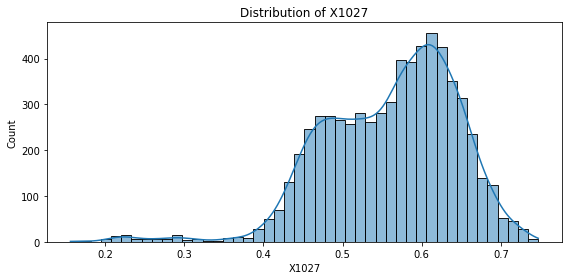

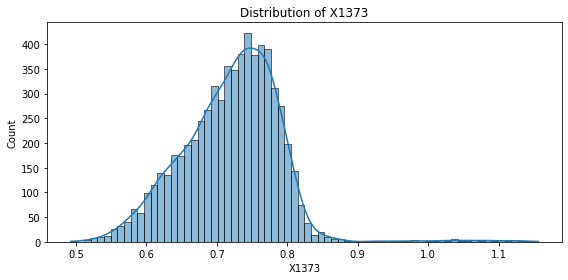

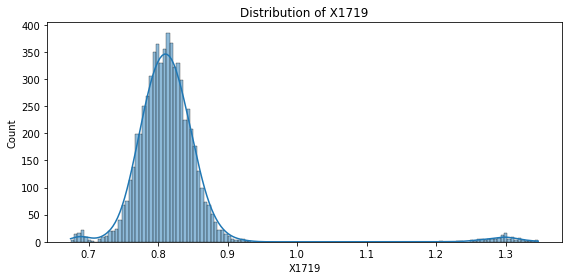

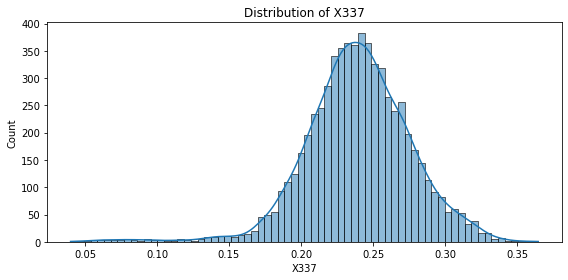

In [28]:
plot_distributions(x_data[com_3_names])

In [29]:
x_data[com_5_names].corr()

X507      X189      X853     X1198     X1543
X507   1.000000  0.234797 -0.051650  0.151690  0.232686
X189   0.234797  1.000000 -0.154778  0.079955  0.098301
X853  -0.051650 -0.154778  1.000000  0.602423  0.743185
X1198  0.151690  0.079955  0.602423  1.000000  0.645064
X1543  0.232686  0.098301  0.743185  0.645064  1.000000

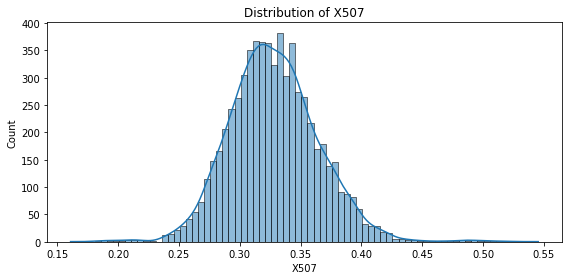

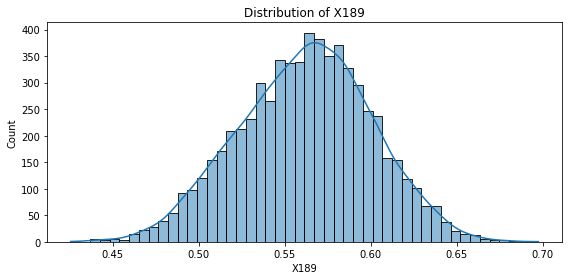

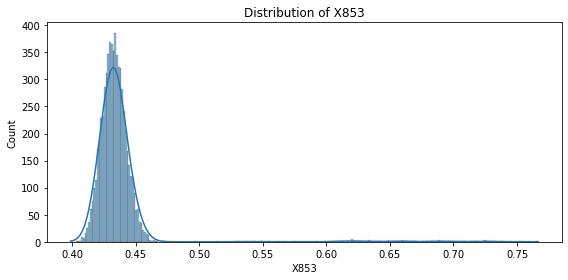

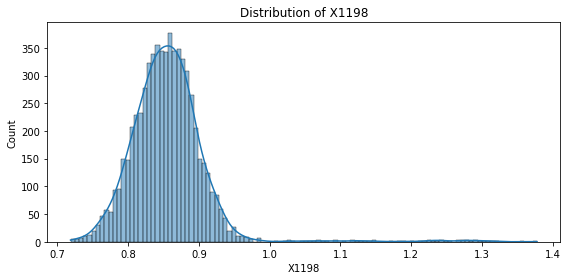

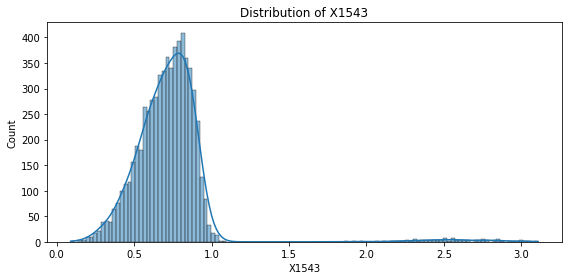

In [30]:
plot_distributions(x_data[com_5_names])

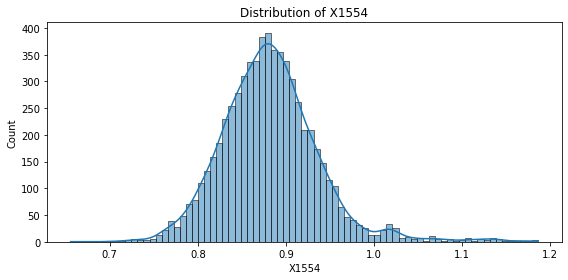

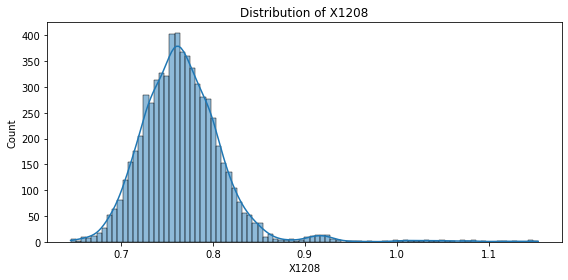

In [31]:
plot_distributions(x_data[com_6_names])

In [32]:
x_data[com_6_names].corr()

X1554     X1208
X1554  1.000000  0.256294
X1208  0.256294  1.000000

In [33]:
x_data[com_0_names].corr()

X1238      X118     X1066      X594       X25      X477      X124  \
X1238  1.000000  0.790866 -0.053560  0.423351 -0.345016  0.207739  0.625604   
X118   0.790866  1.000000 -0.219067  0.570567 -0.058027  0.296170  0.689166   
X1066 -0.053560 -0.219067  1.000000 -0.638099 -0.766619 -0.715364 -0.533621   
X594   0.423351  0.570567 -0.638099  1.000000  0.444847  0.492618  0.799283   
X25   -0.345016 -0.058027 -0.766619  0.444847  1.000000  0.510931  0.271969   
...         ...       ...       ...       ...       ...       ...       ...   
X50   -0.186535  0.099624 -0.581606  0.427772  0.692575  0.490734  0.208965   
X926  -0.314236 -0.359749  0.477763 -0.688976 -0.304418 -0.272088 -0.627893   
X1766  0.920558  0.735472  0.057677  0.378235 -0.418034  0.082856  0.591373   
X403   0.194321  0.450715 -0.670565  0.744609  0.579530  0.504040  0.652447   
X1838  0.095172 -0.020769  0.483361 -0.363997 -0.488974 -0.442337 -0.294862   

           X454     X1178     X1026  ...     X1818      X948      X609  \
X1238 -0.491045  0.582563 -0.359862  ...  0.004404  0.421260  0.152326   
X118  -0.220268  0.489830 -0.527392  ... -0.189348  0.230815  0.346876   
X1066 -0.481750 -0.029324  0.570457  ...  0.377290 -0.071103 -0.850735   
X594   0.188530  0.057717 -0.750951  ... -0.471491 -0.105355  0.715927   
X25    0.726237 -0.203277 -0.395554  ... -0.387558 -0.186003  0.716493   
...         ...       ...       ...  ...       ...       ...       ...   
X50    0.717114  0.001343 -0.265316  ... -0.410969 -0.129766  0.621796   
X926  -0.005864  0.074124  0.619584  ...  0.277199  0.102283 -0.512582   
X1766 -0.620392  0.502803 -0.340782  ...  0.067877  0.330148  0.043308   
X403   0.375966 -0.040090 -0.669333  ... -0.396788 -0.194425  0.683052   
X1838 -0.369031  0.160419  0.284271  ...  0.230321  0.045546 -0.447927   

           X924      X660       X50      X926     X1766      X403     X1838  
X1238  0.172041 -0.296793 -0.186535 -0.314236  0.920558  0.194321  0.095172  
X118   0.243406  0.010009  0.099624 -0.359749  0.735472  0.450715 -0.020769  
X1066 -0.557067 -0.354739 -0.581606  0.477763  0.057677 -0.670565  0.483361  
X594   0.366580  0.369317  0.427772 -0.688976  0.378235  0.744609 -0.363997  
X25    0.441227  0.487715  0.692575 -0.304418 -0.418034  0.579530 -0.488974  
...         ...       ...       ...       ...       ...       ...       ...  
X50    0.515822  0.513468  1.000000 -0.171407 -0.272697  0.569880 -0.374777  
X926  -0.098840 -0.186229 -0.171407  1.000000 -0.317373 -0.536126  0.333287  
X1766  0.009100 -0.283389 -0.272697 -0.317373  1.000000  0.180433  0.201644  
X403   0.347938  0.522991  0.569880 -0.536126  0.180433  1.000000 -0.344511  
X1838 -0.409701 -0.329823 -0.374777  0.333287  0.201644 -0.344511  1.000000  

[351 rows x 351 columns]

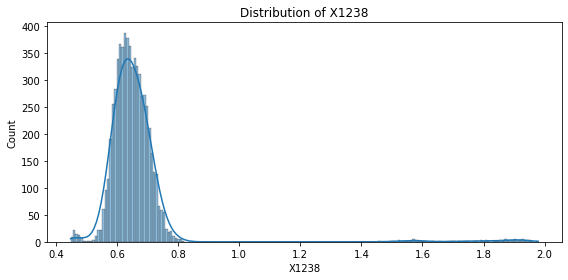

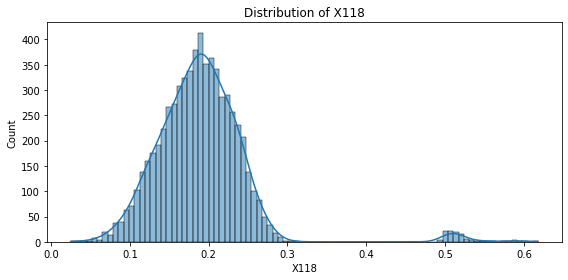

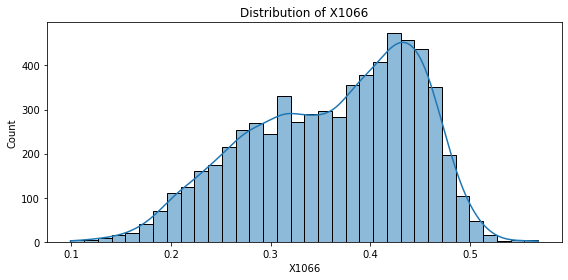

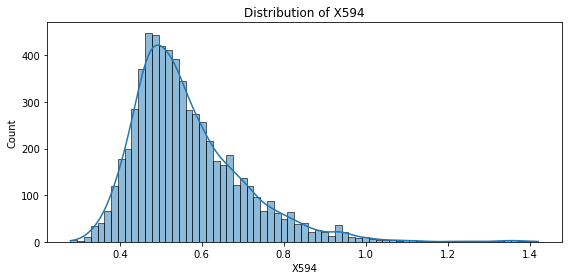

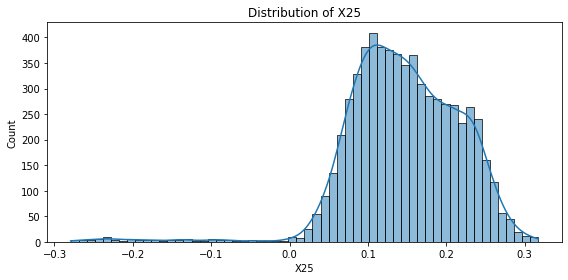

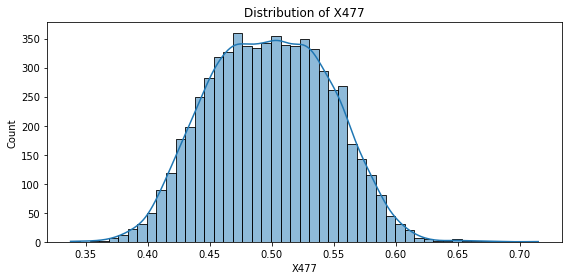

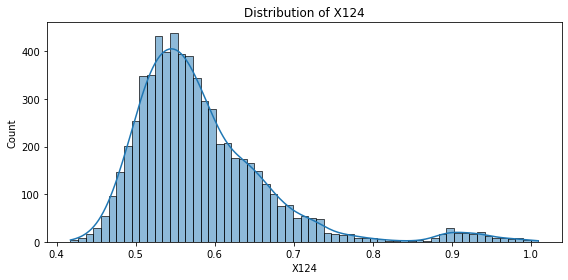

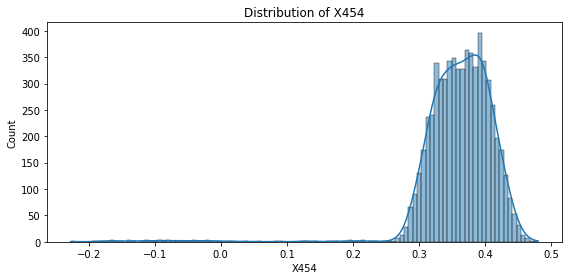

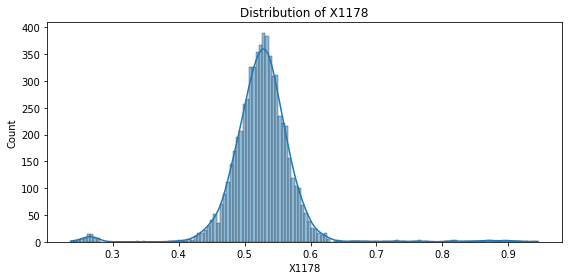

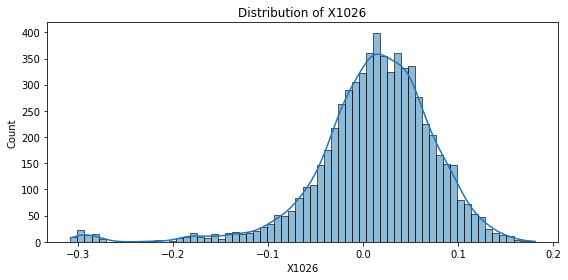

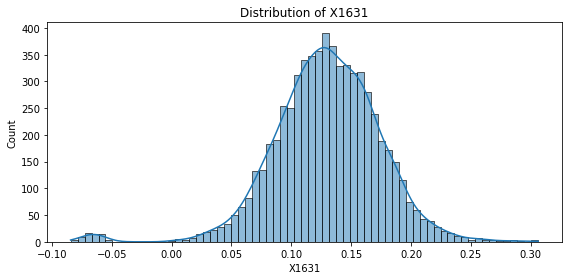

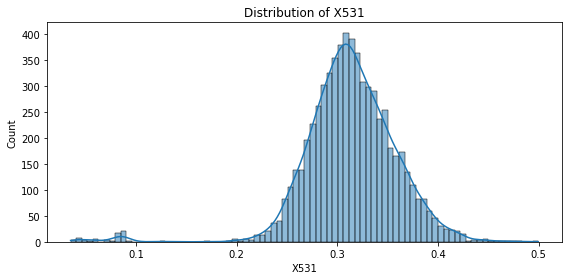

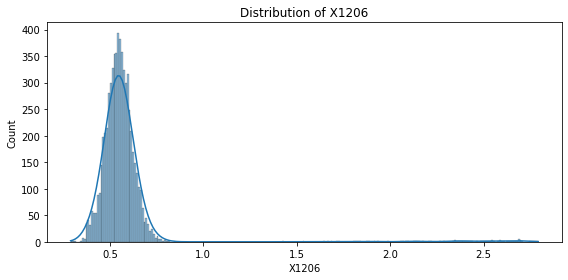

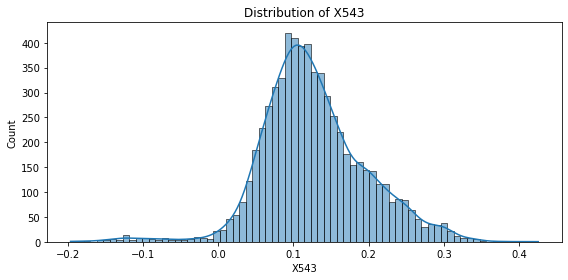

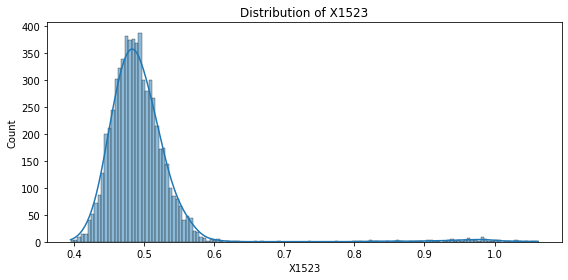

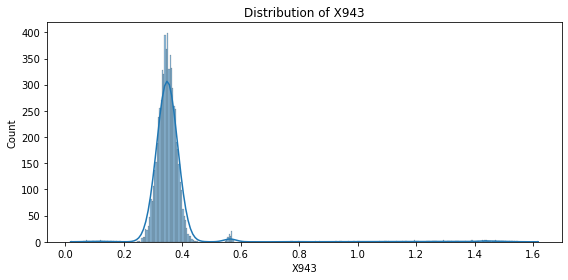

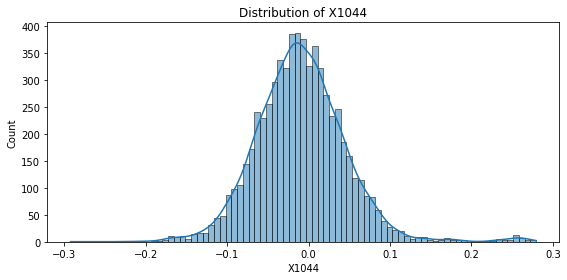

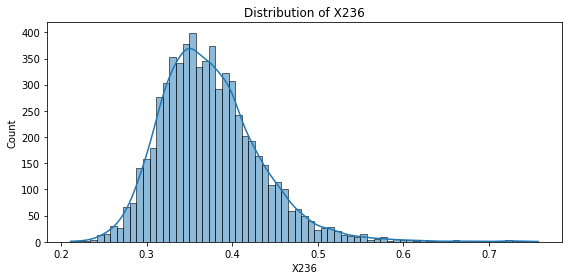

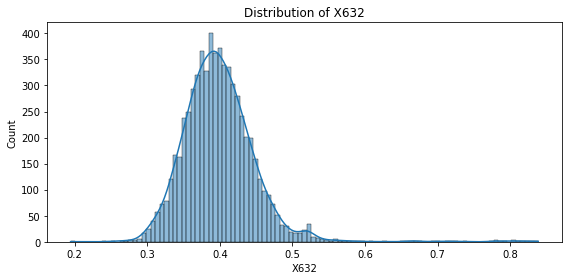

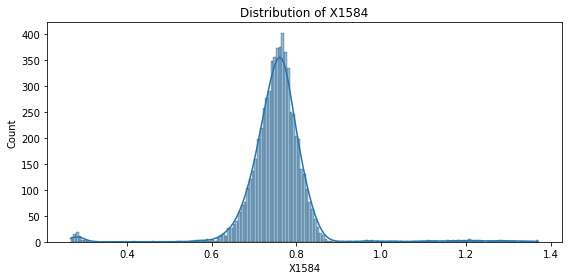

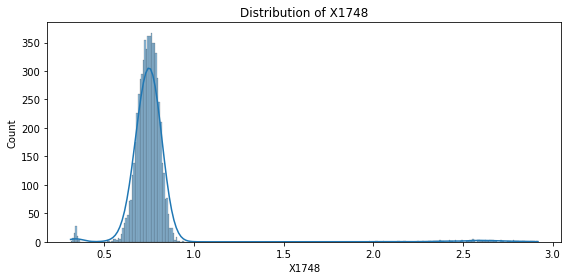

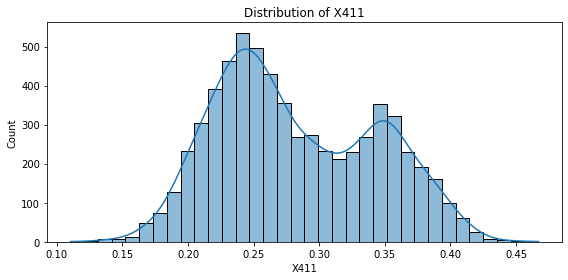

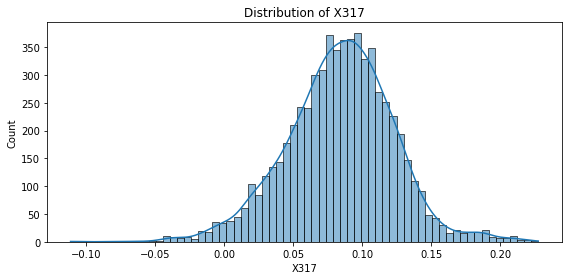

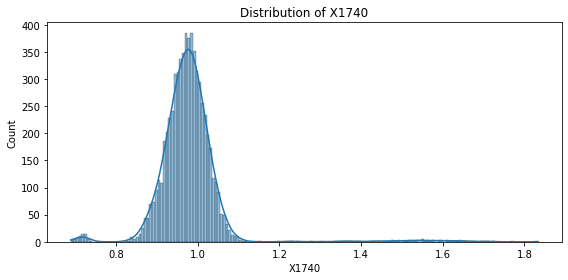

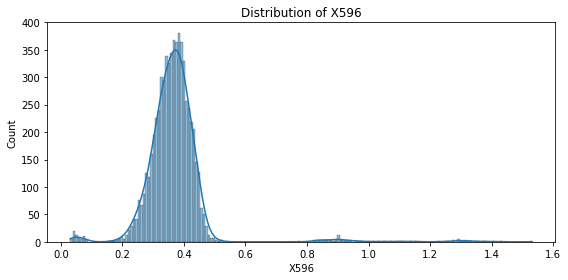

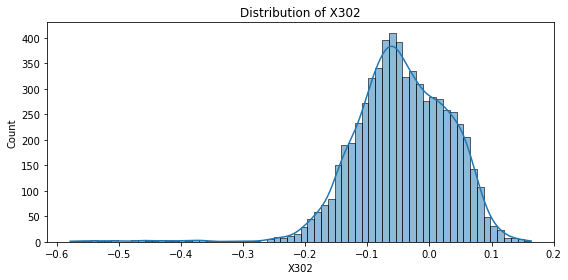

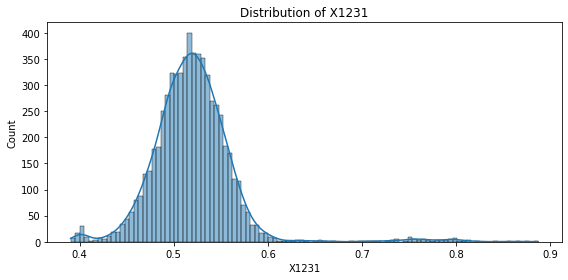

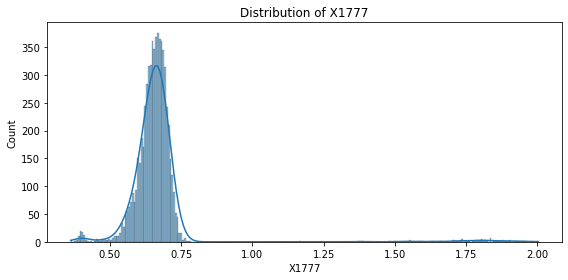

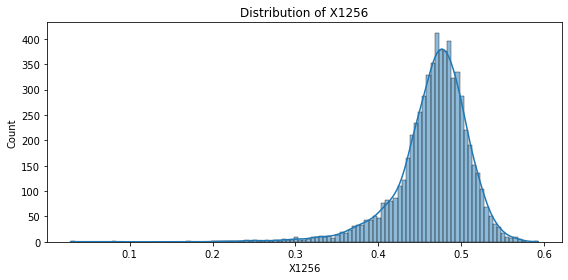

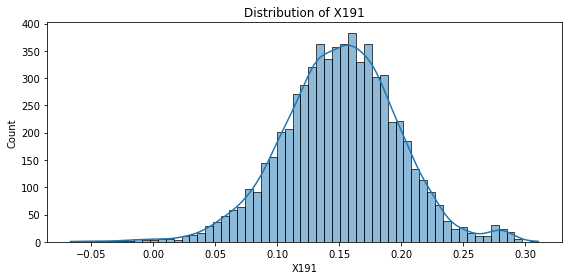

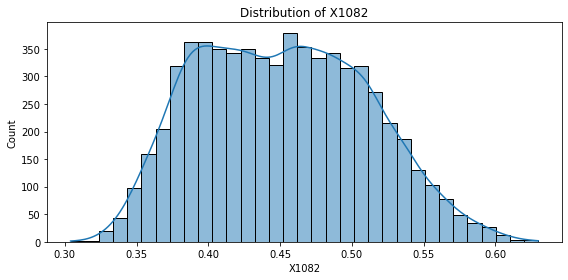

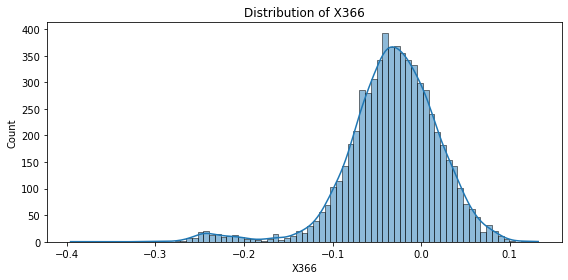

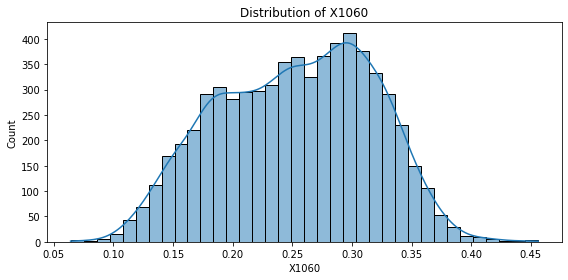

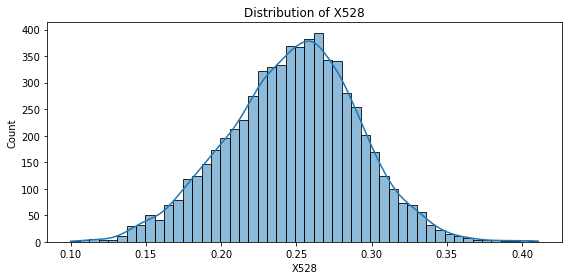

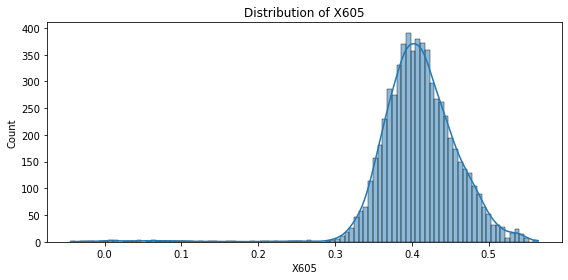

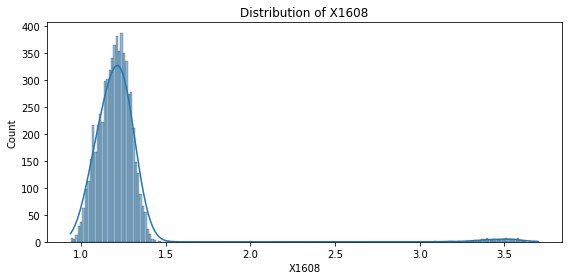

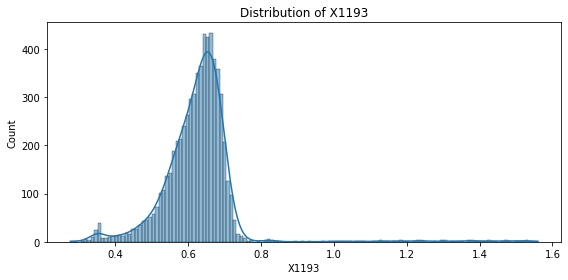

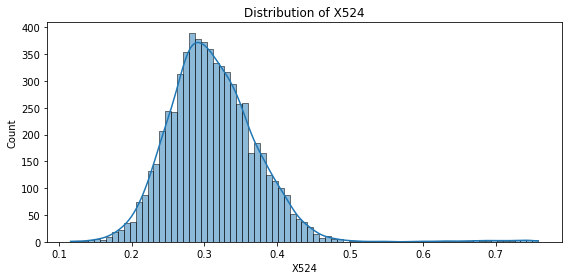

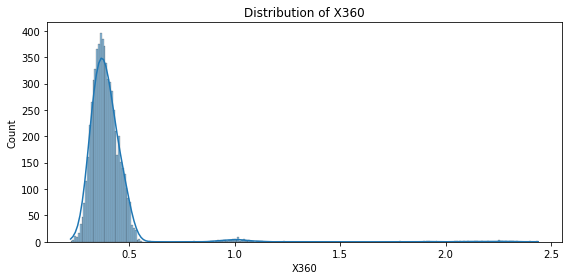

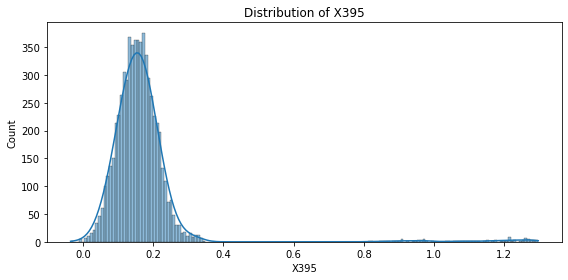

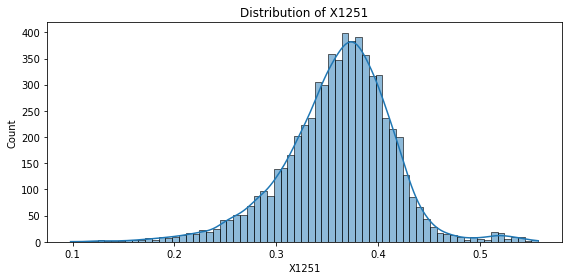

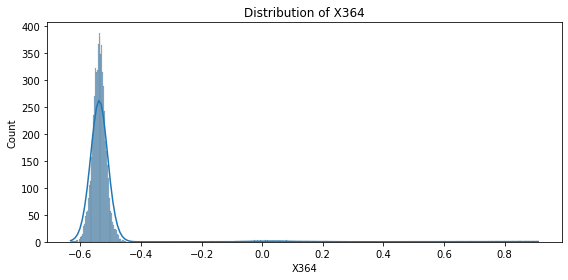

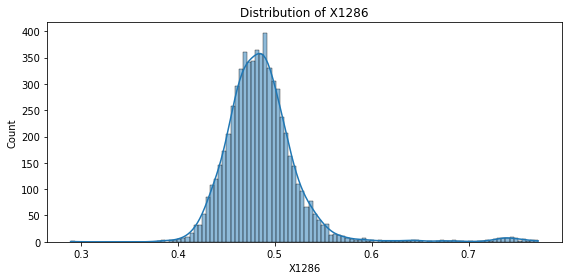

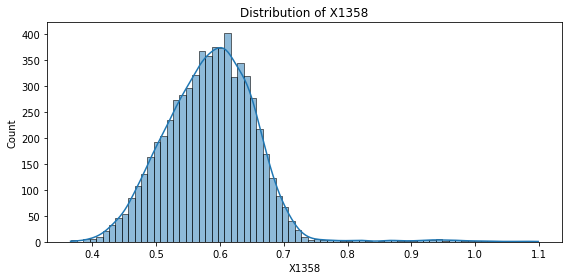

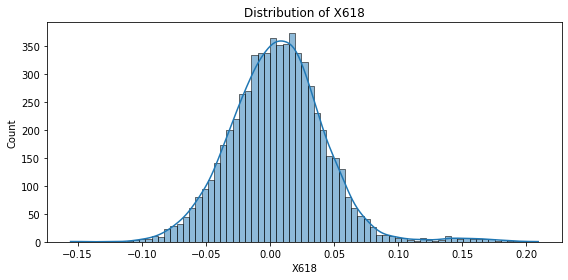

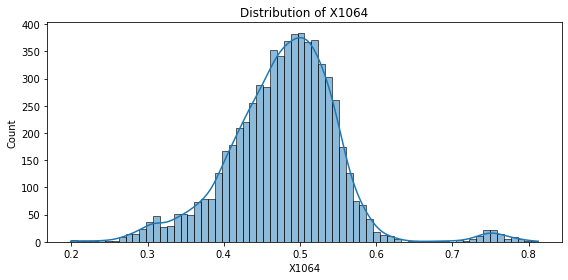

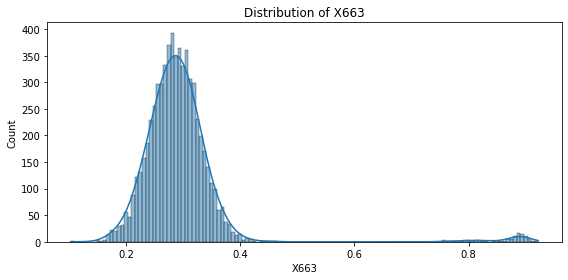

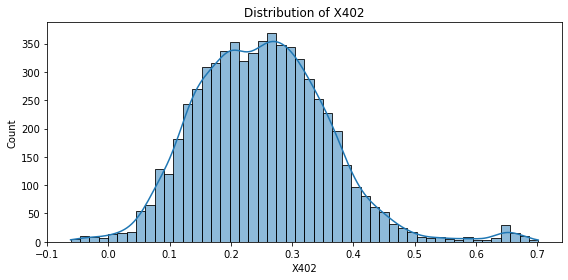

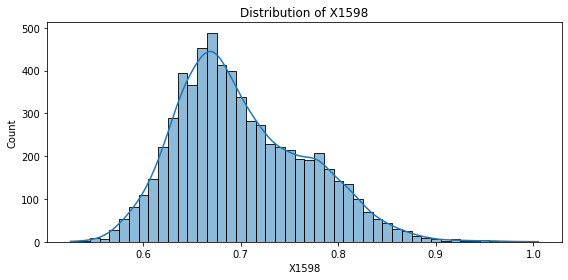

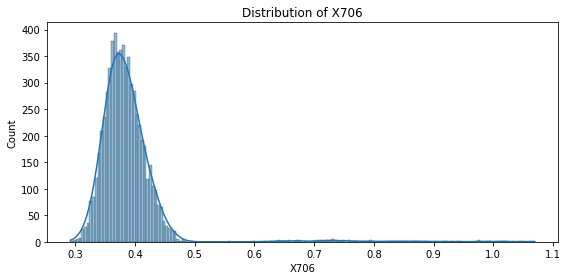

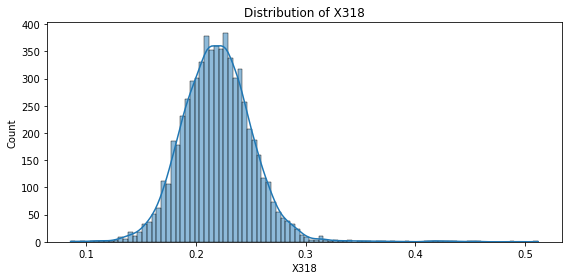

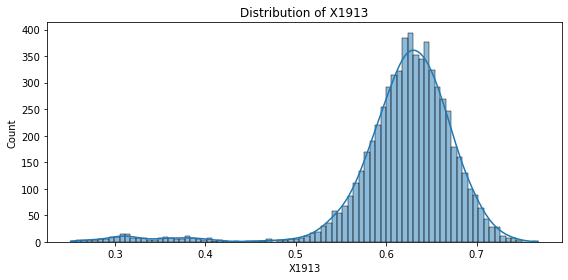

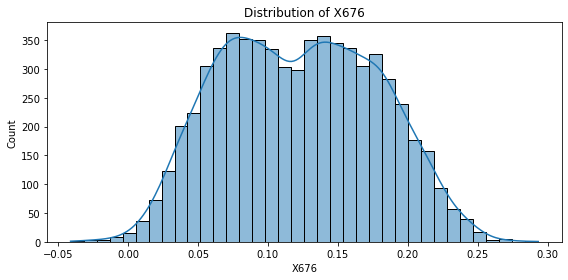

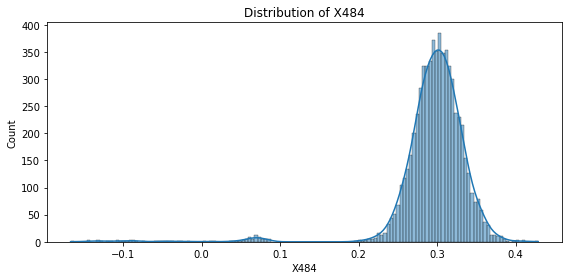

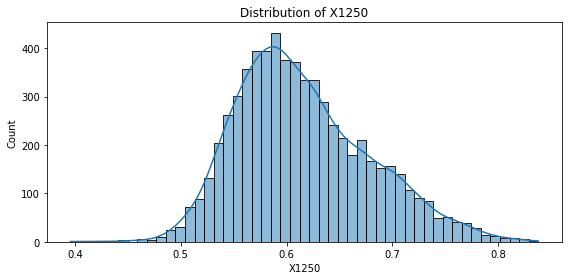

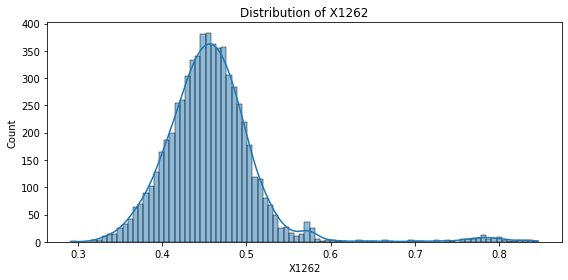

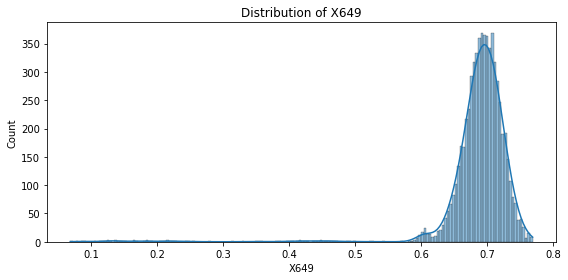

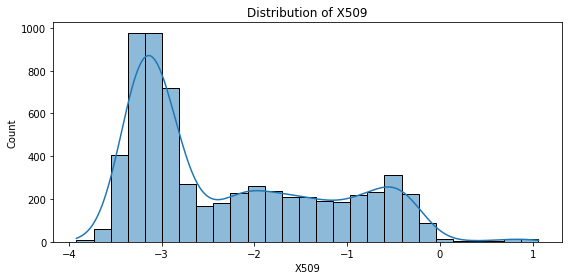

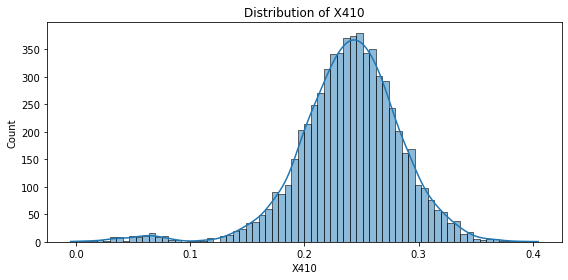

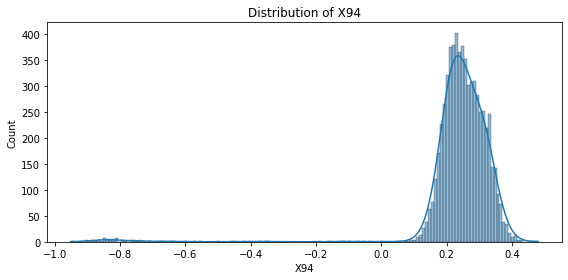

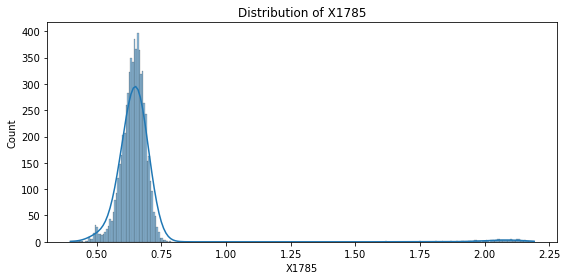

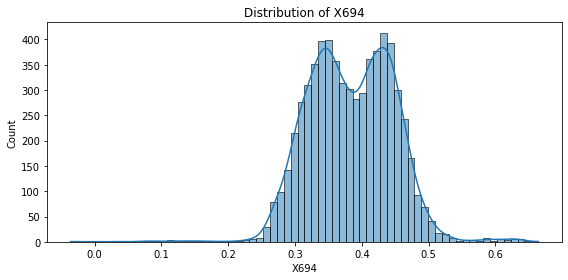

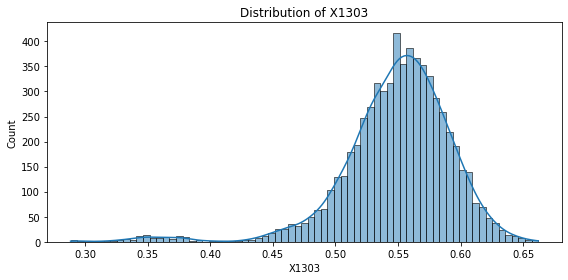

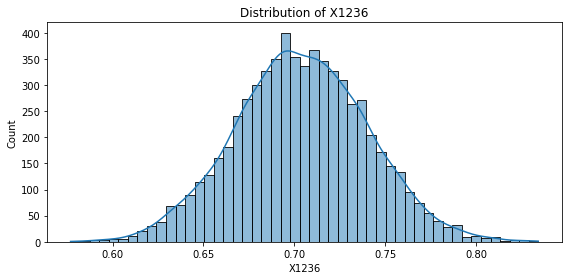

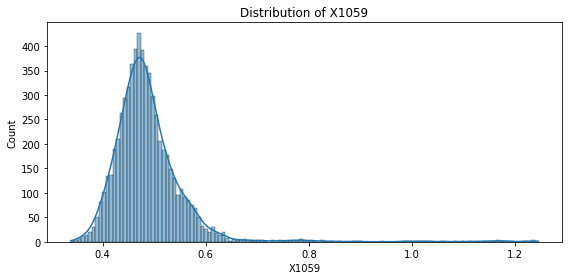

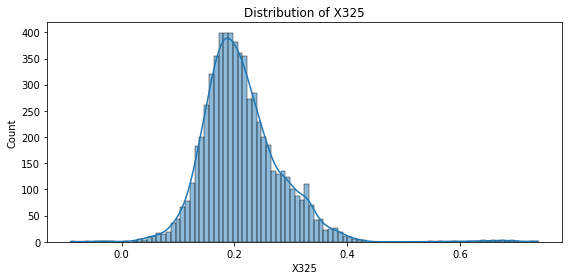

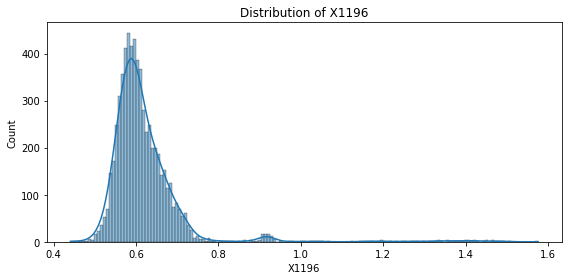

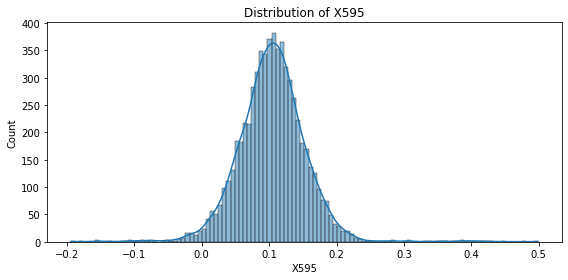

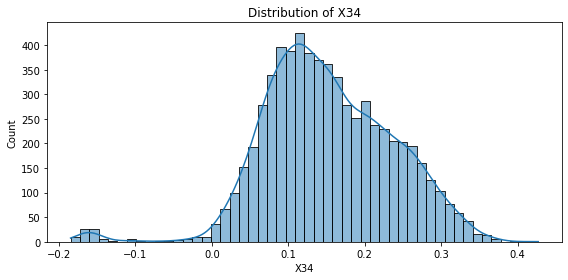

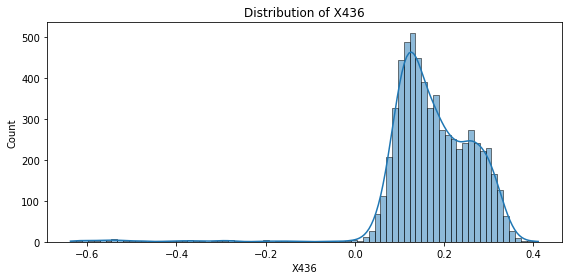

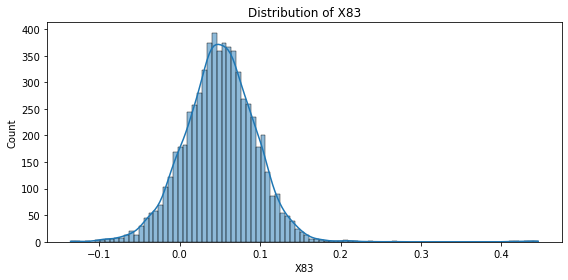

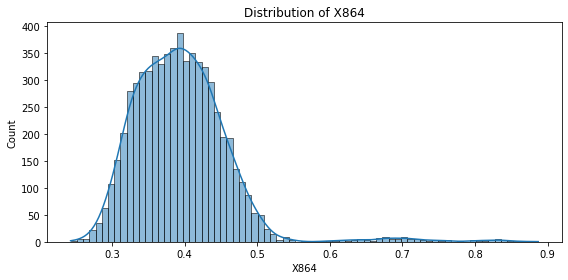

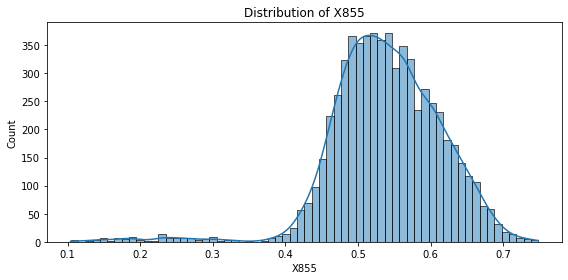

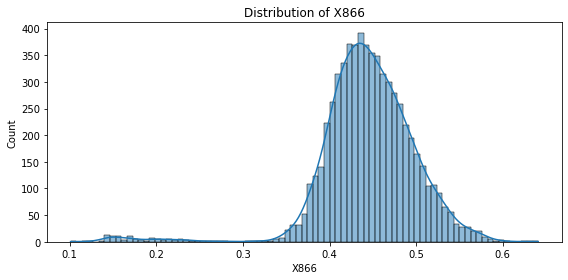

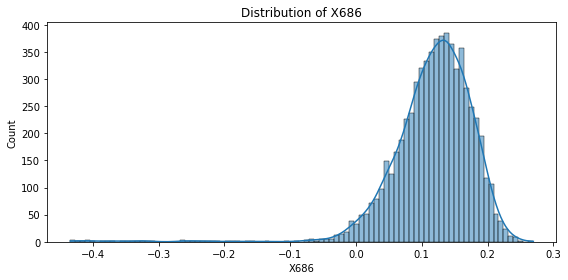

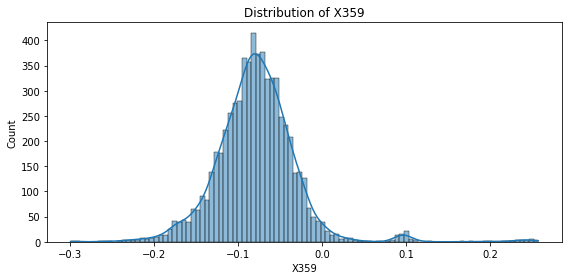

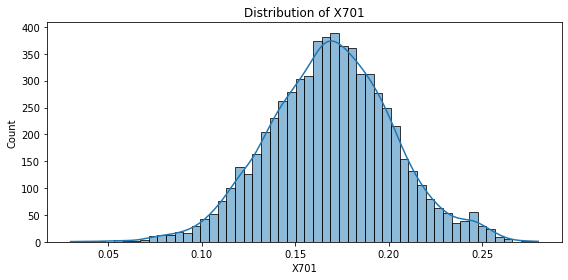

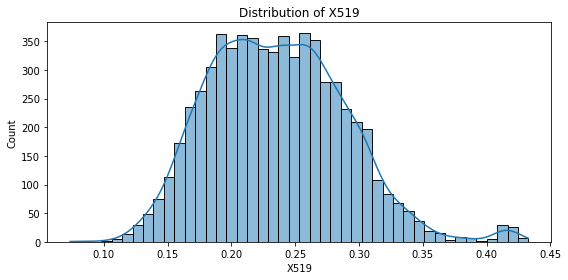

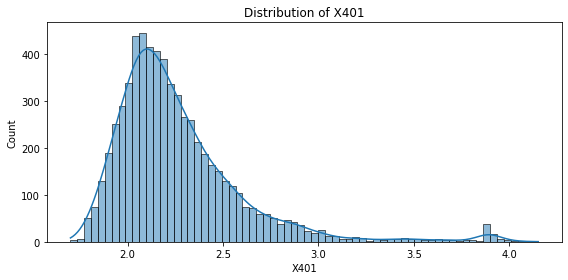

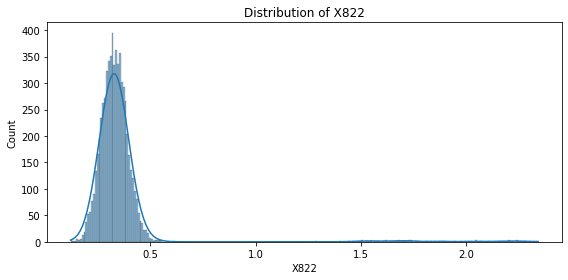

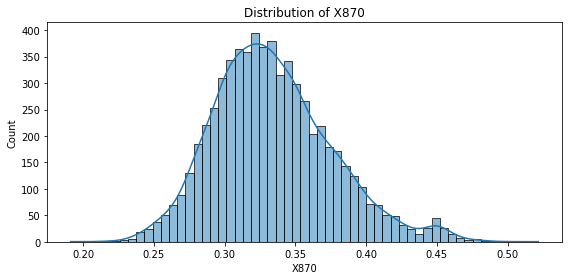

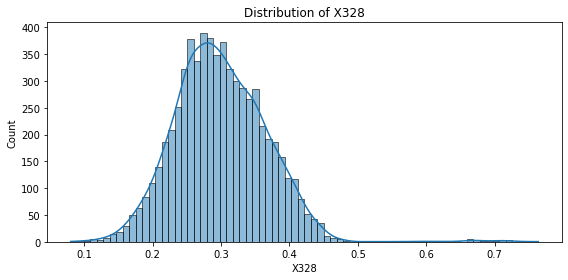

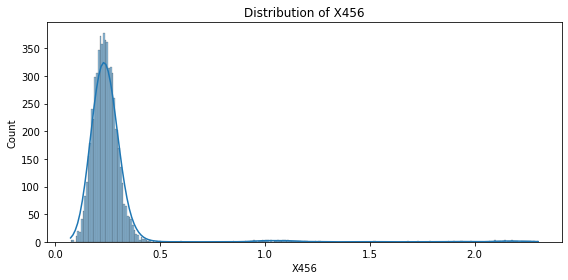

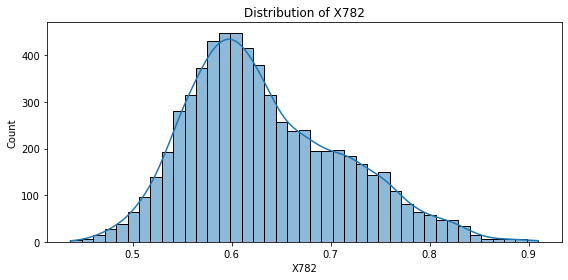

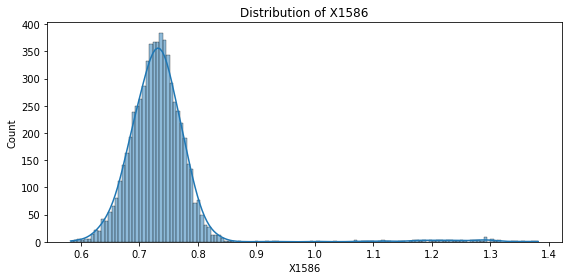

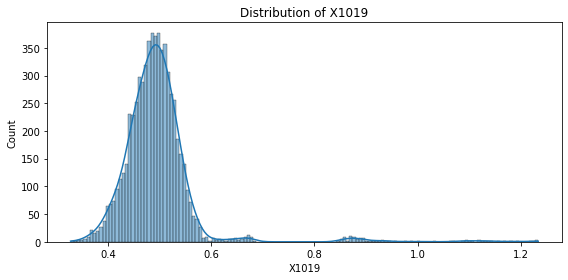

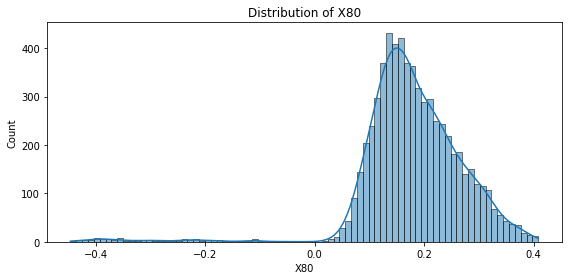

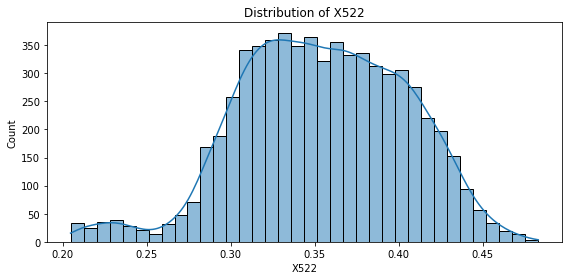

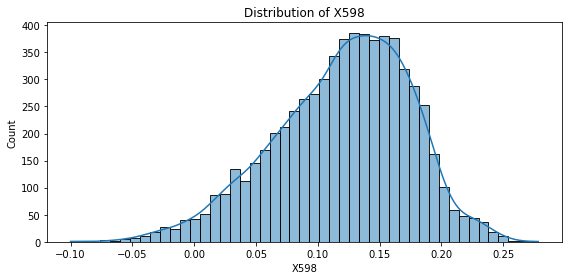

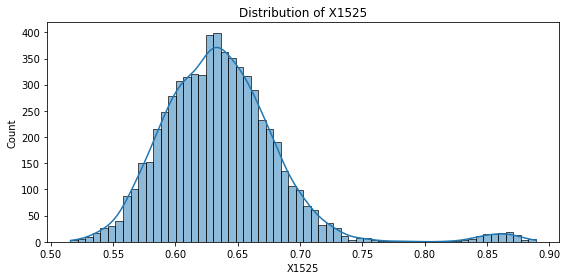

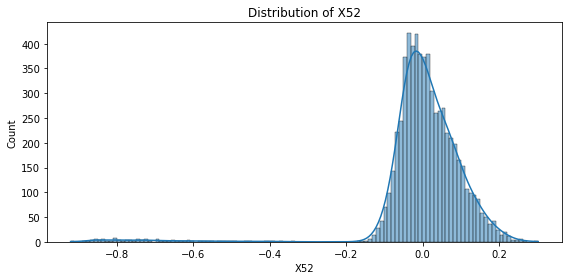

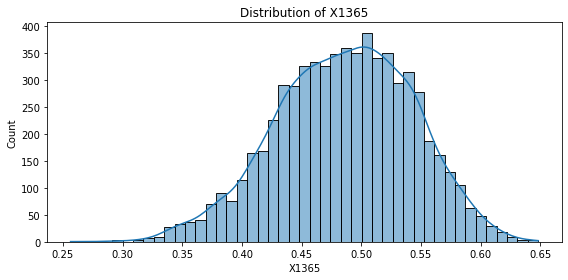

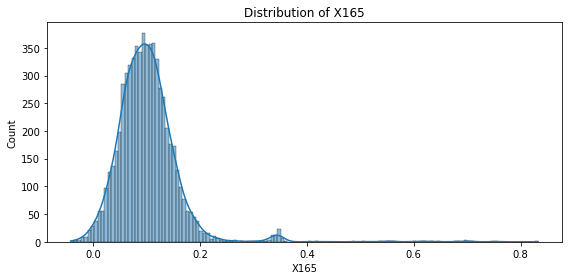

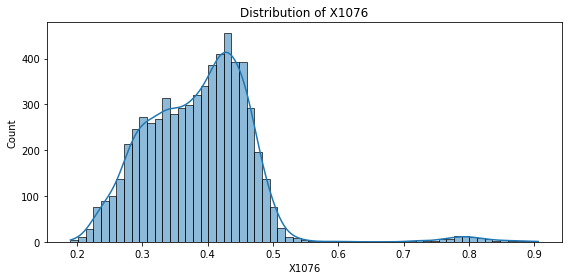

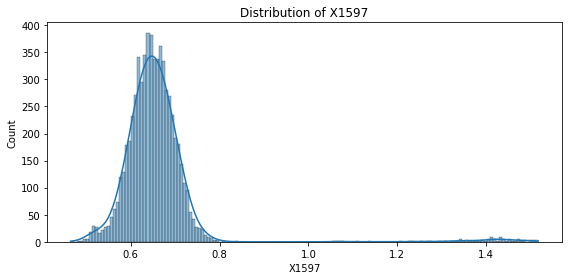

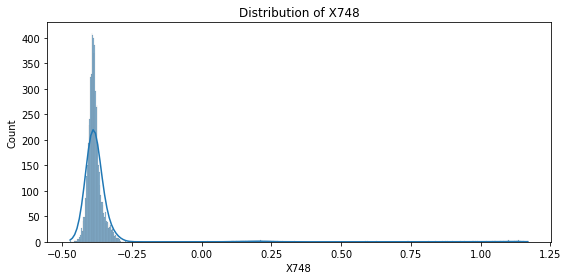

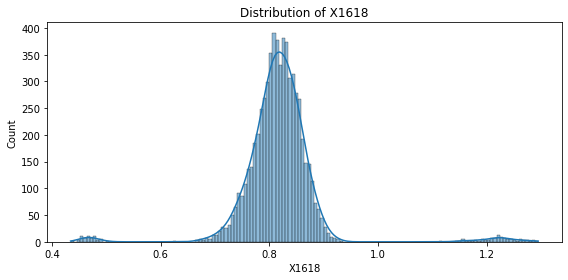

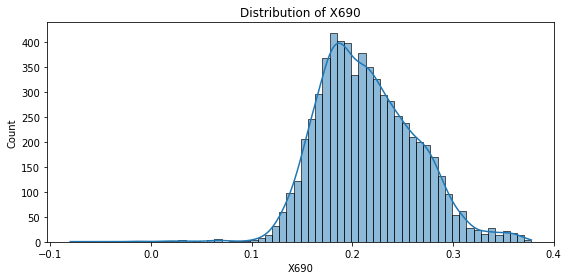

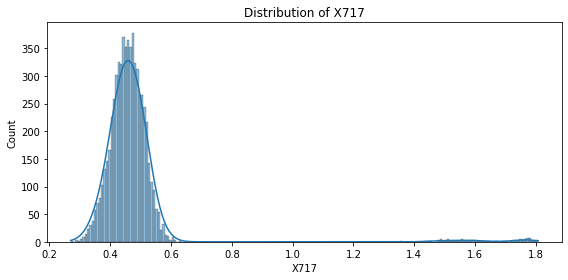

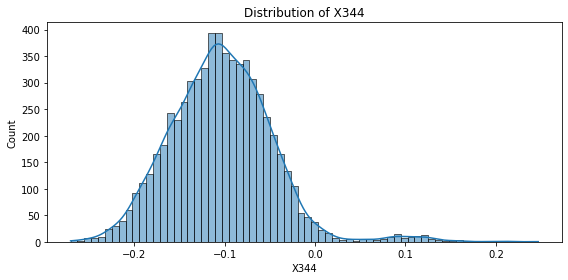

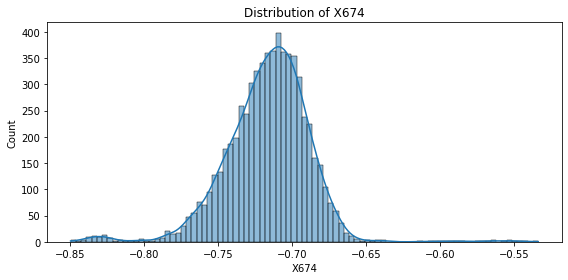

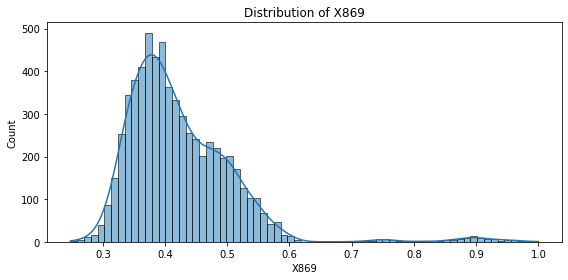

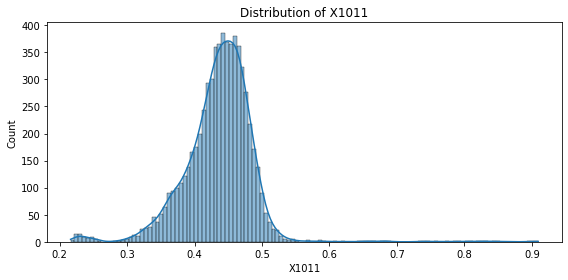

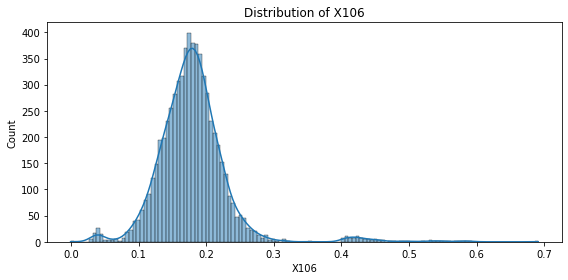

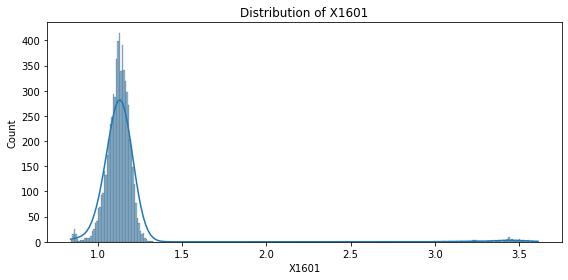

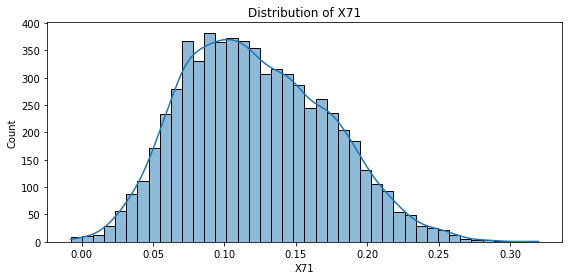

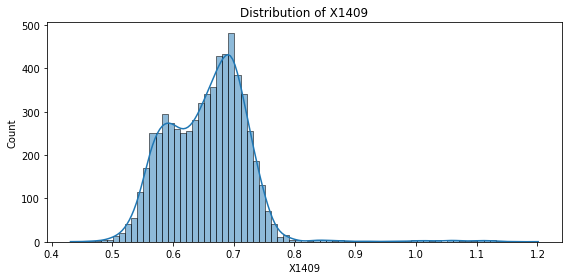

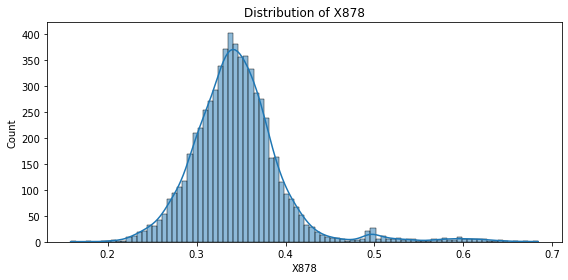

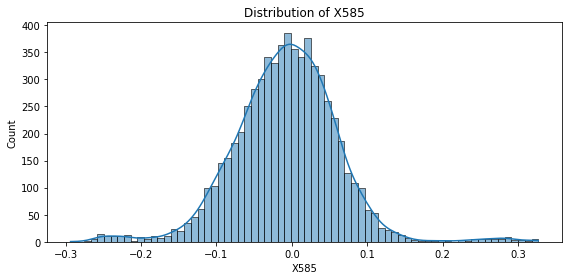

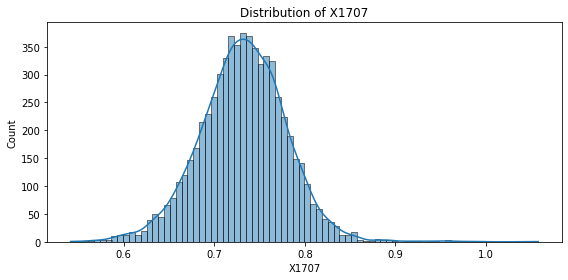

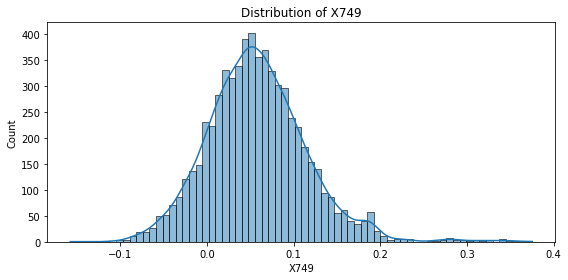

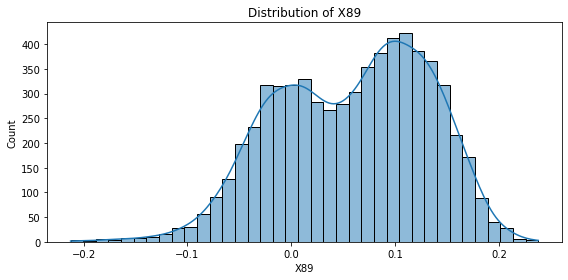

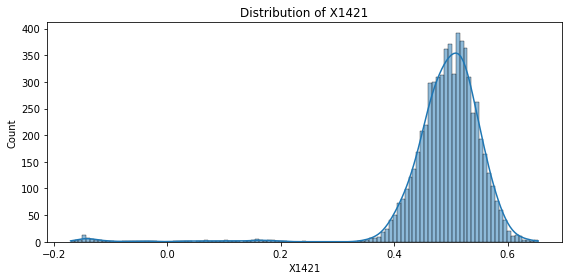

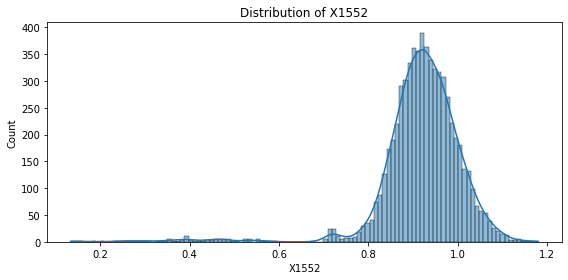

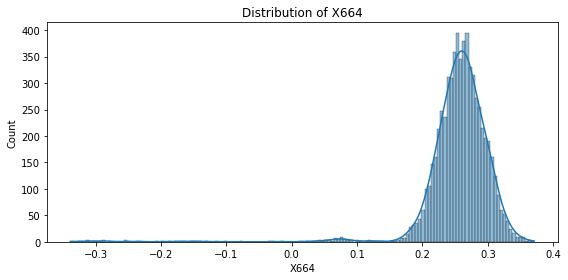

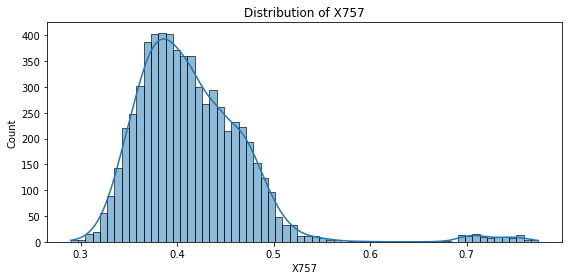

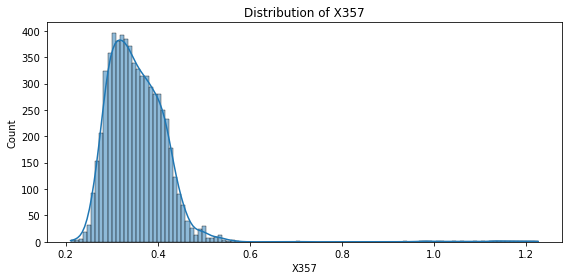

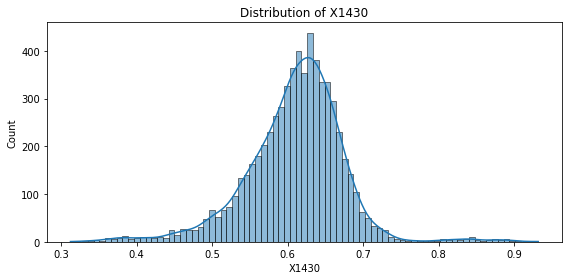

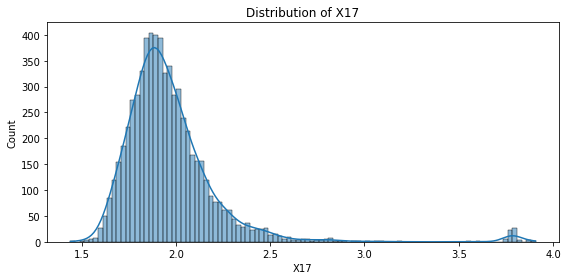

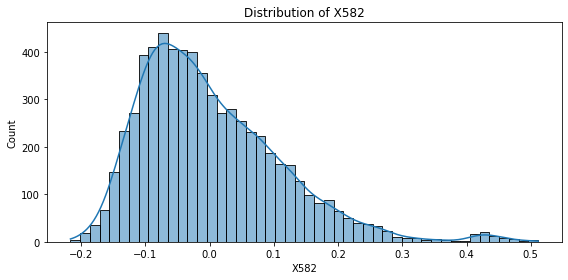

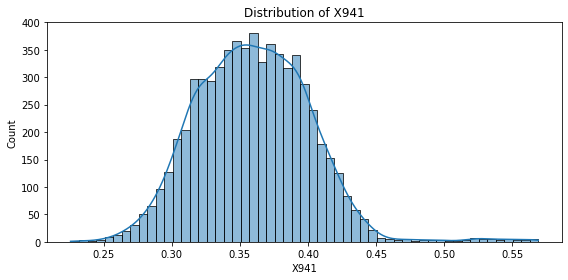

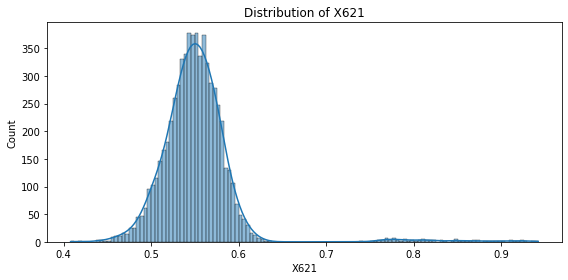

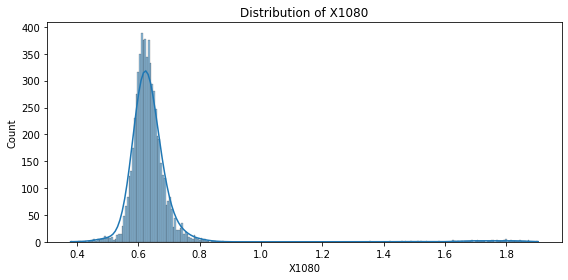

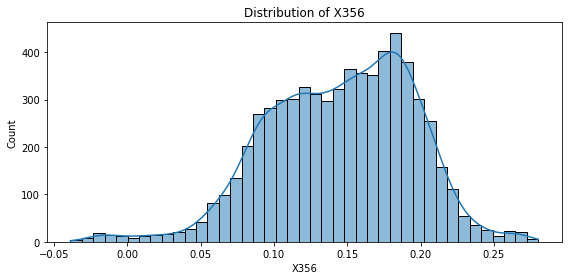

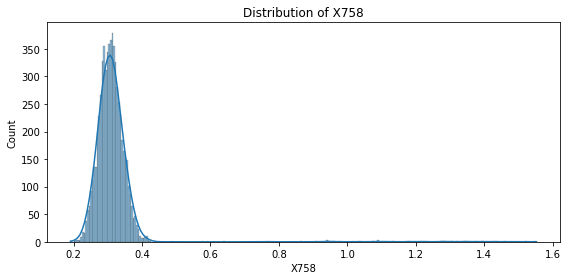

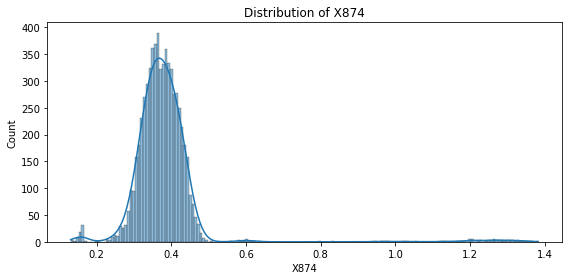

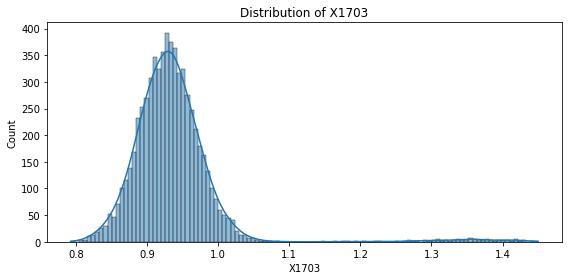

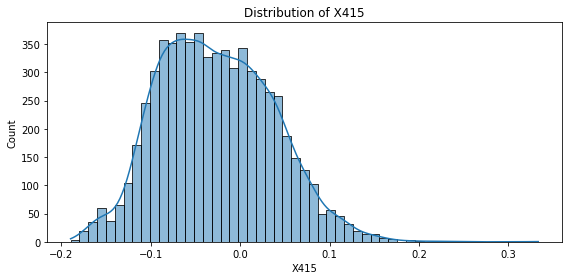

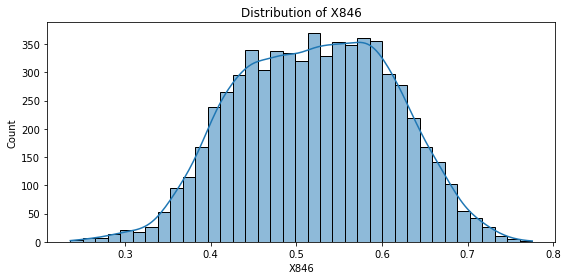

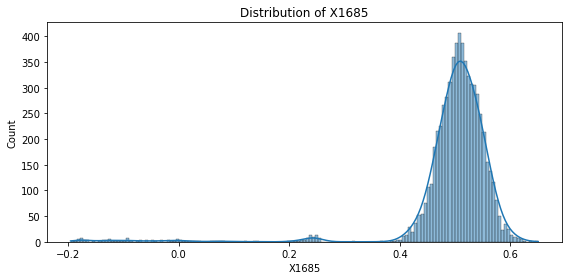

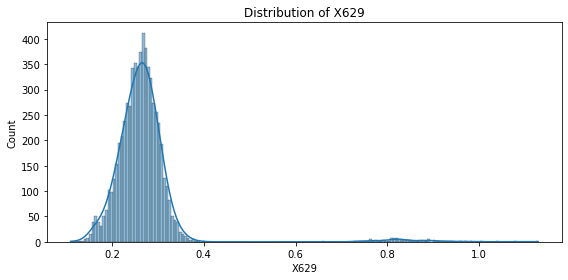

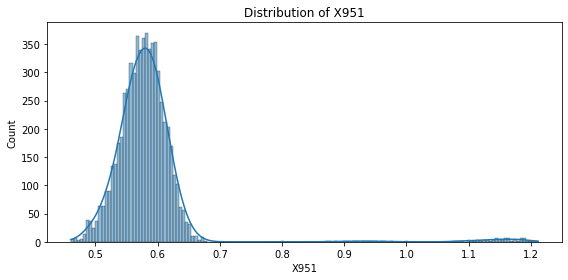

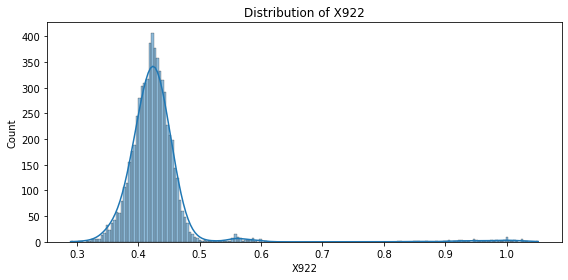

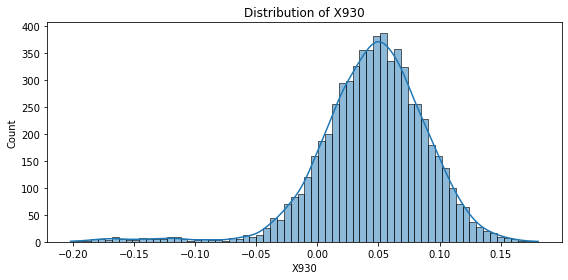

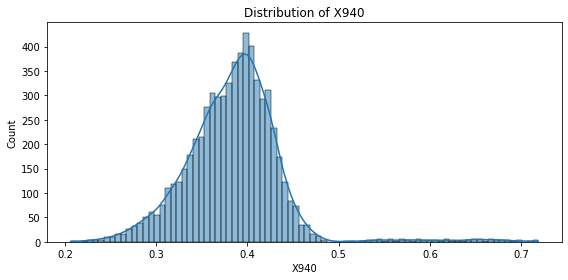

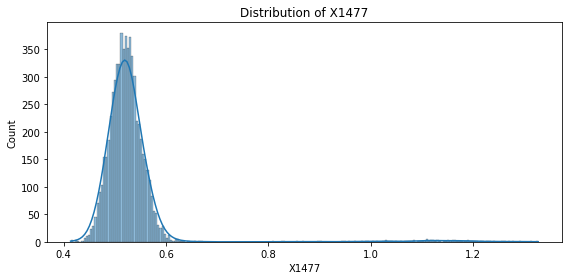

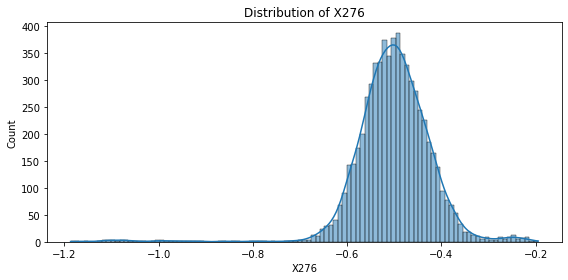

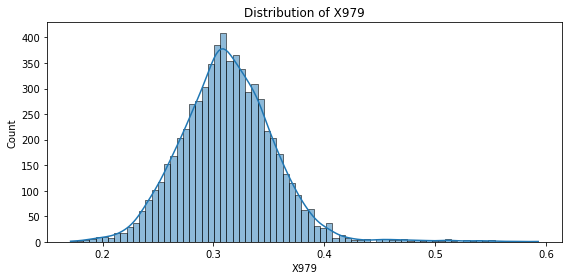

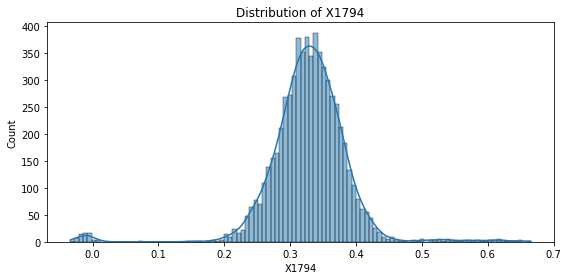

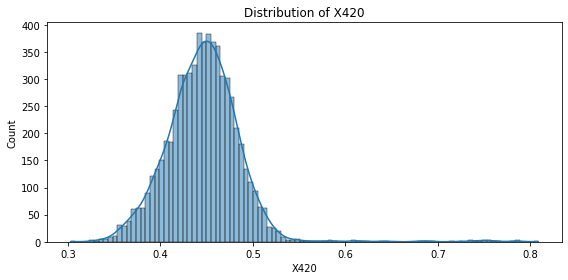

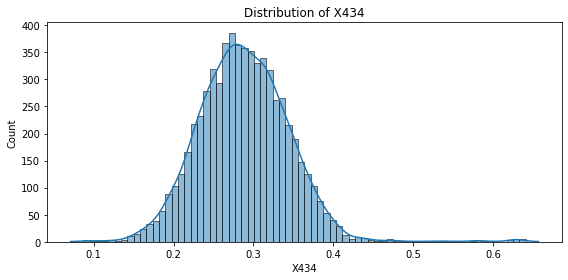

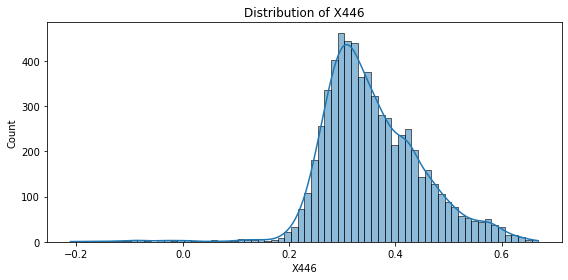

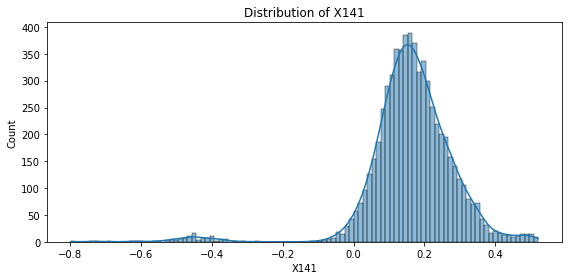

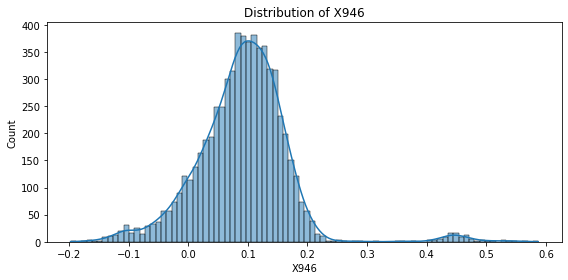

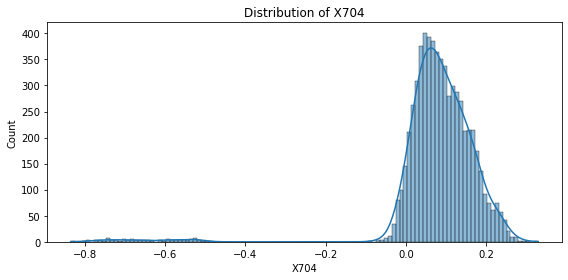

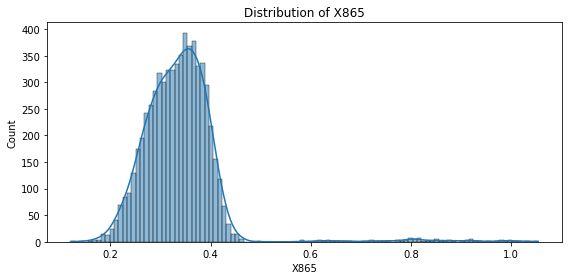

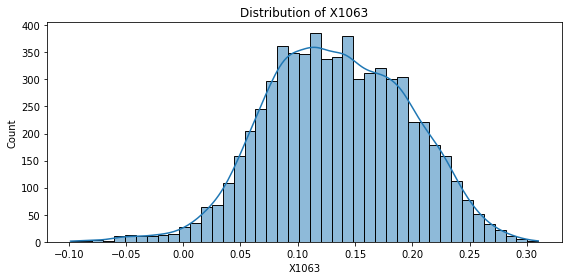

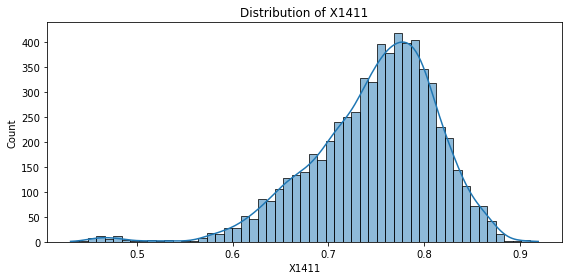

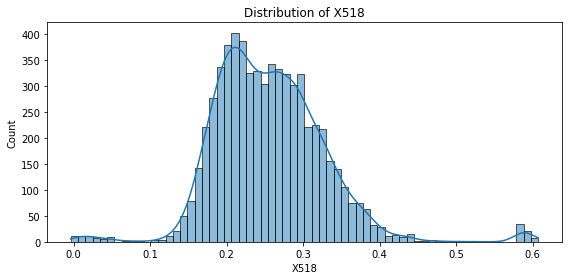

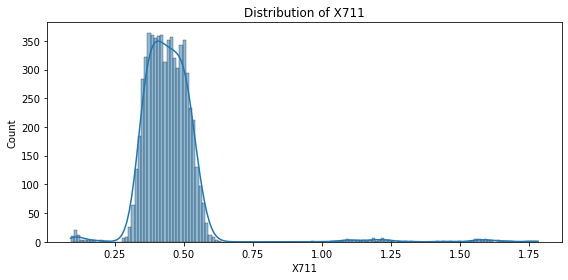

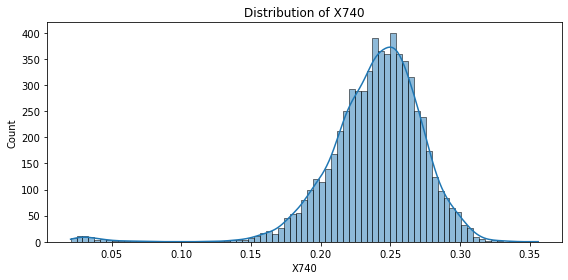

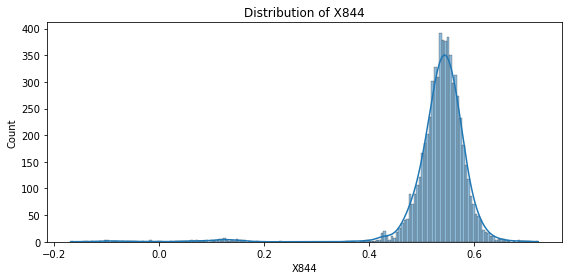

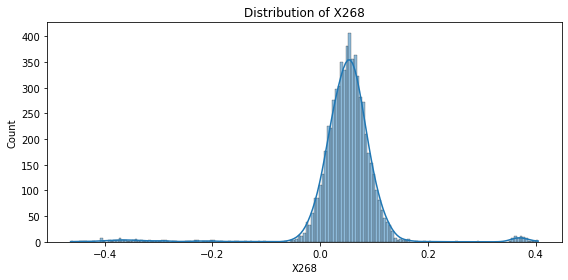

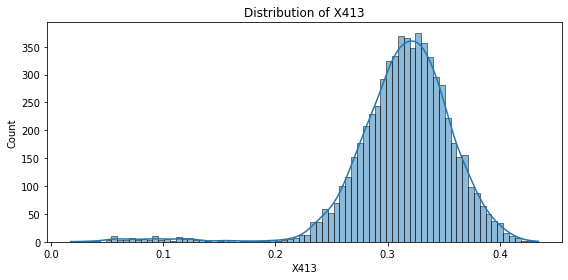

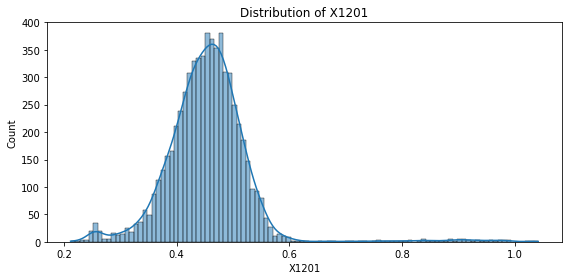

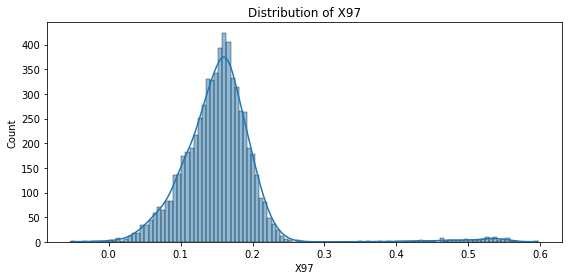

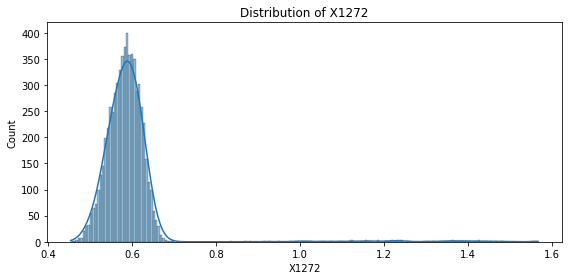

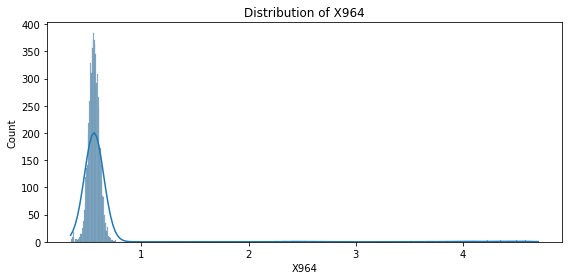

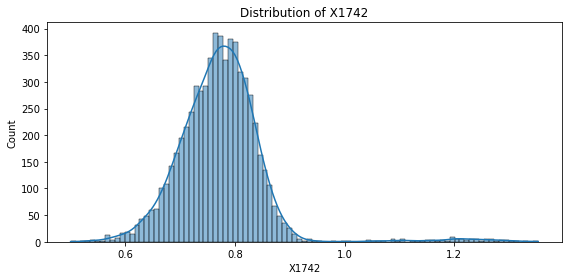

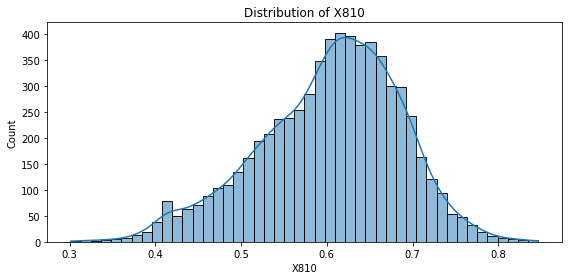

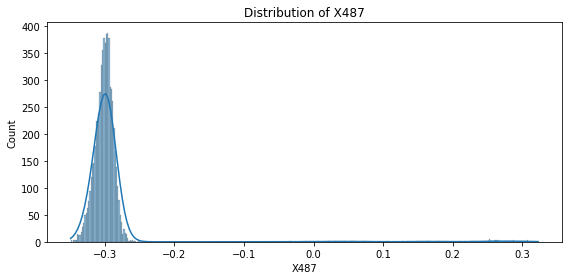

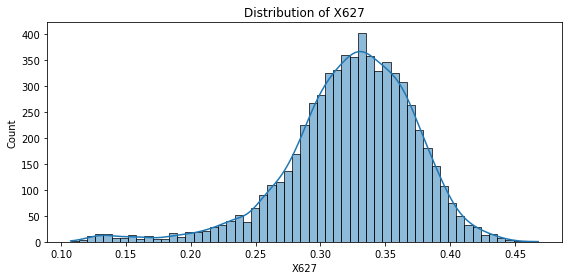

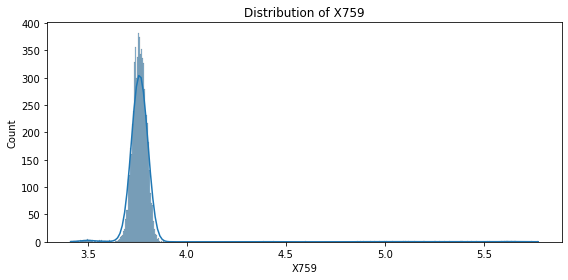

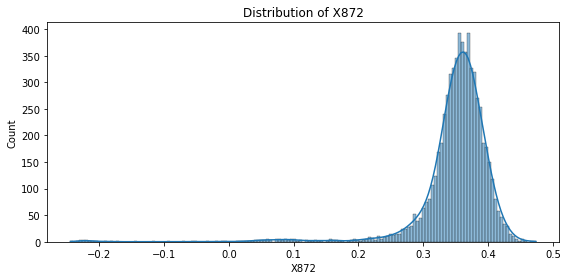

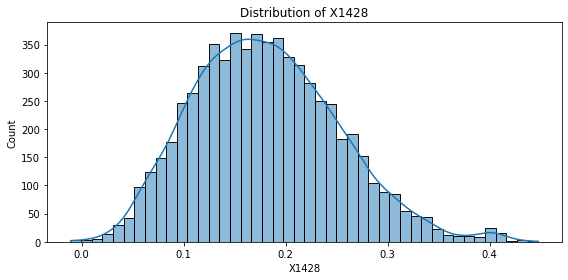

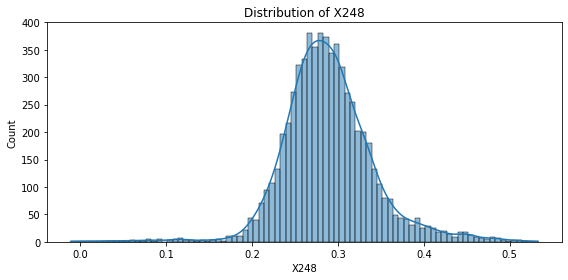

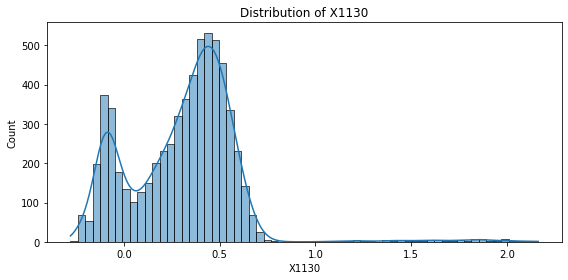

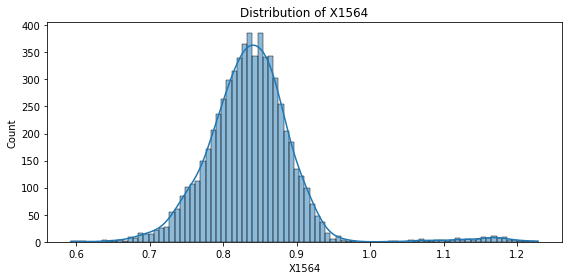

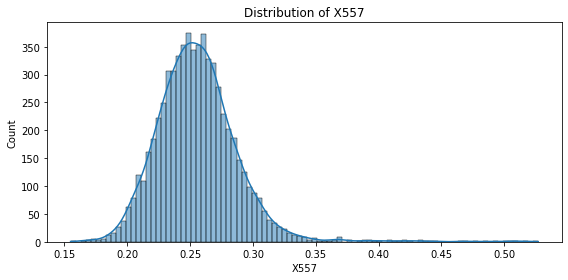

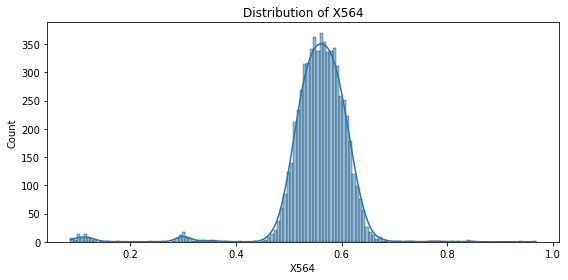

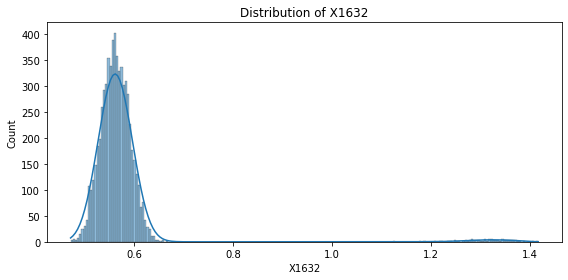

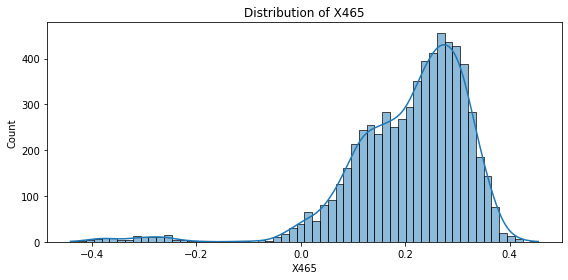

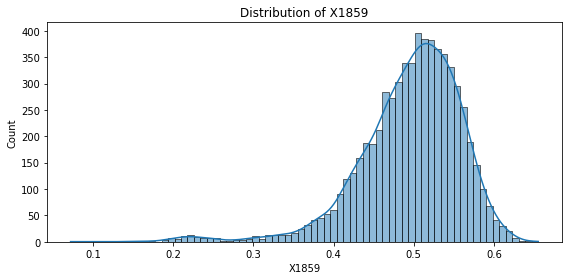

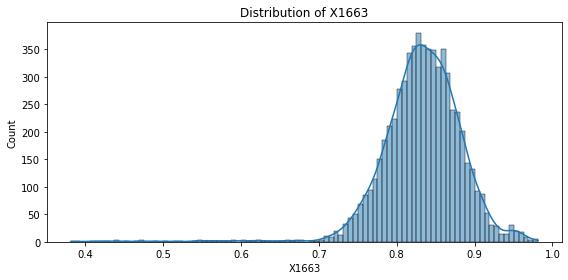

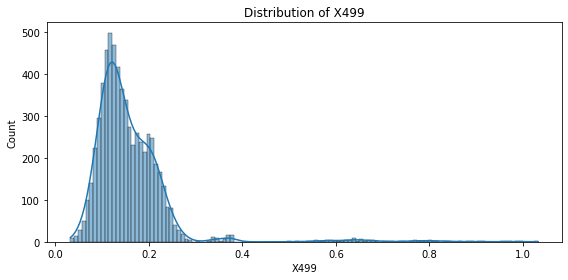

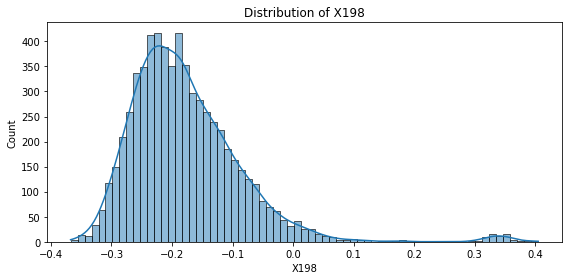

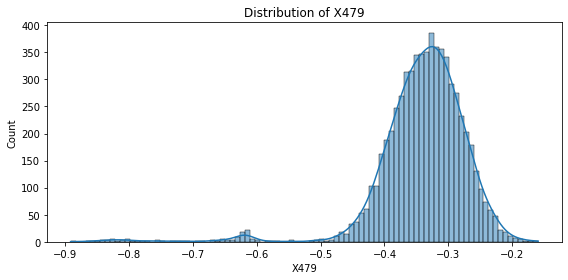

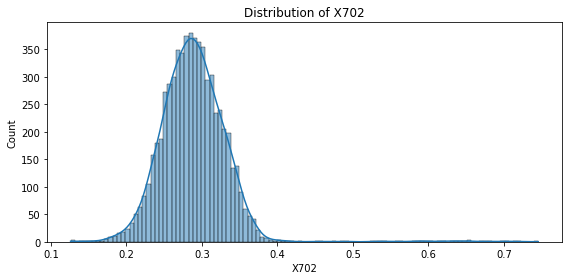

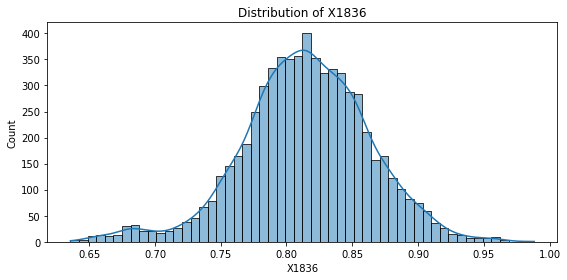

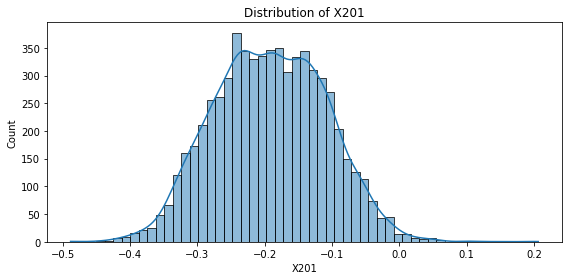

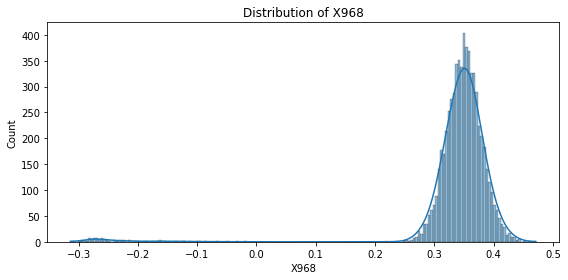

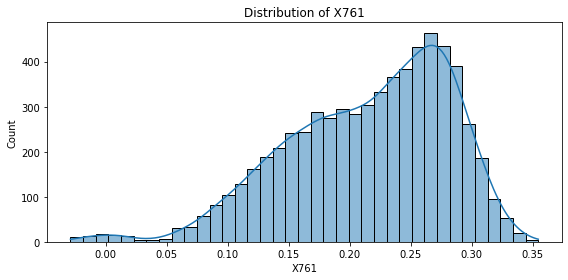

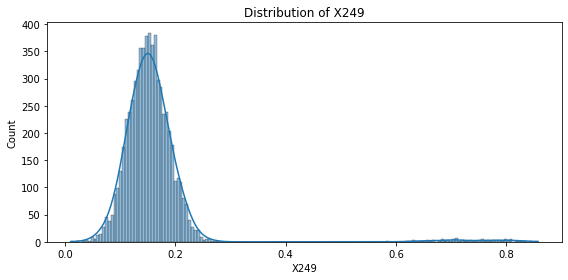

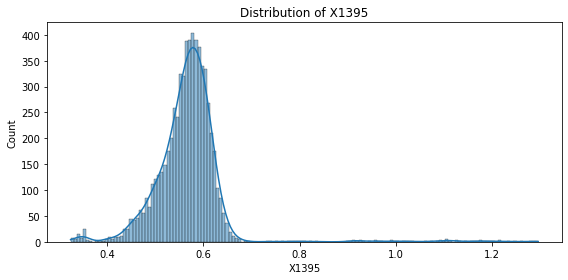

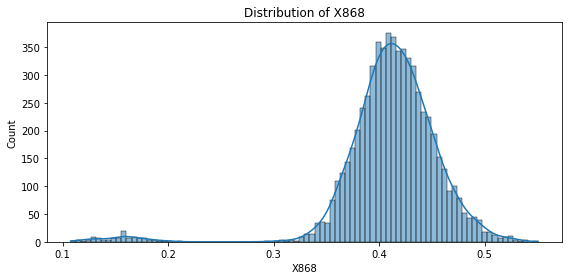

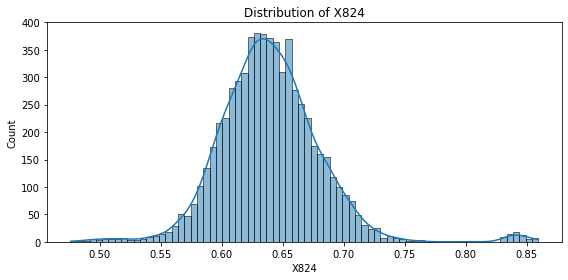

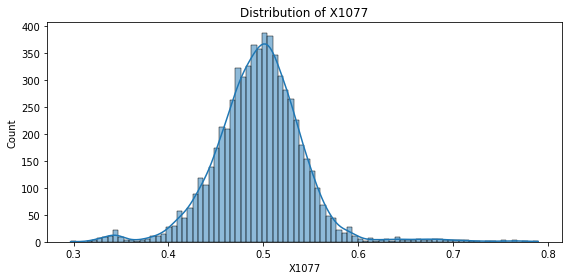

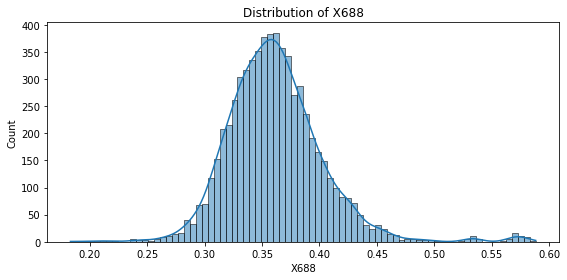

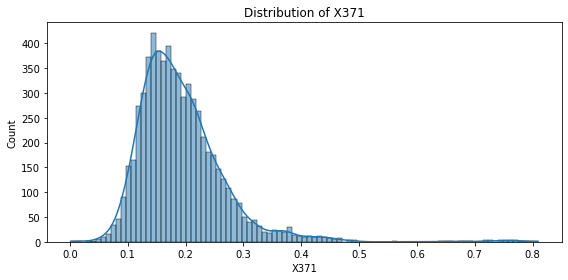

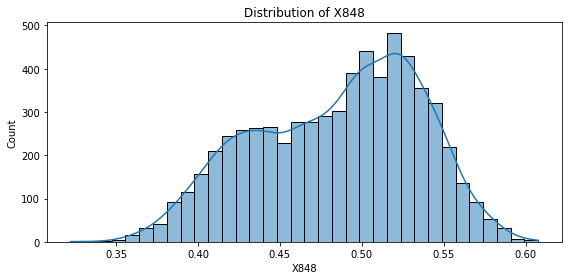

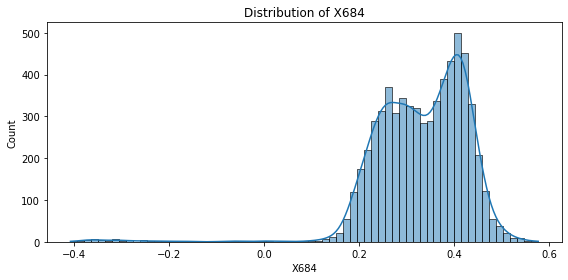

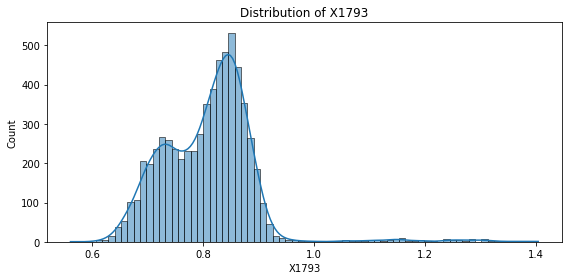

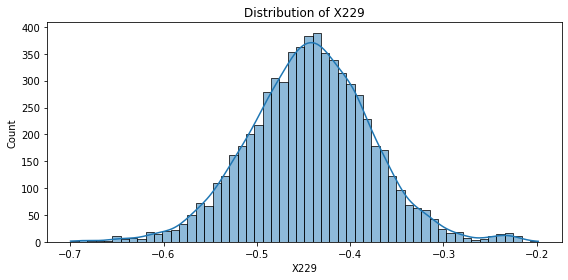

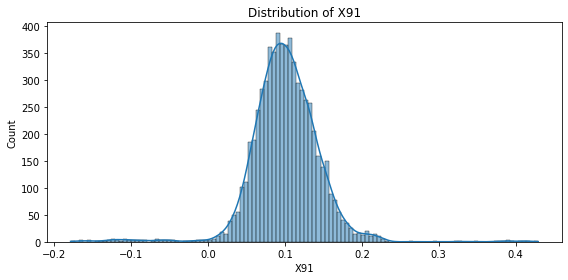

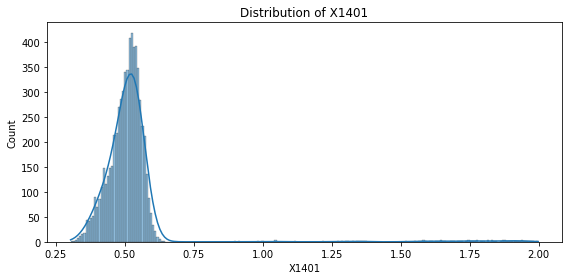

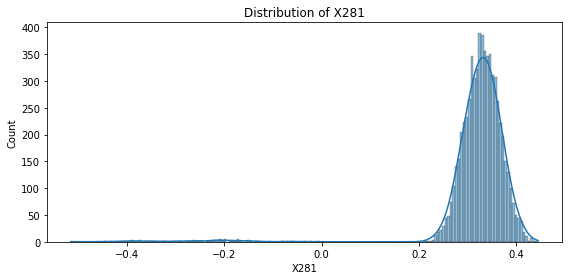

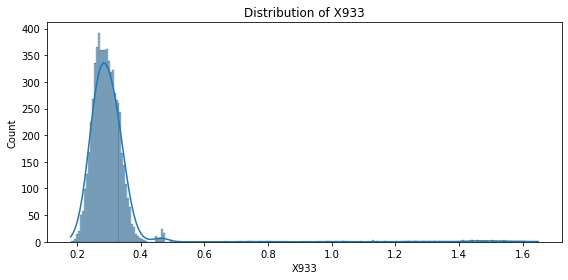

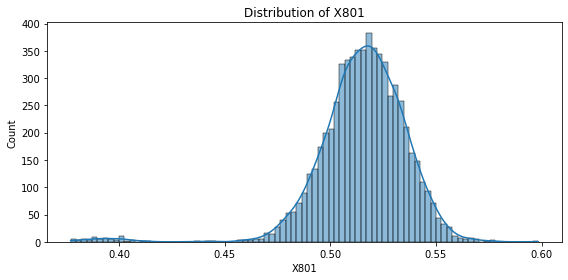

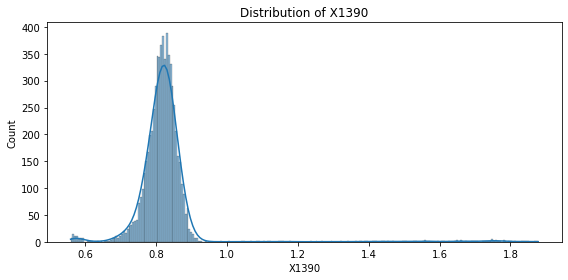

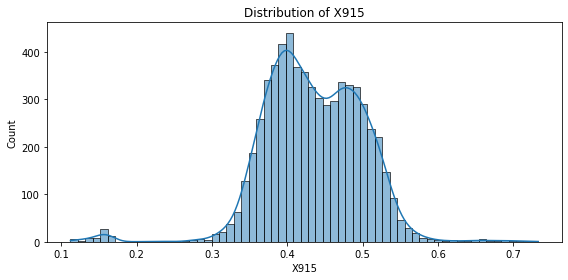

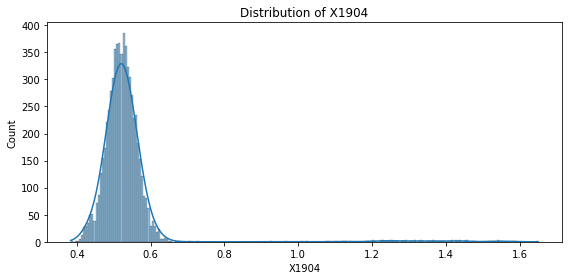

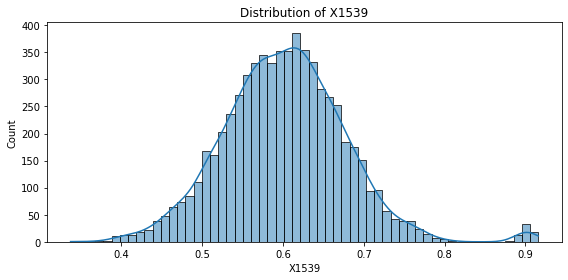

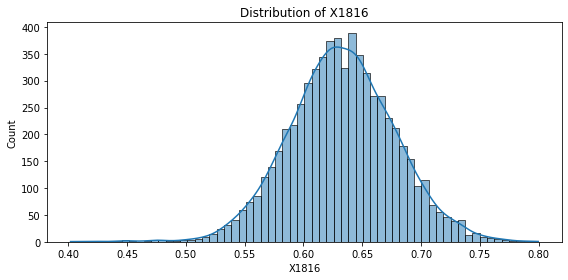

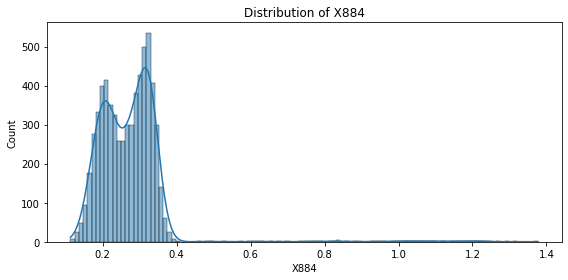

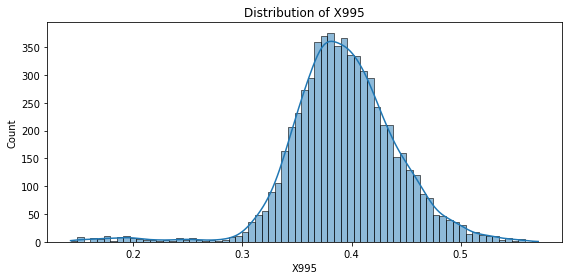

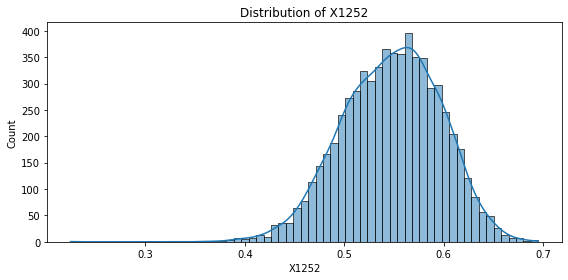

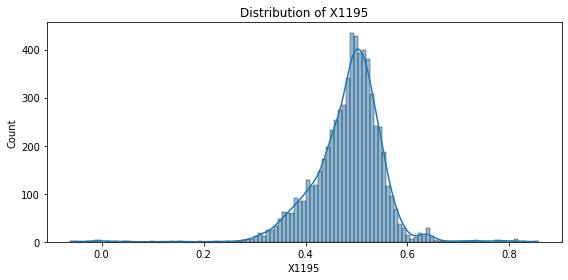

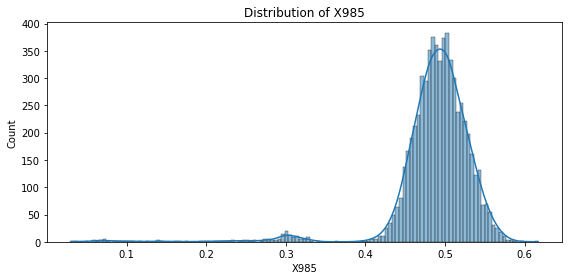

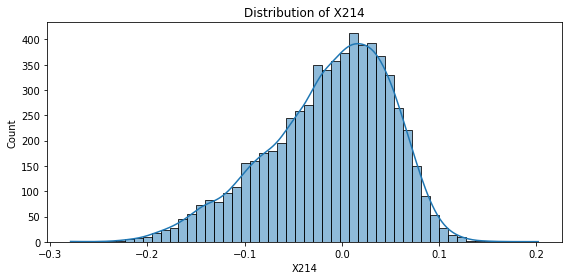

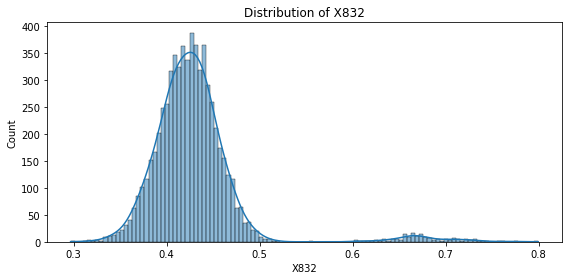

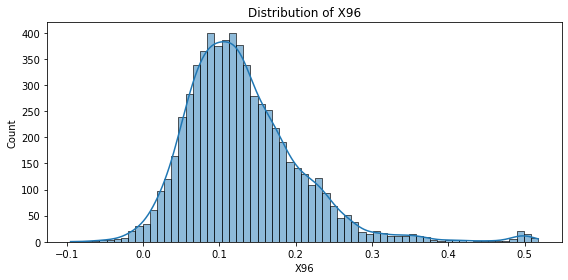

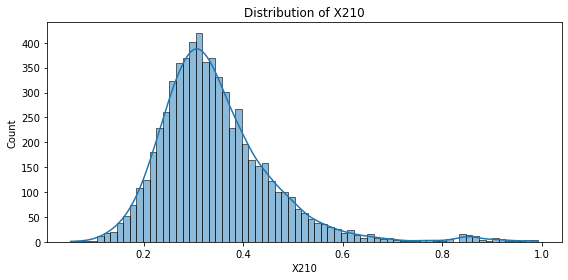

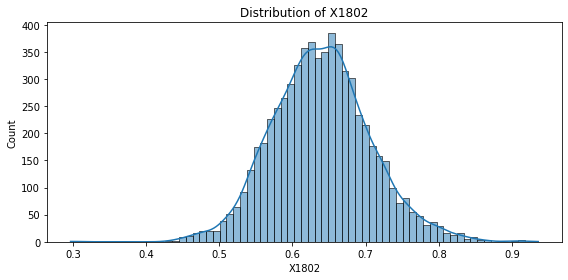

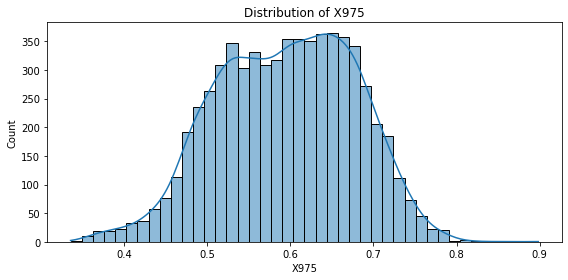

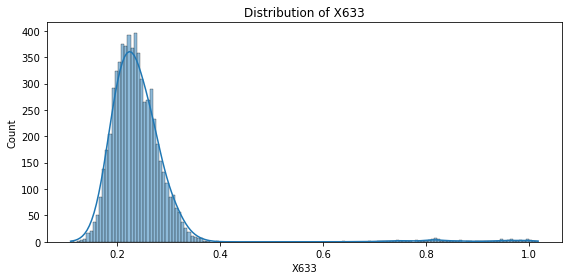

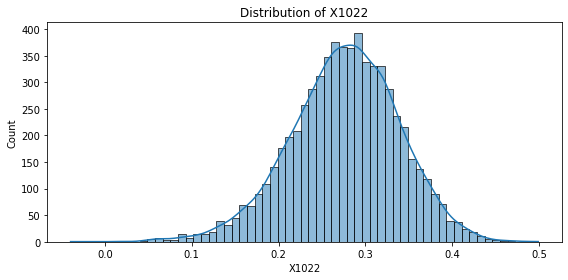

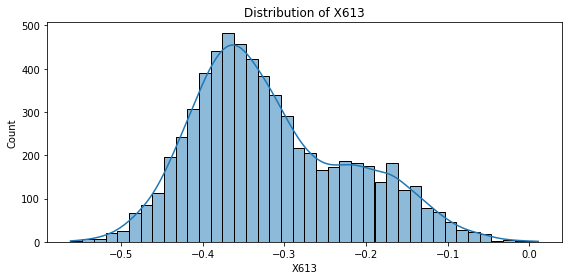

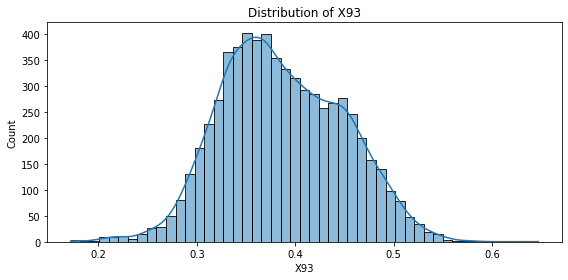

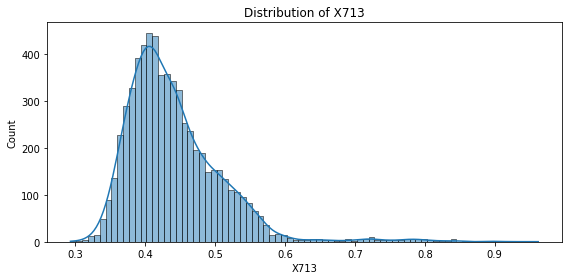

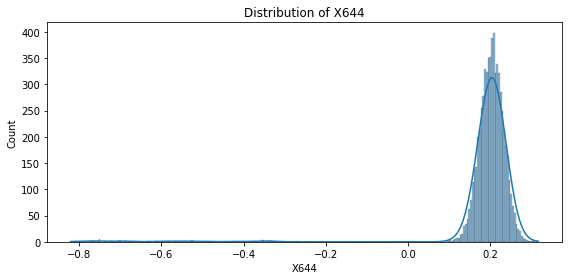

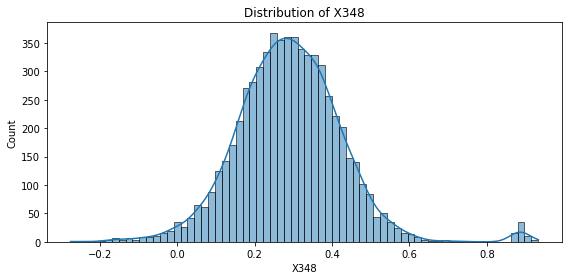

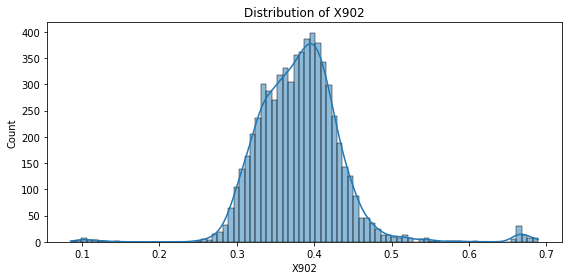

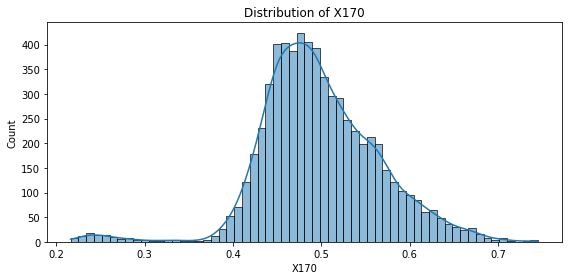

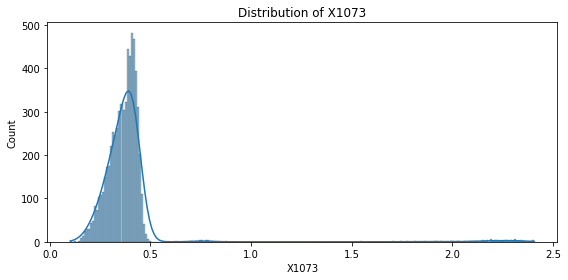

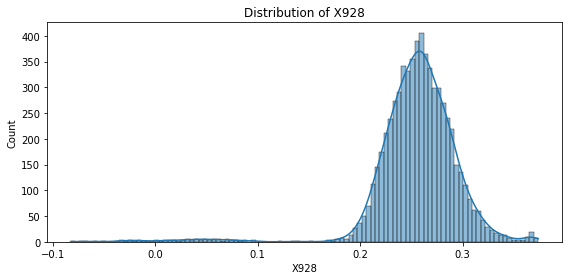

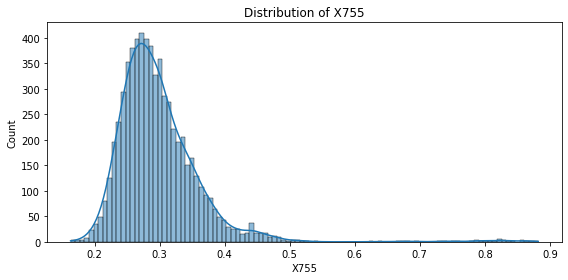

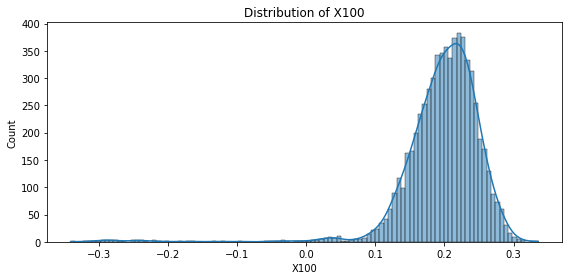

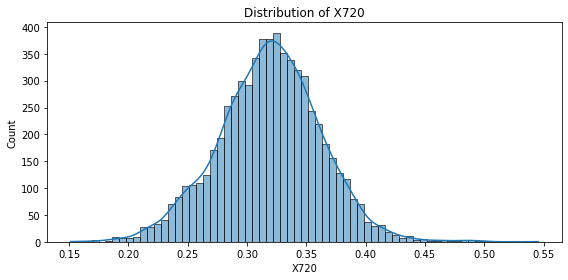

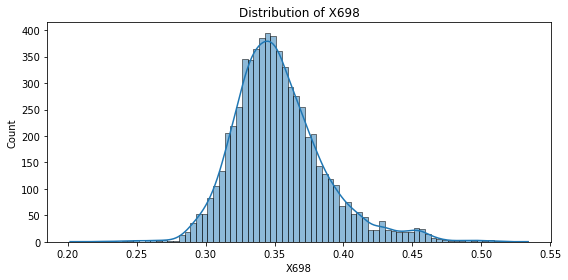

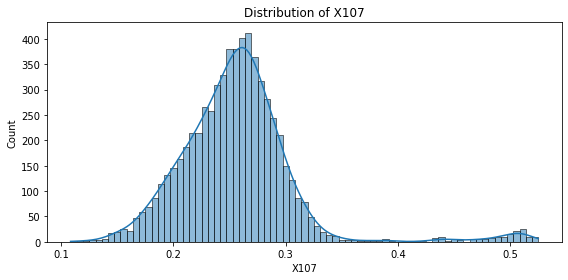

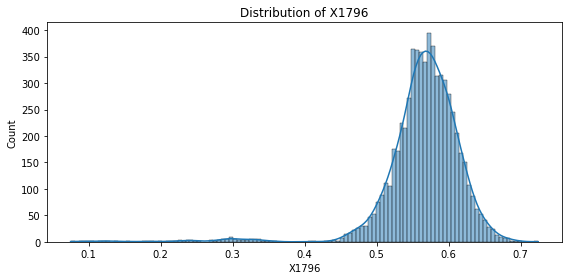

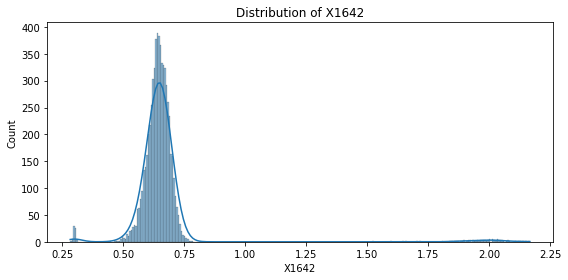

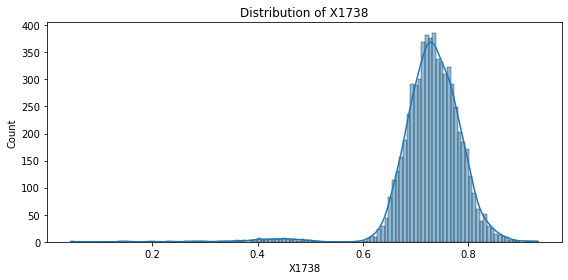

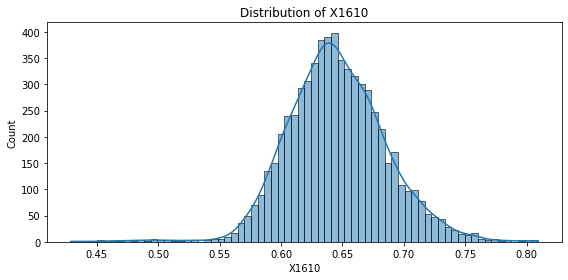

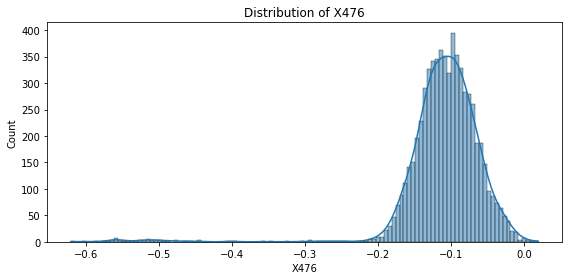

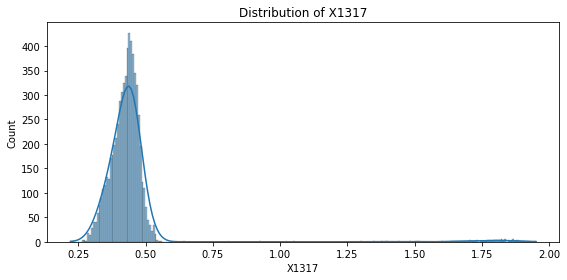

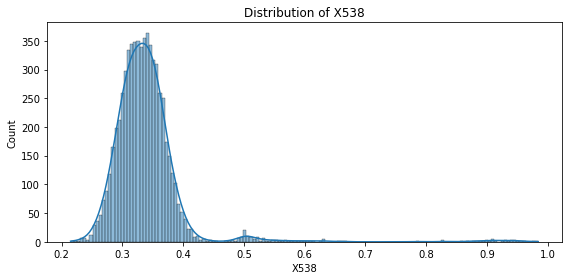

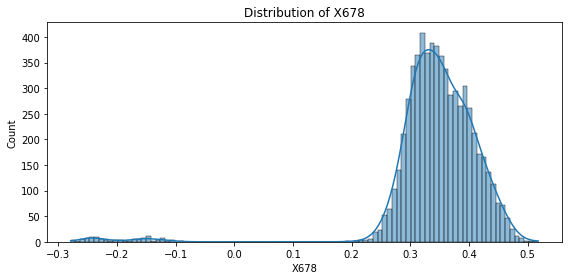

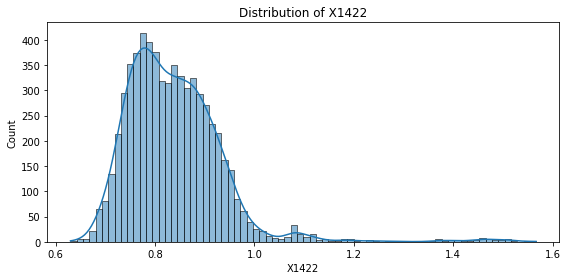

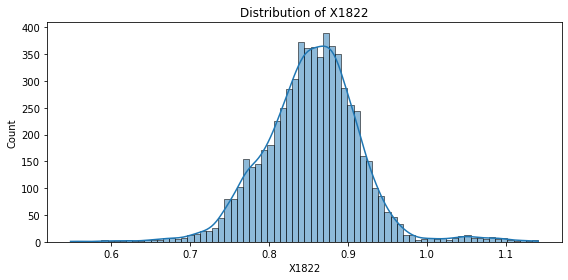

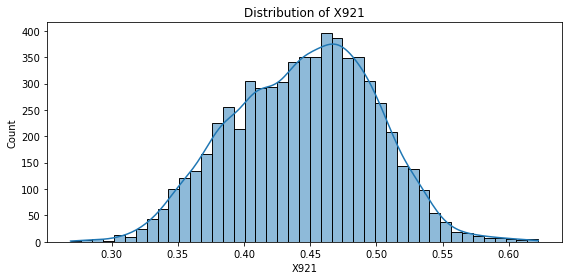

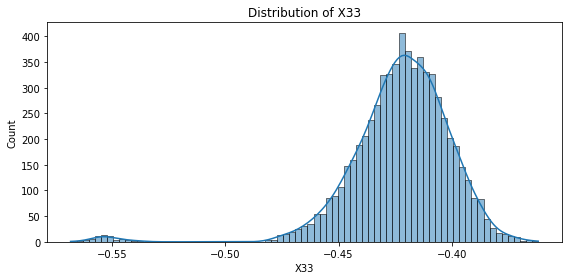

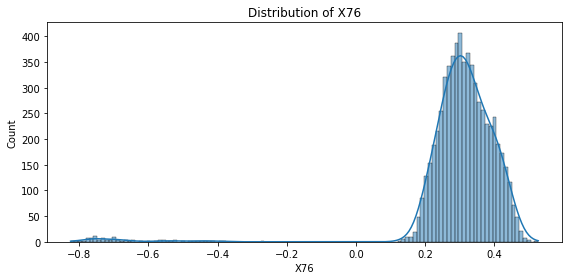

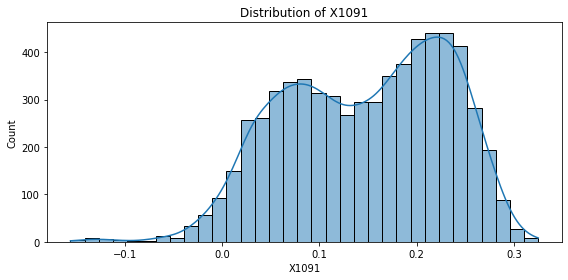

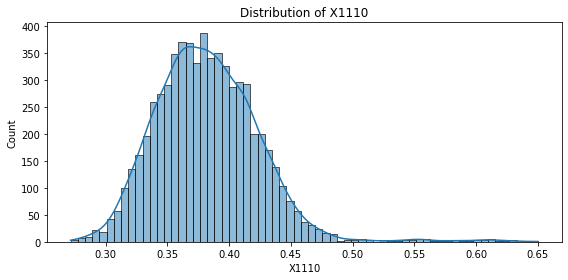

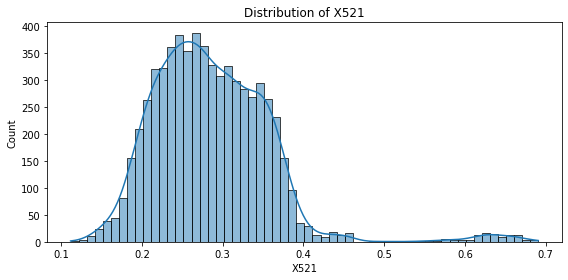

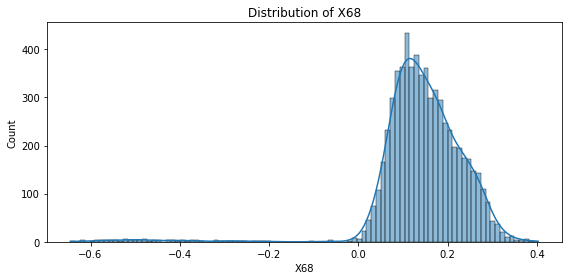

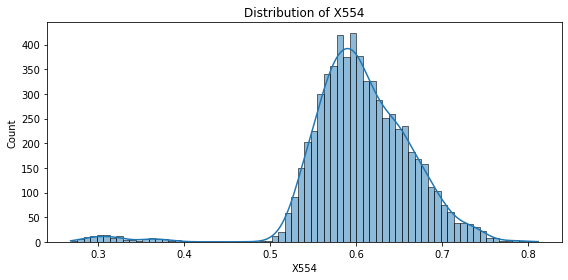

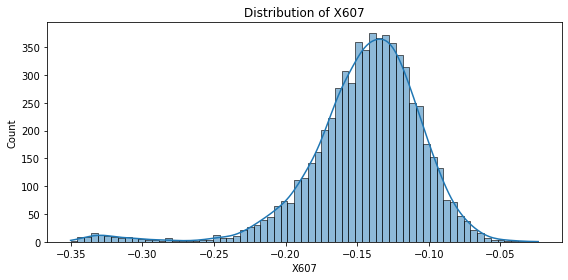

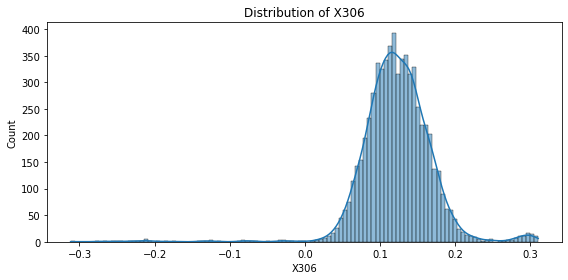

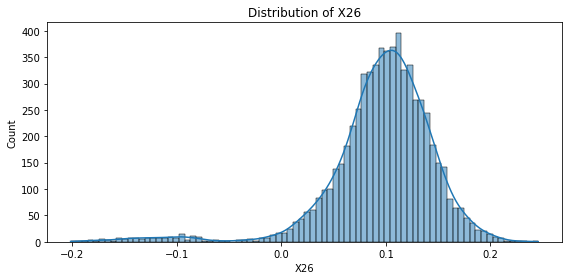

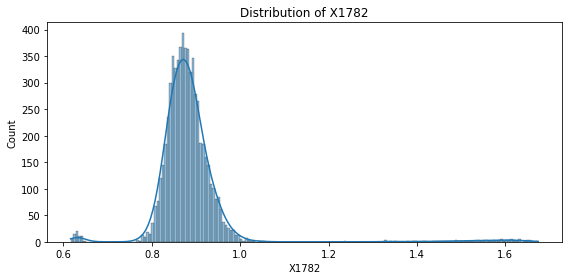

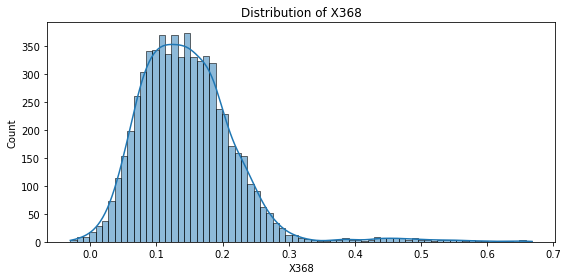

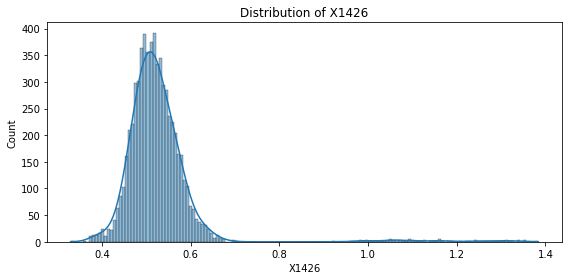

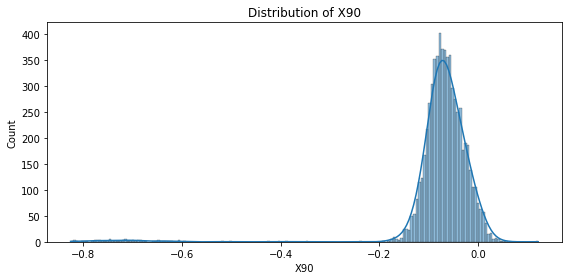

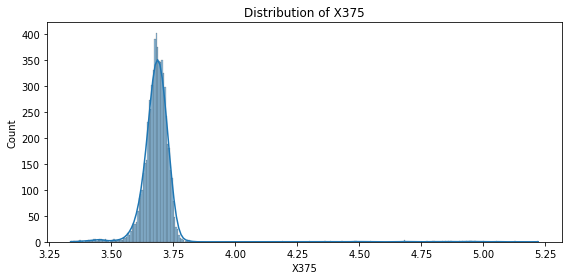

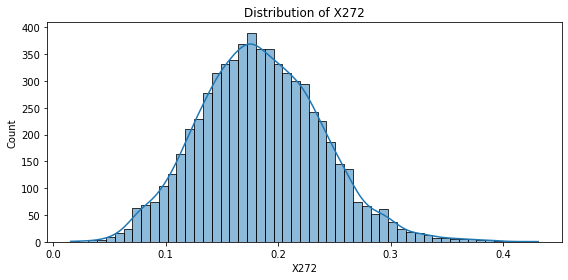

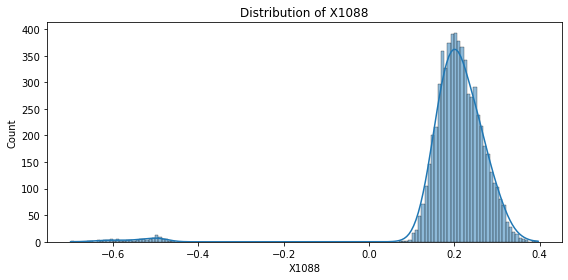

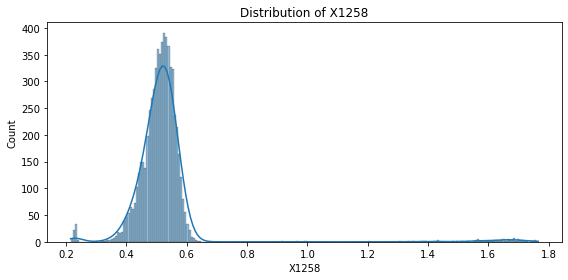

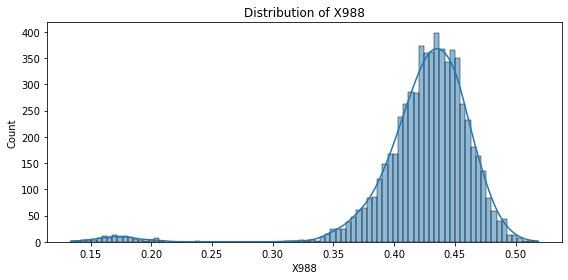

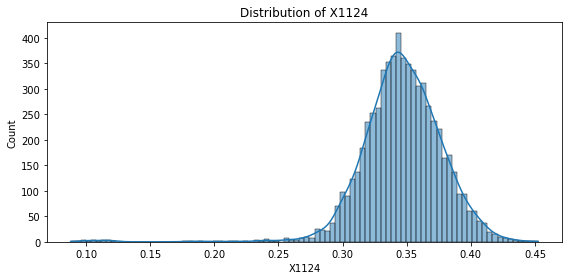

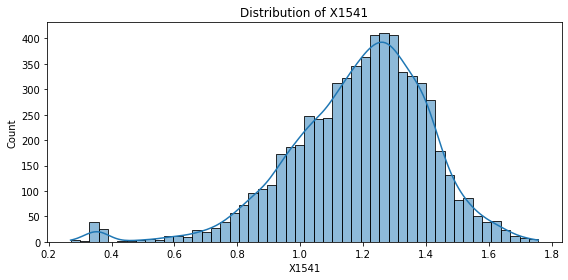

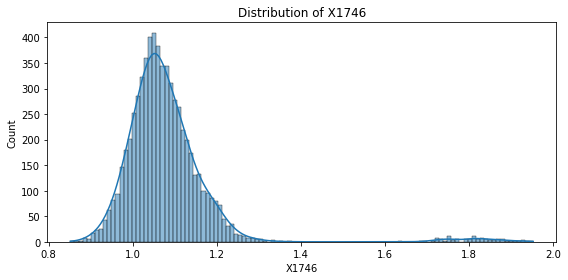

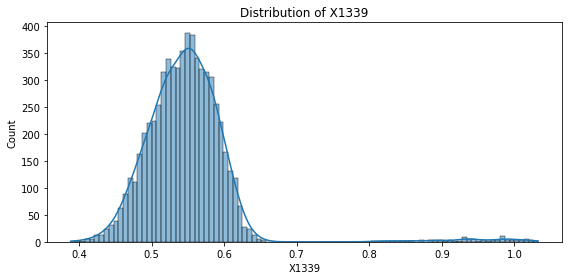

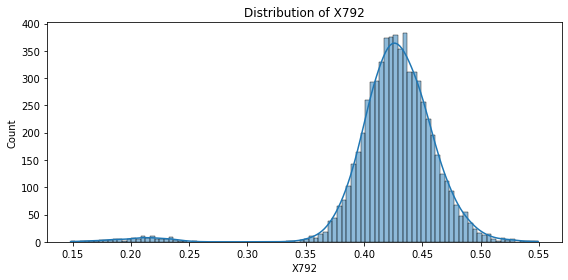

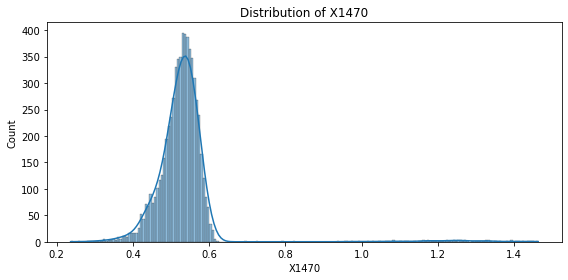

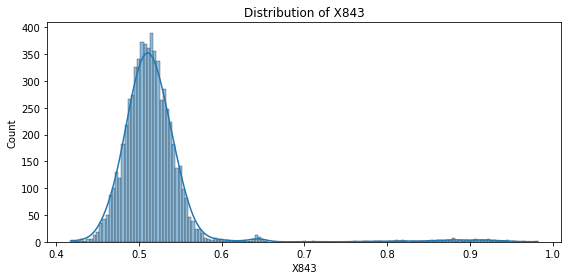

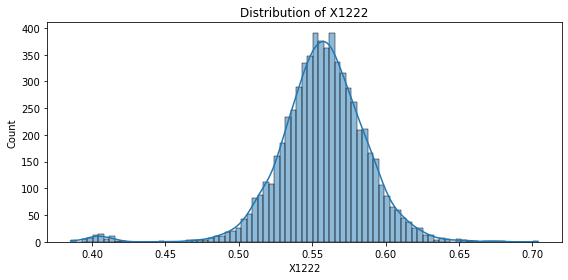

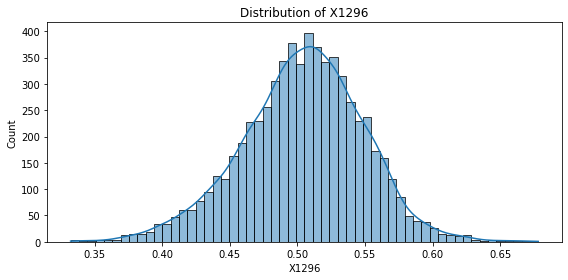

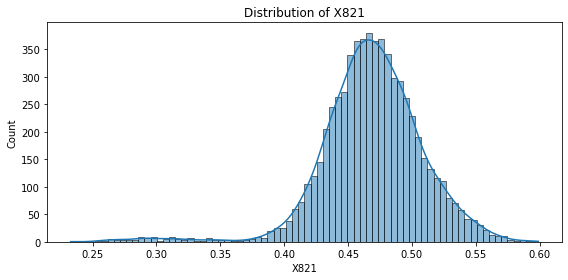

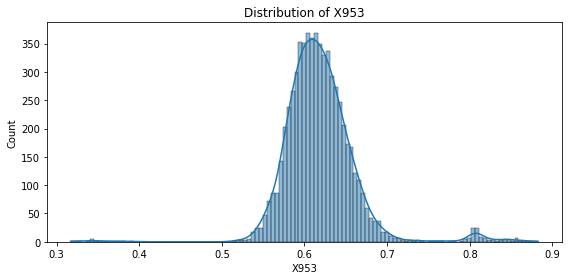

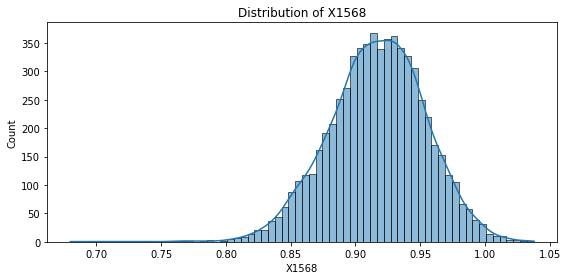

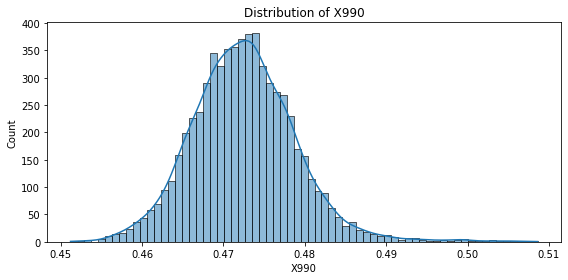

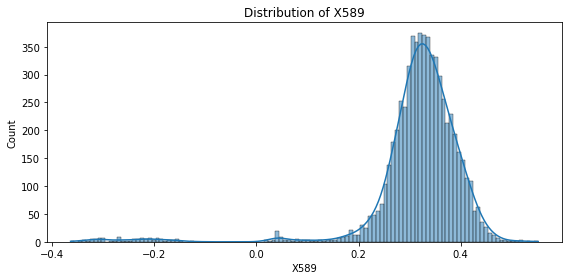

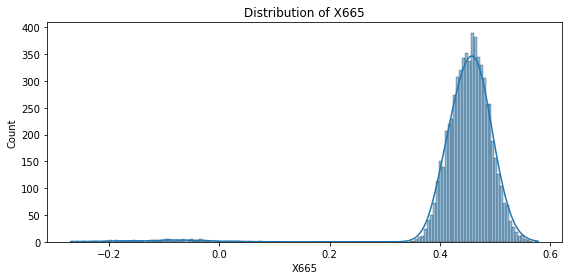

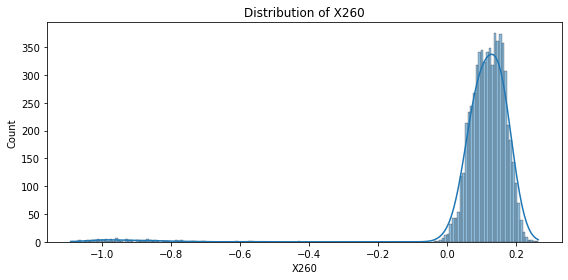

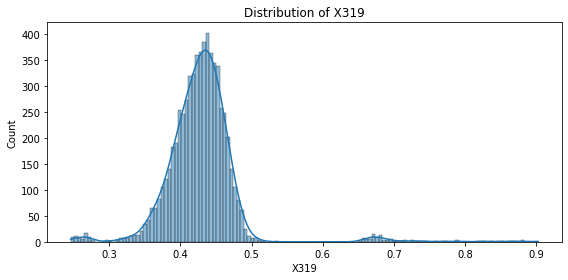

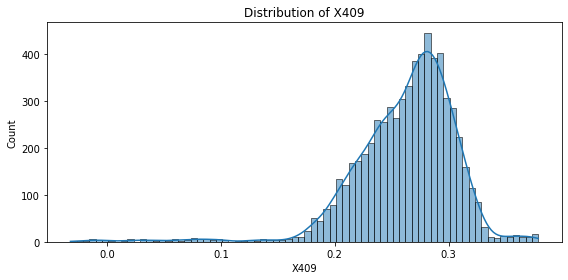

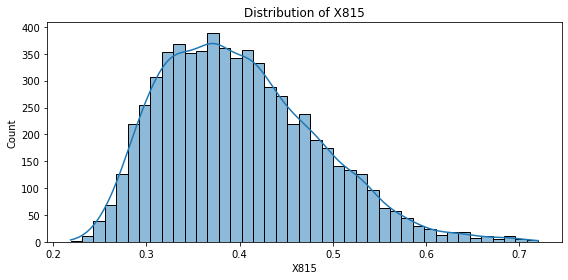

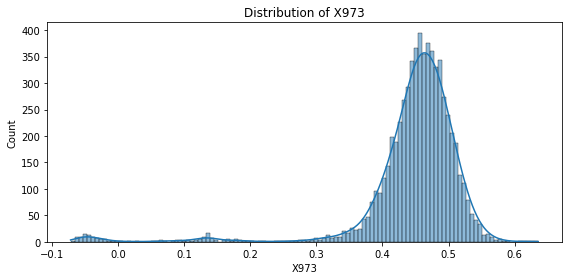

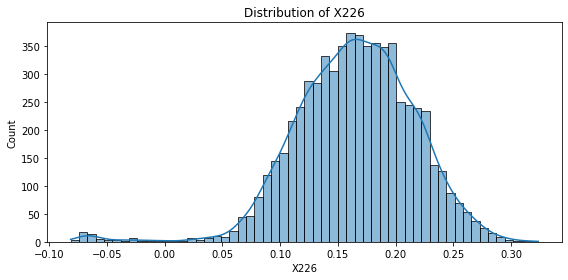

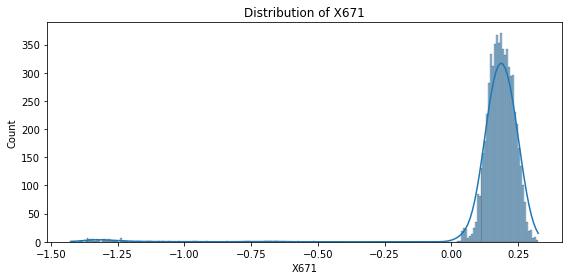

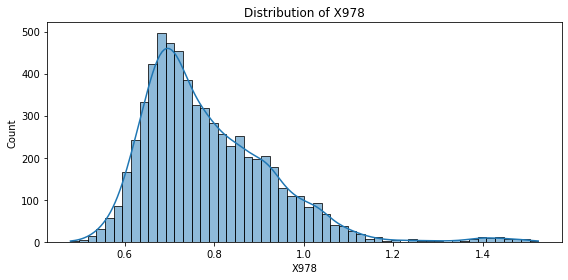

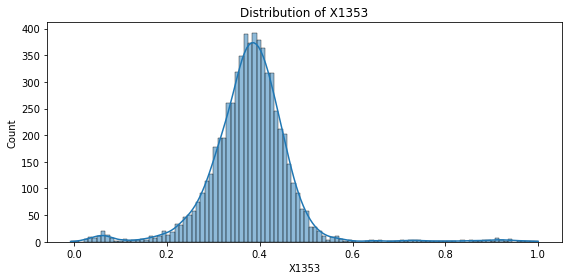

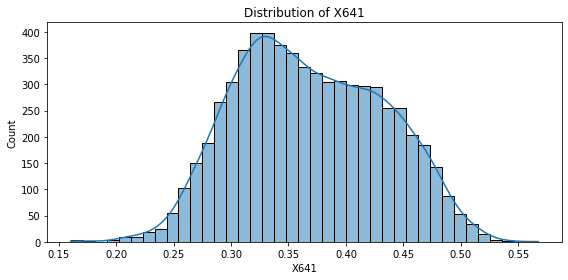

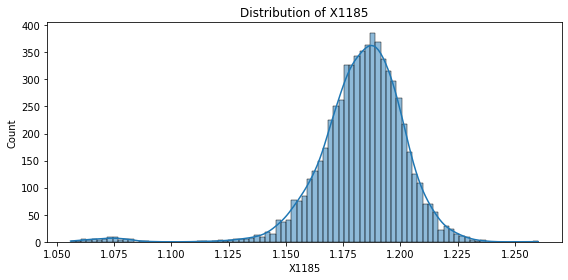

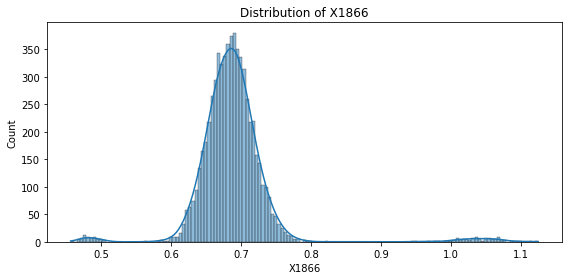

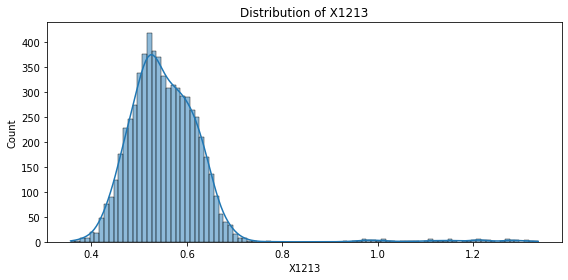

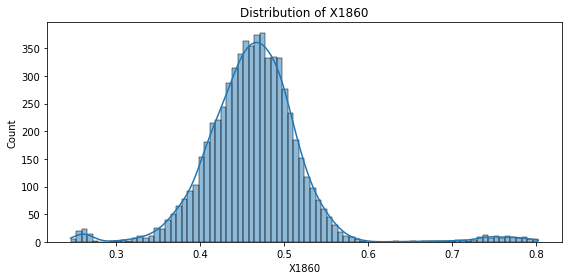

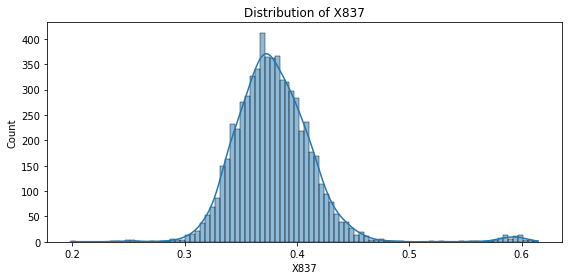

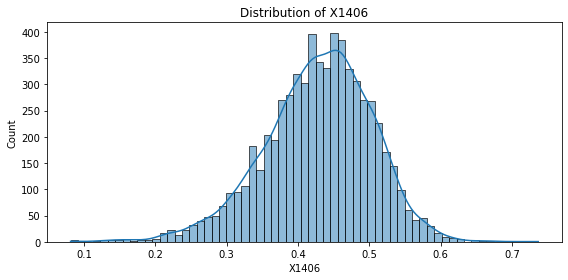

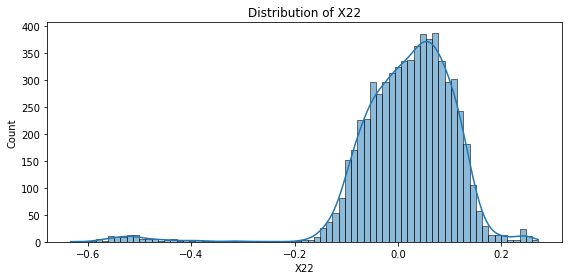

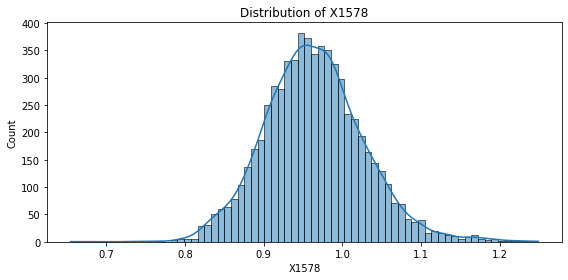

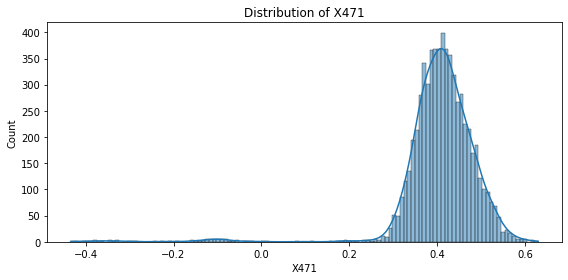

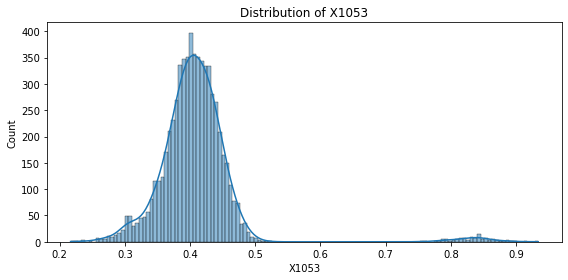

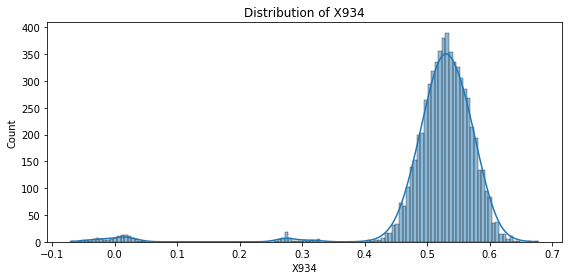

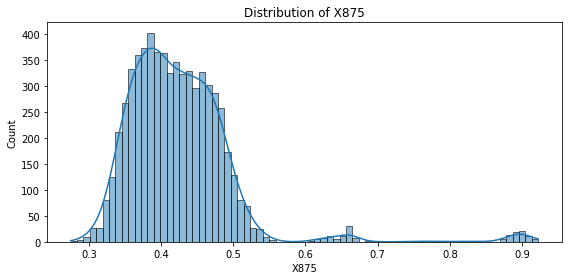

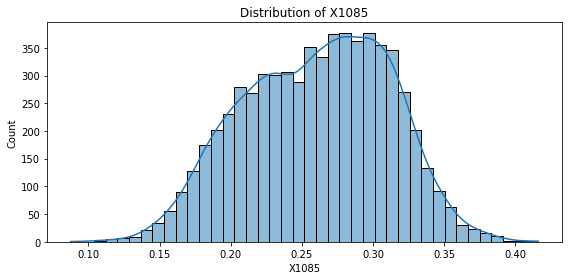

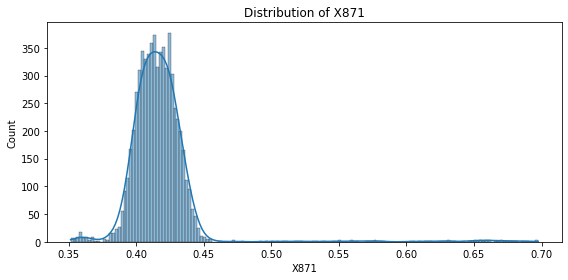

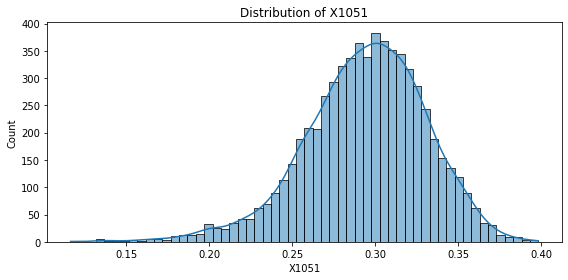

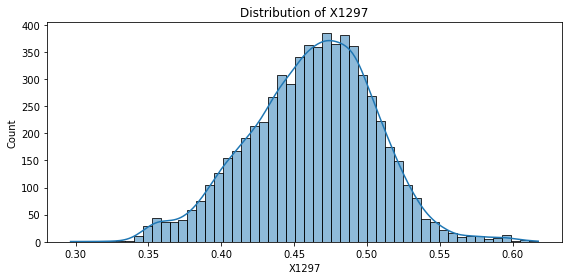

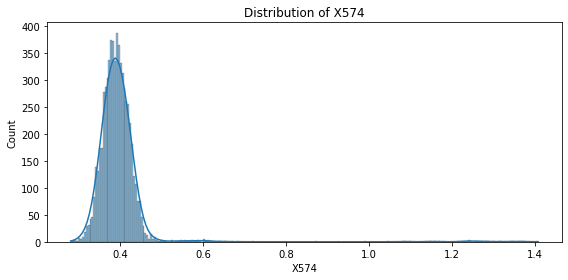

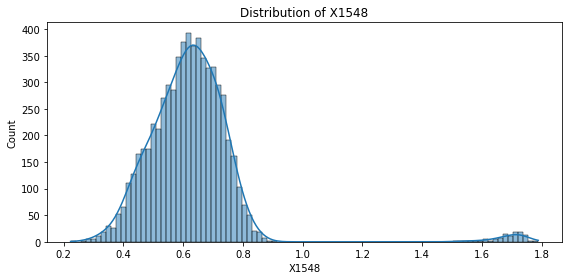

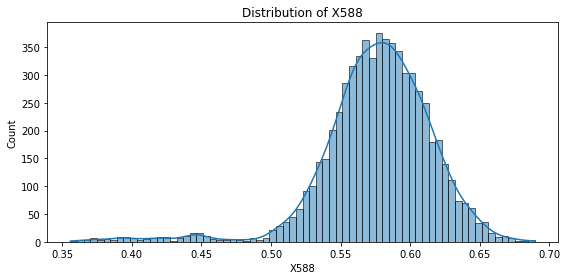

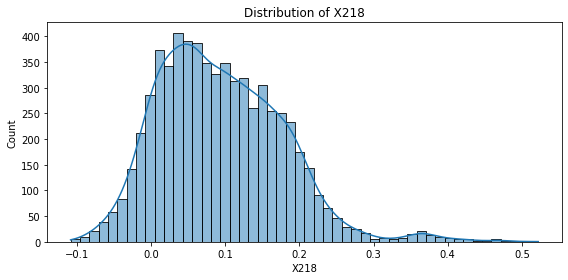

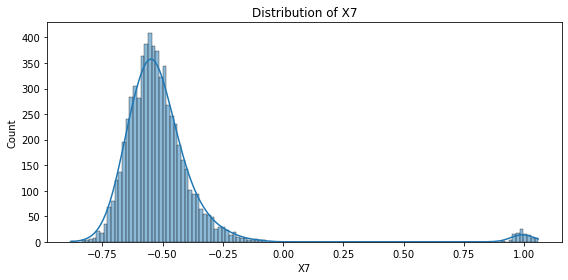

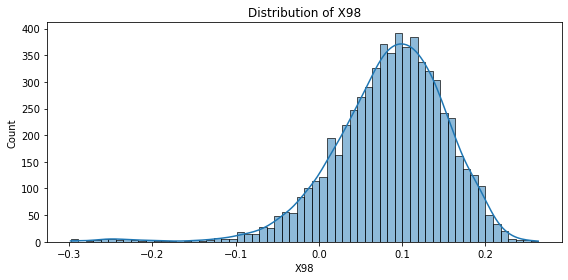

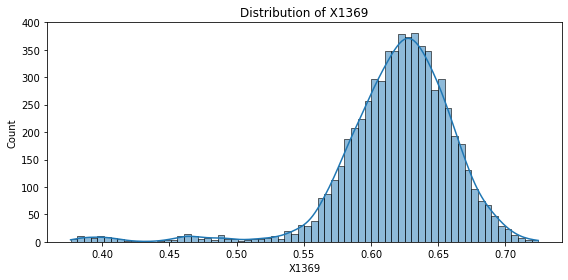

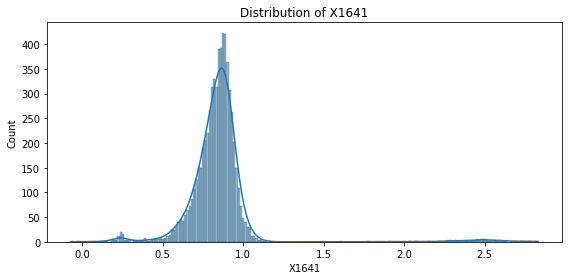

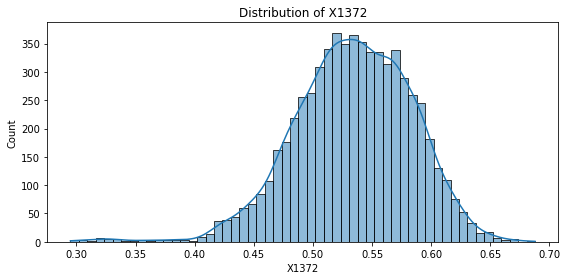

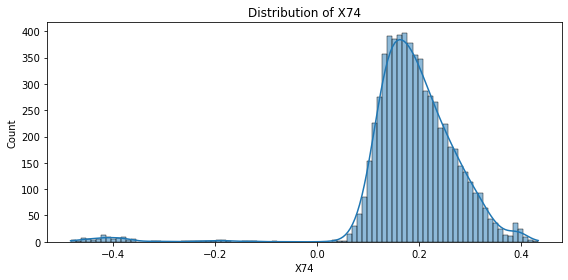

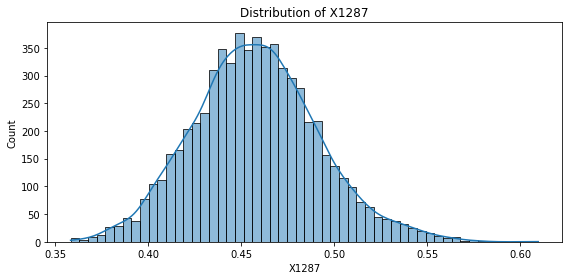

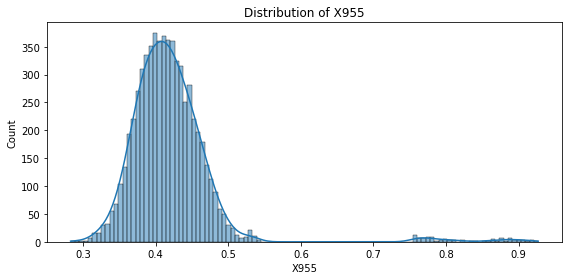

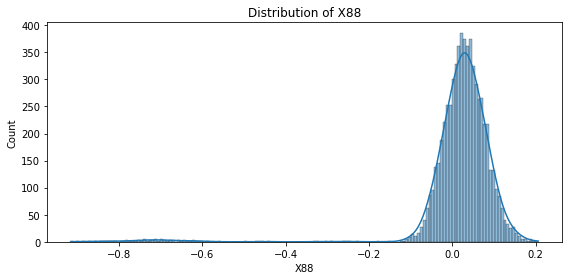

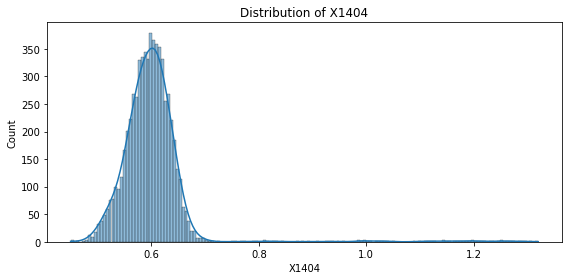

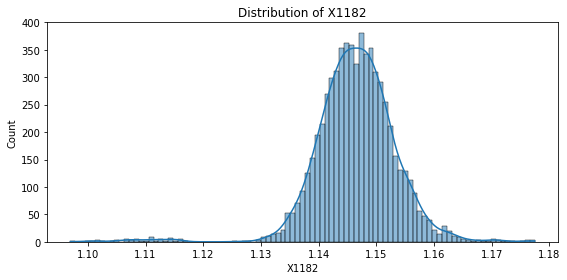

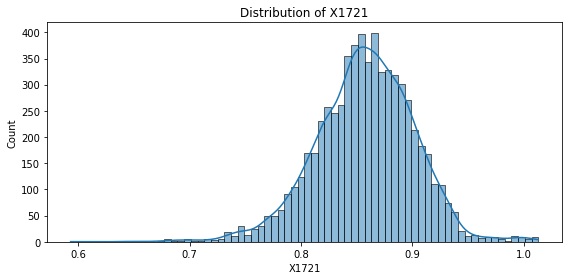

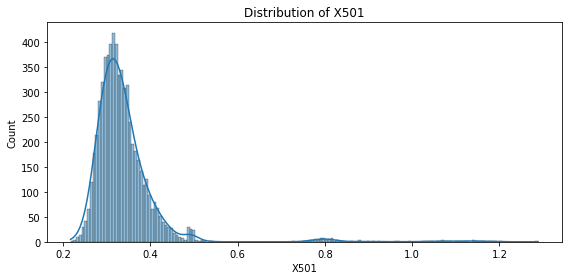

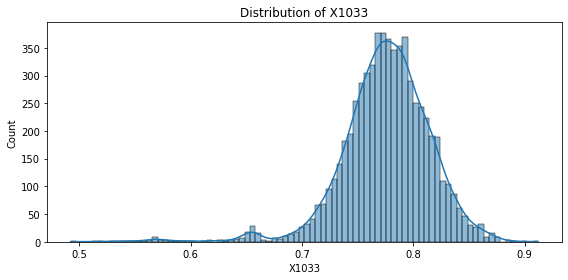

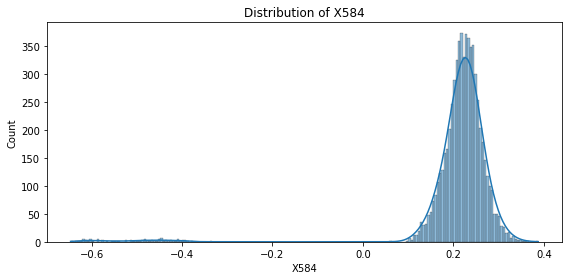

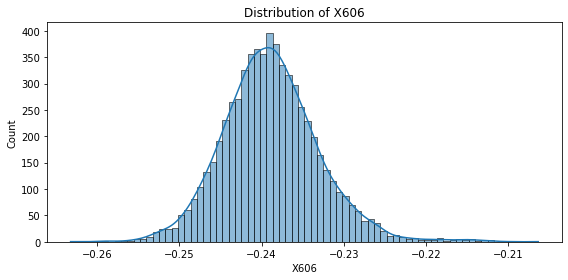

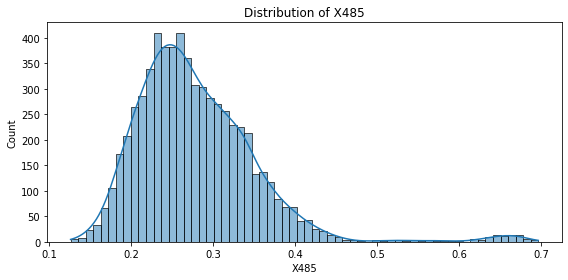

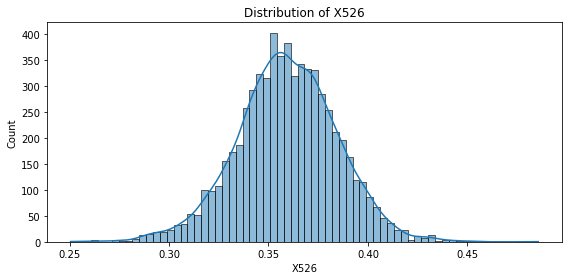

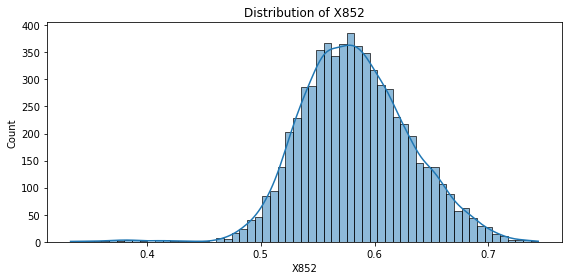

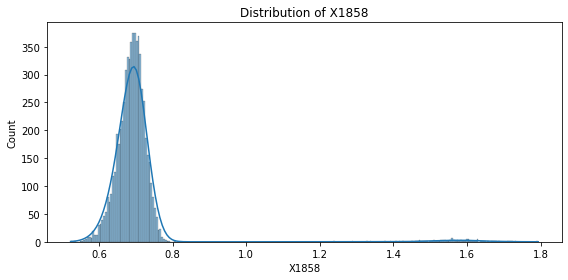

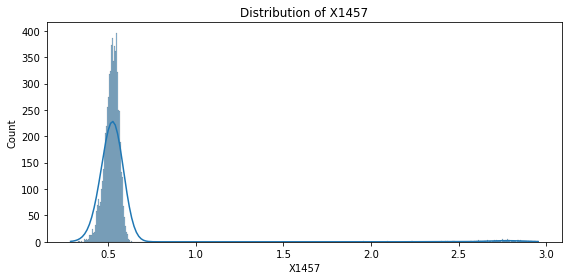

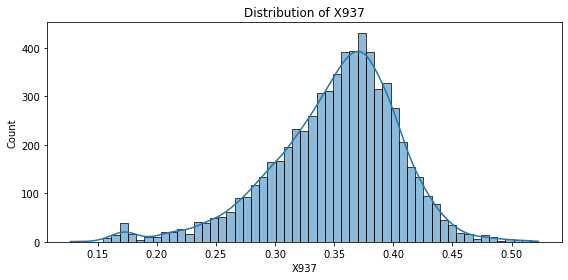

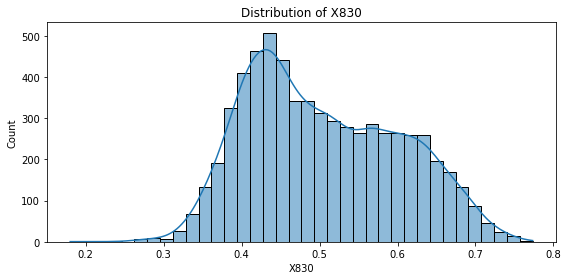

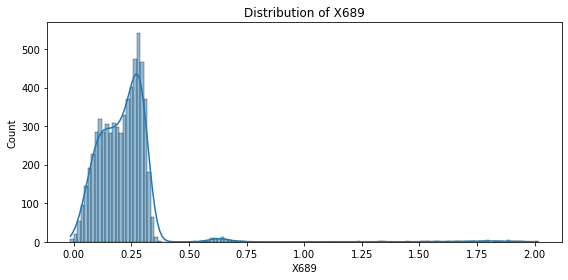

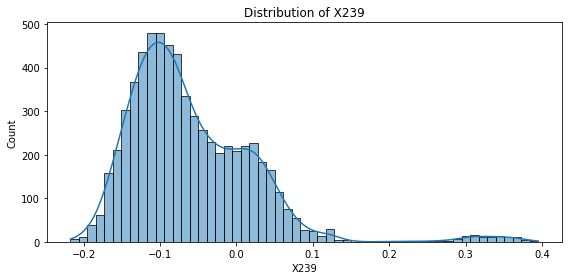

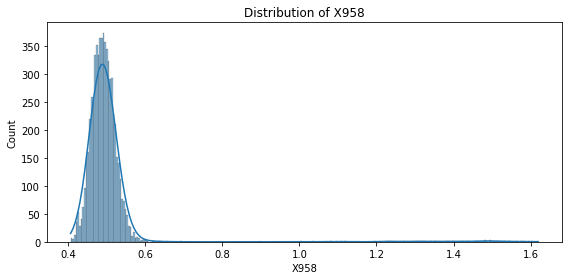

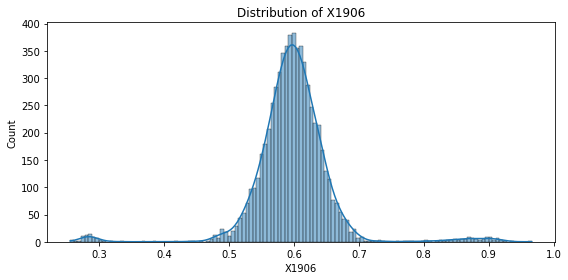

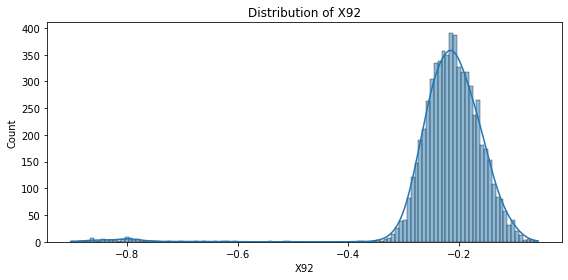

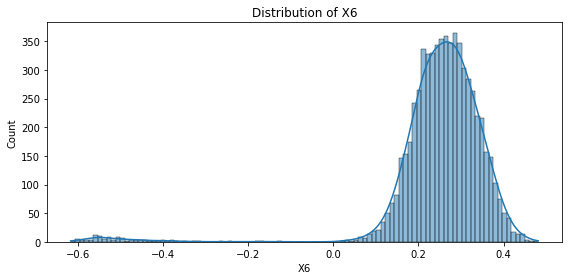

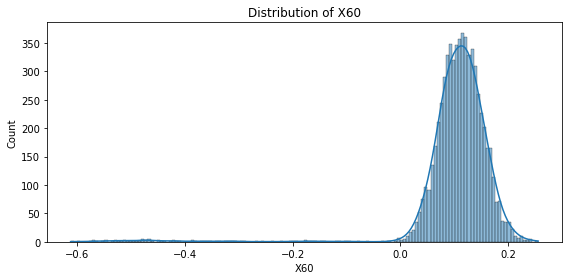

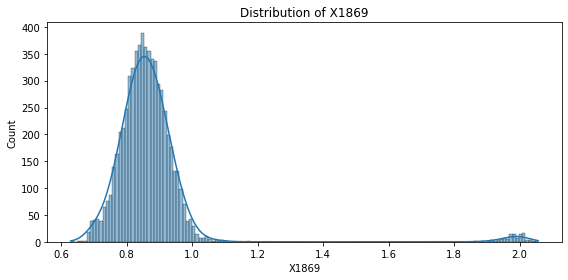

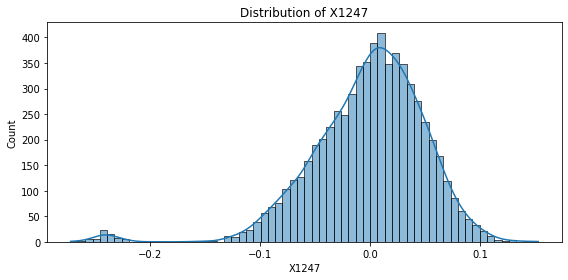

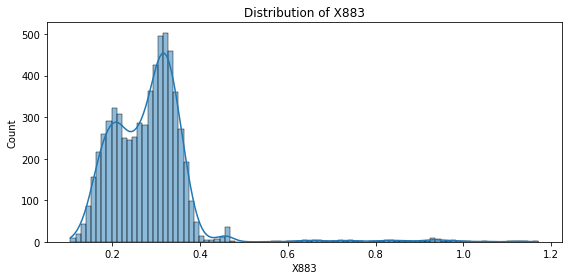

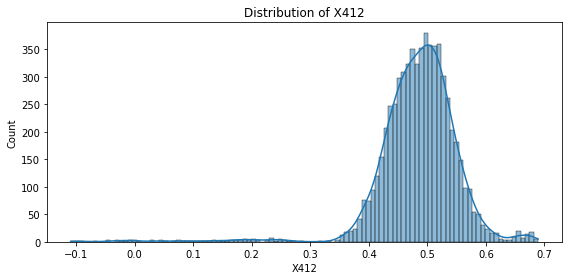

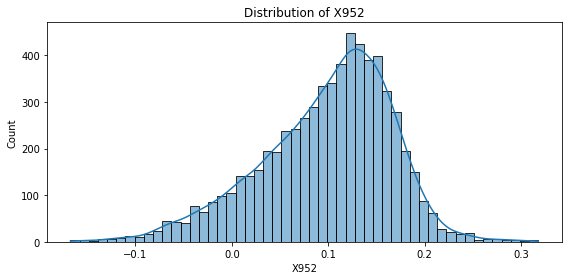

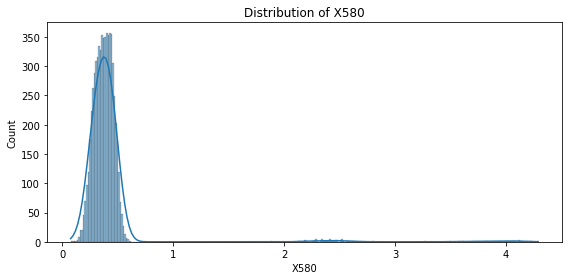

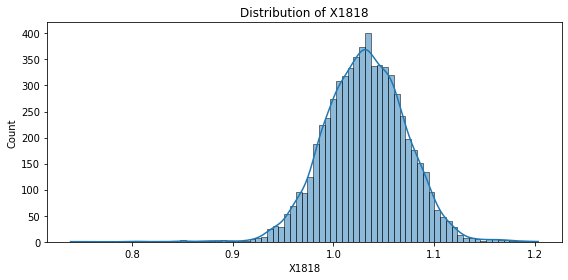

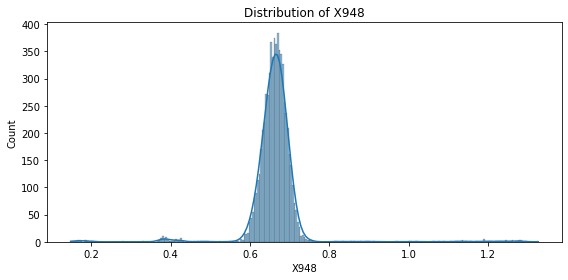

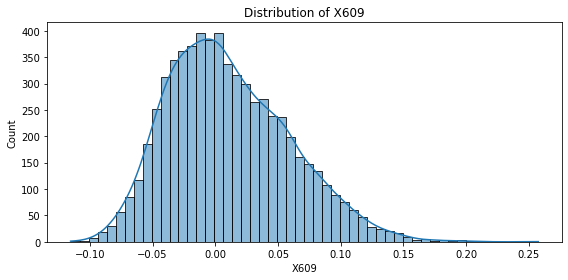

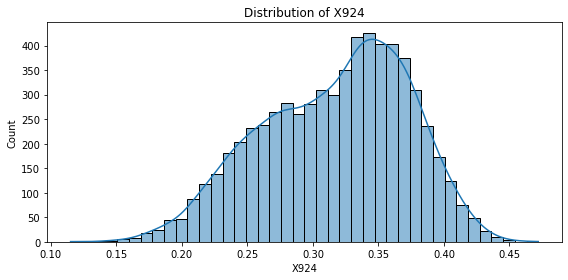

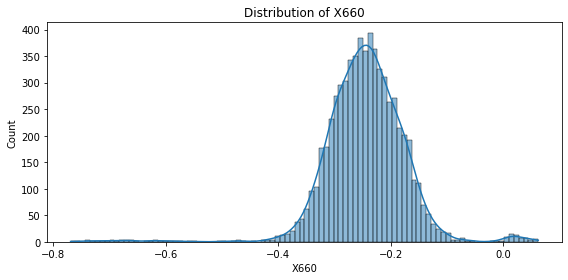

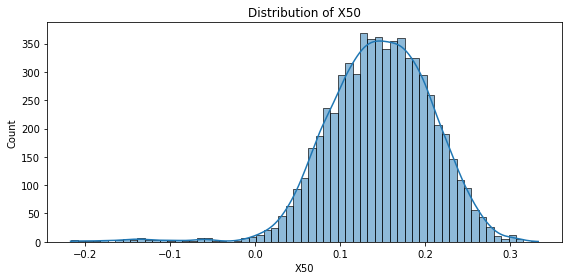

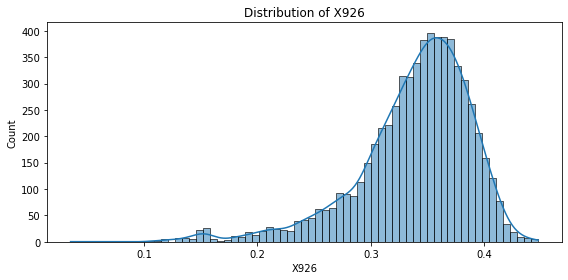

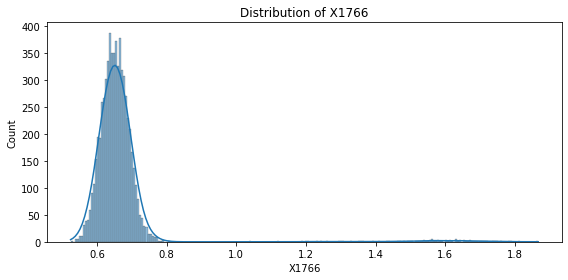

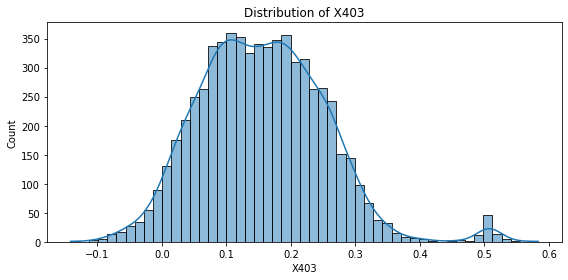

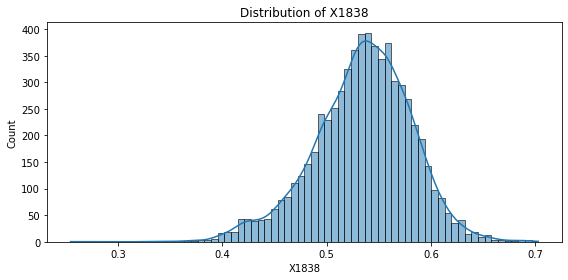

In [34]:
#plot_distributions(x_data[com_0_names])

In [35]:
def get_summary_statistics(df):
    summary_stats = df.describe().T
    summary_stats['skewness'] = df.skew()
    summary_stats['kurtosis'] = df.kurt()
    summary_stats = summary_stats[['mean', '50%', 'std', 'min', 'max', 'skewness', 'kurtosis']].round(2)
    summary_stats.columns = ['Mean', 'Median', 'Std. Dev', 'Min', 'Max', 'Skewness', 'Kurtosis']
    return summary_stats



In [36]:
get_summary_statistics(x_data[com_6_names])

Mean  Median  Std. Dev   Min   Max  Skewness  Kurtosis
X1554  0.88    0.88      0.06  0.66  1.19      0.88      2.96
X1208  0.77    0.76      0.05  0.65  1.15      2.03     10.81

In [37]:
com0_stats = get_summary_statistics(x_data[community_0_eigen_trim])

C:\Users\yoel1\AppData\Local\Temp\ipykernel_14984\4229758356.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  com0_stats = get_summary_statistics(x_data[community_0_eigen_trim])


In [38]:
com0_stats.mean()

Mean         0.393875
Median       0.389573
Std. Dev     0.084530
Min          0.078177
Max          0.903846
Skewness     0.962251
Kurtosis    18.135584
dtype: float64

The average skewness is approximately 0.96, indicating that most features tend to skew slightly to the right overall.
The average kurtosis is quite high, at 18.14, suggesting that extreme values and long tails are common in the dataset.
In summary, most features tend to exhibit positive skewness and high kurtosis, indicating that the dataset contains many features with distributions that have long right tails and heavy tails (outliers).

In [39]:
x_data[community_0_eigen_trim].corr()

C:\Users\yoel1\AppData\Local\Temp\ipykernel_14984\4291600834.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_data[community_0_eigen_trim].corr()


X1238      X118     X1066      X594       X25      X477      X124  \
X1238  1.000000  0.790866 -0.053560  0.423351 -0.345016  0.207739  0.625604   
X118   0.790866  1.000000 -0.219067  0.570567 -0.058027  0.296170  0.689166   
X1066 -0.053560 -0.219067  1.000000 -0.638099 -0.766619 -0.715364 -0.533621   
X594   0.423351  0.570567 -0.638099  1.000000  0.444847  0.492618  0.799283   
X25   -0.345016 -0.058027 -0.766619  0.444847  1.000000  0.510931  0.271969   
...         ...       ...       ...       ...       ...       ...       ...   
X50   -0.186535  0.099624 -0.581606  0.427772  0.692575  0.490734  0.208965   
X926  -0.314236 -0.359749  0.477763 -0.688976 -0.304418 -0.272088 -0.627893   
X1766  0.920558  0.735472  0.057677  0.378235 -0.418034  0.082856  0.591373   
X403   0.194321  0.450715 -0.670565  0.744609  0.579530  0.504040  0.652447   
X1838  0.095172 -0.020769  0.483361 -0.363997 -0.488974 -0.442337 -0.294862   

           X454     X1178     X1026  ...     X1818      X948      X609  \
X1238 -0.491045  0.582563 -0.359862  ...  0.004404  0.421260  0.152326   
X118  -0.220268  0.489830 -0.527392  ... -0.189348  0.230815  0.346876   
X1066 -0.481750 -0.029324  0.570457  ...  0.377290 -0.071103 -0.850735   
X594   0.188530  0.057717 -0.750951  ... -0.471491 -0.105355  0.715927   
X25    0.726237 -0.203277 -0.395554  ... -0.387558 -0.186003  0.716493   
...         ...       ...       ...  ...       ...       ...       ...   
X50    0.717114  0.001343 -0.265316  ... -0.410969 -0.129766  0.621796   
X926  -0.005864  0.074124  0.619584  ...  0.277199  0.102283 -0.512582   
X1766 -0.620392  0.502803 -0.340782  ...  0.067877  0.330148  0.043308   
X403   0.375966 -0.040090 -0.669333  ... -0.396788 -0.194425  0.683052   
X1838 -0.369031  0.160419  0.284271  ...  0.230321  0.045546 -0.447927   

           X924      X660       X50      X926     X1766      X403     X1838  
X1238  0.172041 -0.296793 -0.186535 -0.314236  0.920558  0.194321  0.095172  
X118   0.243406  0.010009  0.099624 -0.359749  0.735472  0.450715 -0.020769  
X1066 -0.557067 -0.354739 -0.581606  0.477763  0.057677 -0.670565  0.483361  
X594   0.366580  0.369317  0.427772 -0.688976  0.378235  0.744609 -0.363997  
X25    0.441227  0.487715  0.692575 -0.304418 -0.418034  0.579530 -0.488974  
...         ...       ...       ...       ...       ...       ...       ...  
X50    0.515822  0.513468  1.000000 -0.171407 -0.272697  0.569880 -0.374777  
X926  -0.098840 -0.186229 -0.171407  1.000000 -0.317373 -0.536126  0.333287  
X1766  0.009100 -0.283389 -0.272697 -0.317373  1.000000  0.180433  0.201644  
X403   0.347938  0.522991  0.569880 -0.536126  0.180433  1.000000 -0.344511  
X1838 -0.409701 -0.329823 -0.374777  0.333287  0.201644 -0.344511  1.000000  

[351 rows x 351 columns]

In [40]:
#pd.DataFrame(x_data[community_0_eigen_trim]).to_excel("Y:\\Downloads\\features0.xlsx")

C:\Users\yoel1\AppData\Local\Temp\ipykernel_14984\1168323093.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.DataFrame(x_data[community_0_eigen_trim]).to_excel("Y:\\Downloads\\features0.xlsx")


In [41]:
com1_stats = get_summary_statistics(x_data[community_1_eigen_trim])

C:\Users\yoel1\AppData\Local\Temp\ipykernel_14984\3488076114.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  com1_stats = get_summary_statistics(x_data[community_1_eigen_trim])


In [42]:
#pd.DataFrame(x_data[community_1_eigen_trim]).to_excel("Y:\\Downloads\\features1.xlsx")

C:\Users\yoel1\AppData\Local\Temp\ipykernel_14984\2578604708.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.DataFrame(x_data[community_1_eigen_trim]).to_excel("Y:\\Downloads\\features1.xlsx")


In [43]:
com1_stats.mean()

Mean         0.472758
Median       0.470455
Std. Dev     0.087273
Min          0.168424
Max          0.980030
Skewness     1.097879
Kurtosis    15.401909
dtype: float64

# Trying to find relationships between the Emotions

In [44]:
df = x_data
summary_stats = df.describe()
missing_values = df.isnull().sum()
data_types = df.dtypes
summary_df = pd.concat([summary_stats.T, missing_values.rename('missing_values'), data_types.rename('data_type')], axis=1)
from IPython.display import display
display(summary_df)

count      mean       std       min       25%       50%       75%  \
X0     6423.0  0.061991  0.116120 -1.004880  0.039895  0.072968  0.105225   
X1     6423.0  0.053487  0.112561 -0.465417 -0.016925  0.046972  0.131323   
X2     6423.0  0.067474  0.059367 -0.351618  0.035747  0.070272  0.104861   
X3     6423.0 -0.025323  0.115466 -0.946775 -0.064056 -0.019947  0.026989   
X4     6423.0  0.097792  0.073972 -0.193011  0.045044  0.096864  0.145783   
...       ...       ...       ...       ...       ...       ...       ...   
X1915  6423.0  0.442982  0.266594  0.198526  0.382163  0.412663  0.441757   
X1916  6423.0  0.464080  0.055510  0.216375  0.435839  0.469654  0.499840   
X1917  6423.0  0.705101  0.051754  0.510412  0.675781  0.702939  0.728567   
X1918  6423.0  0.868305  0.060387  0.530326  0.837631  0.871934  0.905471   
X1919  6423.0  0.724573  0.055862  0.545157  0.690433  0.725150  0.758293   

            max  missing_values data_type  
X0     0.284256               0   float64  
X1     0.346451               0   float64  
X2     0.225245               0   float64  
X3     0.384504               0   float64  
X4     0.381603               0   float64  
...         ...             ...       ...  
X1915  2.622454               0   float64  
X1916  0.636122               0   float64  
X1917  1.006697               0   float64  
X1918  1.045047               0   float64  
X1919  0.951391               0   float64  

[1920 rows x 10 columns]

In [45]:
#pd.DataFrame(summary_df).to_excel("Y:\\Downloads\\all_featuresv1.xlsx")

### Simple Correlation Analysis

In [62]:
y_data

arousal   valence  interest   despair       joy
0     5.539334  2.756053  0.000000  1.367396  0.000000
1     4.539334  4.756053  0.000000  1.367396  0.000000
2     4.539334  2.756053  0.000000  1.367396  0.000000
3     4.539334  3.756053  0.000000  3.367396  0.000000
4     4.539334  0.756053  0.000000  3.367396  0.000000
...        ...       ...       ...       ...       ...
6418  5.703678  3.959011  4.424373  0.281608  0.860632
6419  4.703678  2.959011  4.424373  3.281608  0.860632
6420  5.703678  3.959011  4.424373  1.281608  0.860632
6421  4.703678  4.959011  4.424373  1.281608  0.860632
6422  5.703678  4.959011  5.424373  1.281608  3.860632

[6423 rows x 5 columns]

In [69]:
correlation_matrix

arousal   valence  interest   despair       joy
arousal   1.000000  0.023847  0.106272  0.111831  0.138984
valence   0.023847  1.000000  0.130614 -0.512874  0.530522
interest  0.106272  0.130614  1.000000  0.018450  0.247375
despair   0.111831 -0.512874  0.018450  1.000000 -0.261905
joy       0.138984  0.530522  0.247375 -0.261905  1.000000

### clustering

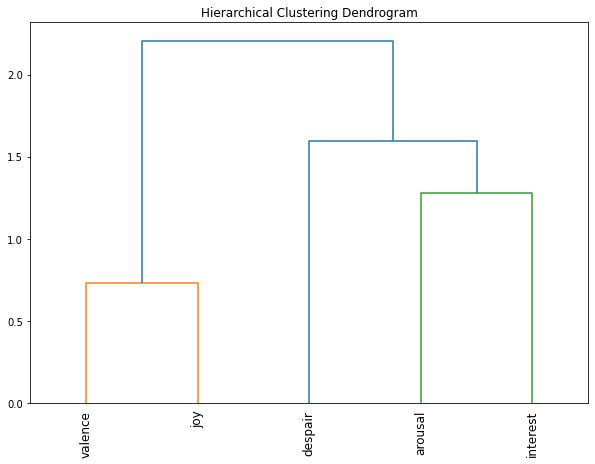

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(correlation_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

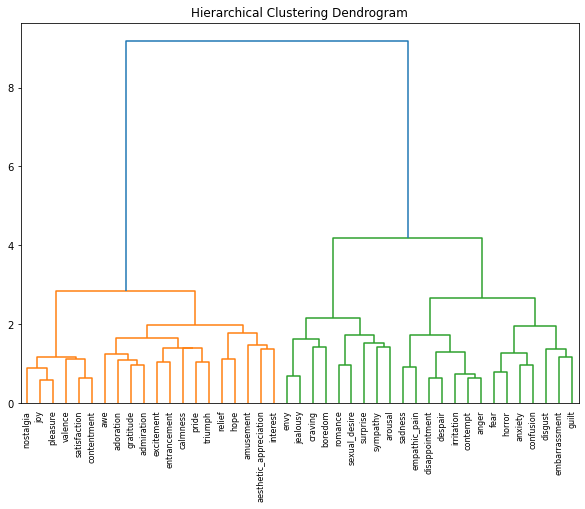

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage
all_corr = y_data_all.corr()
Z = linkage(all_corr, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=all_corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [74]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information between emotions
mi = mutual_info_regression(data[['arousal', 'valence', 'interest', 'despair']], data['joy'])
print(mi)


[1.48017096 1.63840264 1.50821477 1.20081681]


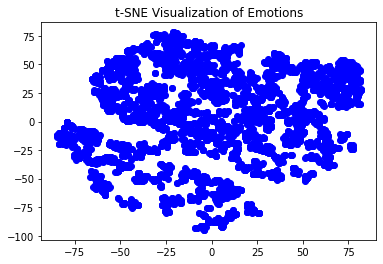

In [75]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE on the emotion data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(y_data)

# Plot the t-SNE result
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue')
plt.title('t-SNE Visualization of Emotions')
plt.show()


#### Simple analysis

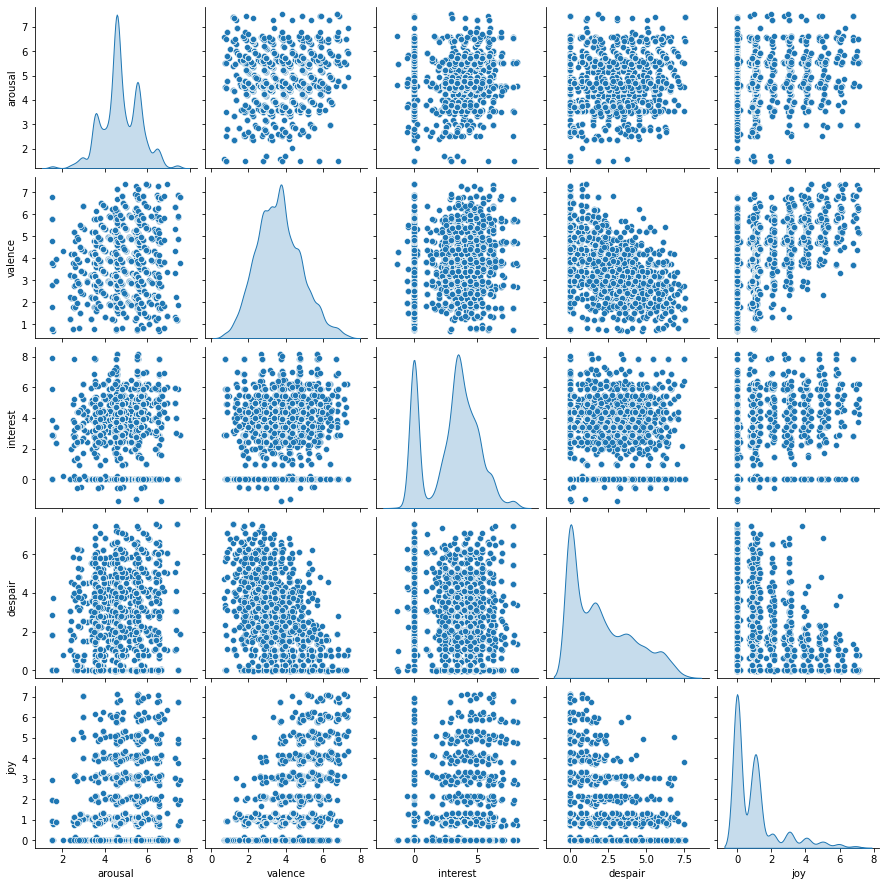

In [76]:
import numpy as np

# Create a sample DataFrame with random data
np.random.seed(42)
df = y_data

# Create the scatter plot matrix
sns.pairplot(df, diag_kind='kde')

plt.show()


In [7]:
y_data

arousal   valence  interest   despair       joy
0     5.539334  2.756053  0.000000  1.367396  0.000000
1     4.539334  4.756053  0.000000  1.367396  0.000000
2     4.539334  2.756053  0.000000  1.367396  0.000000
3     4.539334  3.756053  0.000000  3.367396  0.000000
4     4.539334  0.756053  0.000000  3.367396  0.000000
...        ...       ...       ...       ...       ...
6418  5.703678  3.959011  4.424373  0.281608  0.860632
6419  4.703678  2.959011  4.424373  3.281608  0.860632
6420  5.703678  3.959011  4.424373  1.281608  0.860632
6421  4.703678  4.959011  4.424373  1.281608  0.860632
6422  5.703678  4.959011  5.424373  1.281608  3.860632

[6423 rows x 5 columns]

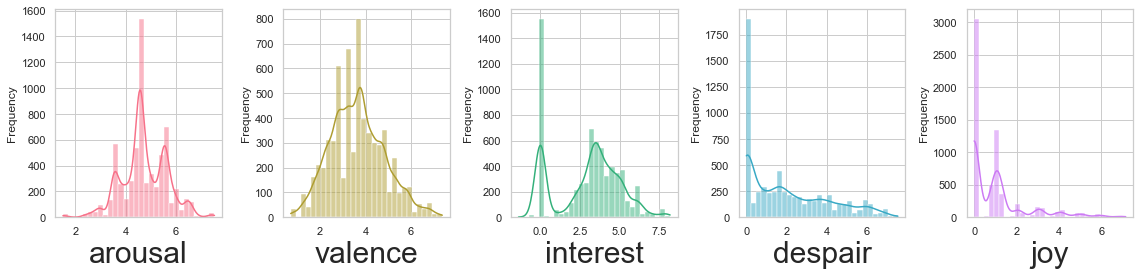

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_emotion_distributions(df, emotion_columns):
    # Set the style for the plot
    sns.set(style="whitegrid")
    
    # Create the subplots with one for each emotion
    plt.figure(figsize=(16,4))
    
    for i, emotion in enumerate(emotion_columns):
        plt.subplot(1, len(emotion_columns), i + 1)
        sns.histplot(df[emotion], kde=True, color=sns.color_palette("husl", len(emotion_columns))[i], bins=30)
        #plt.title(f'Distribution of {emotion}')
        plt.xlabel(emotion,size=30)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage:
# df is your DataFrame, and emotion_columns is a list of the 5 emotion column names
emotion_columns = ['arousal', 'valence', 'interest', 'despair', 'joy']
plot_emotion_distributions(y_data, emotion_columns)
